# AlphaPept Systems Check

This notebook will run several tests and compare the performance to MaxQuant. Depending on the machine, this can take several hours.
Each run is called via the `test_ci.py` script, which downloads files to a temporary folder which can be specified in this file.

This notebook requires the `matplotlib_venn` (`!pip install matplotlib_venn`) package.

## Reference Data

Download MaxQuant reference files. Referance MaxQuant data from `PXD006109` and `PXD010012` were taken from the paper, the others were analyzed with `MaxQuant_1.6.14`, default settings w/o second peptides and provided with the given contaminants file.

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))
import test_ci
from test_ci import config_test_paths

try:
    import wget
except ImportError:
    !pip install wget
    import wget
    
FILE_DICT = {}
#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/1E2G1IwgcgdsCHC/download' #OLD MQ FILES
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/Fn2uxeYNL60JSd3/download'

#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/vMNferEoSoROJbb/download' #AP Files
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/KLBotZbodMByigh/download'

FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/fLhxQ8mVb29x9xH/download'
FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/BkMMHPregCQgKLg/download'
FILE_DICT['PXD010012_ref.txt'] = 'https://datashare.biochem.mpg.de/s/ps226k7Fme1K0jf/download'
FILE_DICT['PXD010012_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/pyhKMrytjdDU2sX/download'
FILE_DICT['bruker_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/fRcoGuwlcbH2SBJ/download'
FILE_DICT['thermo_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/p4Omj9K5hHmSoDl/download'

FILE_DICT['PXD015087_ref.txt'] = 'https://datashare.biochem.mpg.de/s/GIdgji3408UvS07/download'
FILE_DICT['PXD015087_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/eMuNLE2yjNbmiSi/download'
FILE_DICT['PXD015087_ref_evd_singlerun.txt'] = 'https://datashare.biochem.mpg.de/s/0QxM7eR7VDg1rFK/download'

tmp_folder = os.path.join(os.getcwd(),'temp/')

BASE_DIR = os.path.join(tmp_folder , 'test_files') # Storarge location for test files
TEST_DIR = os.path.join(tmp_folder,'test_temp')
ARCHIVE_DIR = os.path.join(tmp_folder,  os.path.sep, 'test_archive', os.path.sep)

MONGODB_USER = 'github_actions'
MONGODB_URL = 'ci.yue0n.mongodb.net/'

if not os.path.isdir(tmp_folder):
    os.mkdir(tmp_folder)

test_ci.config_test_paths(BASE_DIR, TEST_DIR, ARCHIVE_DIR, MONGODB_USER, MONGODB_URL)


for file in FILE_DICT:
    target = os.path.join(tmp_folder, file)
    if not os.path.isfile(target):
        wget.download(FILE_DICT[file], target)
        
software_1 = 'AlphaPept'
software_2 = 'MaxQuant'

## Single Files

Compare to the single HeLa test files

In [2]:
%run -i ../test_ci.py $tmp_folder thermo_irt

2022-03-17 23:14:33> Logging to C:\Users\admin\alphapept\logs\log_20220317231433.txt.
2022-03-17 23:14:33> Platform information:
2022-03-17 23:14:33> system     - Windows
2022-03-17 23:14:33> release    - 10
2022-03-17 23:14:33> version    - 10.0.19044
2022-03-17 23:14:33> machine    - AMD64
2022-03-17 23:14:33> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-17 23:14:33> cpu count  - 24
2022-03-17 23:14:33> ram memory - 122.4/127.7 Gb (available/total)
2022-03-17 23:14:33> 
2022-03-17 23:14:33> Python information:
2022-03-17 23:14:33> SQLAlchemy                    - 1.4.23
2022-03-17 23:14:33> alphapept                     - 0.4.1
2022-03-17 23:14:33> biopython                     - 1.78
2022-03-17 23:14:33> bumpversion                   - 
2022-03-17 23:14:33> bumpversion>                  - 
2022-03-17 23:14:33> click                         - 7.1.2
2022-03-17 23:14:33> click>                        - 
2022-03-17 23:14:33> fastcore                      - 1.3.

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:14:33> FASTA contains 247 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:31<00:00, 31.65s/it]

2022-03-17 23:15:05> Digested 247 proteins and generated 48,722 spectra
2022-03-17 23:15:06> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 0.02 GB
2022-03-17 23:15:06> ==== import_raw_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:15:06> Processing 1 files for step raw_conversion
2022-03-17 23:15:06> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT has extension .raw - converting from Thermo.
2022-03-17 23:15:10> File conversion complete. Extracted 2,603 precursors.
2022-03-17 23:15:10> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2022-03-17 23:15:10> ==== feature_finding ====


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:37<00:00, 37.22s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:15:15> Processing 1 files for step find_features
2022-03-17 23:15:15> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf. Adding to feature finding list.
2022-03-17 23:15:15> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw
2022-03-17 23:15:15> Hill extraction with centroid_tol 8 and max_gap 2
2022-03-17 23:15:19> Number of hills 45,516, len = 20.18
2022-03-17 23:15:19> Repeating hill extraction with centroid_tol 5.10
2022-03-17 23:15:20> Number of hills 52,919, len = 21.29
2022-03-17 23:15:22> After duplicate removal of hills 43,950
2022-03-17 23:15:29> After split hill_ptrs 61,693
2022-03-17 23:15:30> After filter hill_ptrs 60,175
2022-03-17 23:15:43> Extracting hill stats complete
2022-03-17 23:15:45> Found 7,045 pre isotope patterns.
2022-03-17 23:16:02> Extracted 6,459 isotope patterns.
2022-03-17 23:16:11> Report complete.
2022-03-17 23:16:11> Matching features to query data.
2022-0


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:16:12> Starting first search.
2022-03-17 23:16:12> Processing 1 files for step search_db
2022-03-17 23:16:12> Calibrating fragments
2022-03-17 23:16:14> Performing search on 2,986 query and 48,722 db entries with frag_tol = 30.00 and prec_tol = 30.00.


  0%|                                                                                            | 0/1 [00:59<?, ?it/s]


2022-03-17 23:16:16> Found 27 psms.
2022-03-17 23:16:16> Extracting columns for scoring.
2022-03-17 23:16:22> Extracted columns from 27 spectra.
2022-03-17 23:16:22> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2022-03-17 23:16:22> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2022-03-17 23:16:23> First search complete.
2022-03-17 23:16:23> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:16:23> Processing 1 files for step calibrate_hdf
2022-03-17 23:16:23> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw.
2022-03-17 23:16:23> Scoring using X-Tandem
2022-03-17 23:16:23> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-03-17 23:16:23> 15 target (0 decoy) of 15 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.01)
2022-03-17 23:16:23> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw.
2022-03-17 23:16:23> Not enough data points present. Skipping recalibration.
2022-03-17 23:16:23> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf complete.
2022-03-17 23:16:23> Starting fragment calibration.
2022-03-17 23:16:23> Calibrating fragments with neighbors
2022-03-17 23:16:23> Scoring using X-Tandem
2022-03-17 23:16:23> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-03-17 23:16:23> 15 target (0 decoy) 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:16:23> Starting second search with DB.
2022-03-17 23:16:23> Processing 1 files for step search_db
2022-03-17 23:16:23> Found calibrated prec_tol with value 9.03
2022-03-17 23:16:23> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\projects\\alphapept\\sandbox\\temp\\test_temp\\thermo_IRT.ms_data.hdf>.'
2022-03-17 23:16:23> Performing search on 2,986 query and 48,722 db entries with frag_tol = 30.00 and prec_tol = 9.03.
2022-03-17 23:16:23> Found 26 psms.
2022-03-17 23:16:23> Extracting columns for scoring.
2022-03-17 23:16:24> Extracted columns from 26 spectra.
2022-03-17 23:16:24> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2022-03-17 23:16:24> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2022-03-17 23:16:24> Second search complete.
2022-03-17 23:16:24> ==== score ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:16:24> Processing 1 files for step score_hdf
2022-03-17 23:16:24> Calling score_hdf
2022-03-17 23:16:24> Found second search psms for scoring.
2022-03-17 23:16:24> Last q_value 0.000 of dataset is smaller than fdr_level 0.100
2022-03-17 23:16:24> 15 target (0 decoy) of 15 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.1)
2022-03-17 23:16:24> The total number of available decoys is lower than the initial set of high scoring targets.
2022-03-17 23:16:24> ML failed. Defaulting to x_tandem score
2022-03-17 23:16:24> There are fewer high scoring targets or decoys than required by 'min_train'.
2022-03-17 23:16:24> Converting x_tandem score to probabilities
2022-03-17 23:16:24> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-03-17 23:16:24> 25 target (0 decoy) of 25 PSMs. fdr 0.000000 for a cutoff of 0.04 (set fdr was 0.01)
2022-03-17 23:16:24> Saving identifications to ms_data file.
2022-03-17 23:16:25> Saving identifications to ms_data file complete





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:16:25> Fasta dict with length 247, Pept dict with length 48,724
2022-03-17 23:16:25> Extracting protein groups.







  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-17 23:16:26> A total of 11 unique and 0 shared peptides.
2022-03-17 23:16:26> A total of 0 ambigious proteins
2022-03-17 23:16:26> A total of 0 unique and 0 shared peptides.
2022-03-17 23:16:26> A total of 0 ambigious proteins
2022-03-17 23:16:26> Global FDR on protein_group
2022-03-17 23:16:26> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-03-17 23:16:26> 3 target (0 decoy) of 3 PSMs. fdr 0.000000 for a cutoff of 0.35 (set fdr was 0.01)
2022-03-17 23:16:26> Global FDR cutoff at 0.34615384615384615.
2022-03-17 23:16:26> FDR on proteins complete. For 0.01 FDR found 15 targets and 0 decoys. A total of 3 proteins found.
2022-03-17 23:16:26> Saving complete.
2022-03-17 23:16:26> Protein groups complete.
2022-03-17 23:16:26> ==== quantification ====
2022-03-17 23:16:26> Reading protein_fdr for quantification.
2022-03-17 23:16:26> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-17 23:16:26> Complete.
2022-03-17 23:16:26> Start

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx', 'n_possible_proteins'],
      dtype='object')]

  pytables.to_hdf(




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:16:26> LFQ complete.
2022-03-17 23:16:26> Extracting protein_summary
2022-03-17 23:16:26> Saved protein_summary of length 3 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:16:26> Updating protein_fdr.
2022-03-17 23:16:26> Exporting as csv.
2022-03-17 23:16:26> Saved df of length 15 saved to F:\projects\alphapept\sandbox\temp\test_temp\results


2022-03-17 23:16:26> ==== export ====
2022-03-17 23:16:26> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-17 23:16:26> Analysis complete.


### Thermo HeLa

2022-03-17 23:16:26> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-17 23:16:28> No settings provided. Creating from default settings.
2022-03-17 23:16:29> Couldn't find compiled exe. Using Python version for testing.
2022-03-17 23:16:29> Logging to C:\Users\admin\alphapept\logs\log_20220317231629.txt.
2022-03-17 23:16:29> Platform information:
2022-03-17 23:16:29> system     - Windows
2022-03-17 23:16:29> release    - 10
2022-03-17 23:16:29> version    - 10.0.19044
2022-03-17 23:16:29> machine    - AMD64
2022-03-17 23:16:29> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-17 23:16:29> cpu count  - 24
2022-03-17 23:16:29> ram memory - 119.2/127.7 Gb (available/total)
2022-03-17 23:16:29> 
2022-03-17 23:16:29> Python information:
2022-03-17 23:16:29> SQLAlchemy                    - 1.4.23
2022-03-17 23:16:29> alphapept                     - 0.4.1
2022-03-17 23:16:29> biopython                     - 1.78
2022-03-17 23:16:29> bumpversion        






  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:16:30> FASTA contains 36,789 entries.


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:26<00:00, 86.75s/it]





  3%|█▋                                                              | 0.02702702702702703/1 [01:24<50:43, 3127.74s/it]




  5%|███▍                                                            | 0.05405405405405406/1 [01:26<20:52, 1324.58s/it]




  8%|█████▎                                                           | 0.08108108108108109/1 [01:27<11:23, 744.20s/it]




 11%|███████                                                          | 0.10810810810810811/1 [01:29<07:02, 474.00s/it]




 14%|████████▊                                                        | 0.13513513513513514/1 [01:30<04:37, 320.49s/it]




 16%|██████████▌                                                      | 0.16216216216216217/1 [01:31<03:10, 227.32s/it]




 19%|████████████▍                                                     | 0.1891891891891892/1 [01:33<02:20, 173.21s/it]




 22%|██

2022-03-17 23:18:59> Digested 36,789 proteins and generated 8,624,766 spectra
2022-03-17 23:20:16> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.32 GB
2022-03-17 23:20:30> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:20:30> Processing 1 files for step raw_conversion
2022-03-17 23:20:30> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2022-03-17 23:22:22> File conversion complete. Extracted 120,226 precursors.
2022-03-17 23:22:24> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-17 23:22:24> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:22:24> Processing 1 files for step find_features
2022-03-17 23:22:24> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2022-03-17 23:22:24> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2022-03-17 23:22:24> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [01:58<?, ?it/s]


2022-03-17 23:22:29> Number of hills 1,105,353, len = 17.35
2022-03-17 23:22:29> Repeating hill extraction with centroid_tol 5.87
2022-03-17 23:22:33> Number of hills 1,227,331, len = 19.44
2022-03-17 23:22:34> After duplicate removal of hills 1,025,845
2022-03-17 23:22:44> After split hill_ptrs 1,207,373
2022-03-17 23:22:44> After filter hill_ptrs 1,188,406
2022-03-17 23:24:53> Extracting hill stats complete


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:30<00:00, 510.80s/it]


2022-03-17 23:25:02> Found 184,383 pre isotope patterns.
2022-03-17 23:25:44> Extracted 198,779 isotope patterns.
2022-03-17 23:25:47> Report complete.
2022-03-17 23:25:47> Matching features to query data.
2022-03-17 23:25:49> Saving feature table.
2022-03-17 23:25:49> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-17 23:25:49> Saving features.
2022-03-17 23:25:49> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-17 23:25:49> ==== search_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:25:49> Starting first search.
2022-03-17 23:25:49> Processing 1 files for step search_db
2022-03-17 23:25:49> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2022-03-17 23:26:02> Performing search on 246,959 query and 8,624,766 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-03-17 23:26:17> Found 676,773 psms.
2022-03-17 23:26:17> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [04:10<?, ?it/s]


2022-03-17 23:27:47> Extracted columns from 676,773 spectra.
2022-03-17 23:27:48> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-17 23:27:53> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-17 23:28:19> First search complete.
2022-03-17 23:28:19> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:28:19> Processing 1 files for step calibrate_hdf
2022-03-17 23:28:19> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-17 23:28:20> Scoring using X-Tandem
2022-03-17 23:28:22> 37,873 target (378 decoy) of 127414 PSMs. fdr 0.009981 for a cutoff of 27.44 (set fdr was 0.01)
2022-03-17 23:28:22> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-17 23:28:24> Precursor calibration std 0.99, 0.22
2022-03-17 23:28:24> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2022-03-17 23:28:24> Starting fragment calibration.
2022-03-17 23:28:24> Calibrating fragments with neighbors
2022-03-17 23:28:26> Scoring using X-Tandem
2022-03-17 23:28:28> 37,873 target (378 decoy) of 127414 PSMs. fdr 0.009981 for a cutoff of 27.44 (set fdr was 0.01)
2022-03-17 23:28:29> Minimum hits for fragments before score 7.00.
2022-03-17 23:28:29> Minimum 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:31:06> Starting second search with DB.
2022-03-17 23:31:06> Processing 1 files for step search_db
2022-03-17 23:31:06> Found calibrated prec_tol with value 4.95
2022-03-17 23:31:06> Found calibrated frag_tol with value 50.59
2022-03-17 23:31:08> Performing search on 246,959 query and 8,624,766 db entries with frag_tol = 50.59 and prec_tol = 4.95.
2022-03-17 23:31:13> Found 617,465 psms.
2022-03-17 23:31:13> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [03:17<?, ?it/s]


2022-03-17 23:32:30> Extracted columns from 617,465 spectra.
2022-03-17 23:32:31> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-17 23:32:35> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-17 23:32:59> Second search complete.
2022-03-17 23:33:00> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:33:00> Processing 1 files for step score_hdf
2022-03-17 23:33:00> Calling score_hdf
2022-03-17 23:33:01> Found second search psms for scoring.
2022-03-17 23:33:11> 54,264 target (5,426 decoy) of 120635 PSMs. fdr 0.099993 for a cutoff of 24.04 (set fdr was 0.1)
2022-03-17 23:33:12> Training & cross-validation on 11725 targets and 11725 decoys
2022-03-17 23:33:31> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2022-03-17 23:33:31> The train accuracy was 0.9651599147121536
2022-03-17 23:33:31> Testing on 46901 targets and 46901 decoys
2022-03-17 23:33:32> The test accuracy was 0.9312061576512228
2022-03-17 23:33:32> Top features {'x_tandem': 0.2434738985548397, 'hits_y': 0.1755392742728591, 'hits': 0.15831829958592142, 'fragments_matched_n_ratio': 0.11055153902252252, 'n_fragments_matched': 0.08633014574380456, 'fragments_matched_int_ratio': 0.046909113526932084, 'n_missed': 0.023094066262479805, 'fragments_mat


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:34:02> Fasta dict with length 36,789, Pept dict with length 8,624,772
2022-03-17 23:34:02> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:34:02> A total of 39,303 unique and 2,602 shared peptides.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-17 23:34:03> A total of 803 ambigious proteins
2022-03-17 23:34:03> A total of 458 unique and 21 shared peptides.
2022-03-17 23:34:03> A total of 21 ambigious proteins
2022-03-17 23:34:04> Global FDR on protein_group
2022-03-17 23:34:04> 5,734 target (57 decoy) of 6913 PSMs. fdr 0.009941 for a cutoff of 0.97 (set fdr was 0.01)
2022-03-17 23:34:04> Global FDR cutoff at 0.9739365972708433.
2022-03-17 23:34:04> FDR on proteins complete. For 0.01 FDR found 47,258 targets and 58 decoys. A total of 5,791 proteins found.
2022-03-17 23:34:04> Saving complete.
2022-03-17 23:34:04> Protein groups complete.
2022-03-17 23:34:04> ==== quantification ====
2022-03-17 23:34:04> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-17 23:34:04> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-17 23:34:04> Complete.
2022-03-17 23:34:04> Starting profile extraction.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:34:05> LFQ complete.
2022-03-17 23:34:05> Extracting protein_summary
2022-03-17 23:34:05> Saved protein_summary of length 5,791 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-17 23:34:05> Updating protein_fdr.
2022-03-17 23:34:05> Exporting as csv.
2022-03-17 23:34:07> Saved df of length 47,316 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-17 23:34:07> ==== export ====
2022-03-17 23:34:10> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-17 23:34:10> Analysis complete.


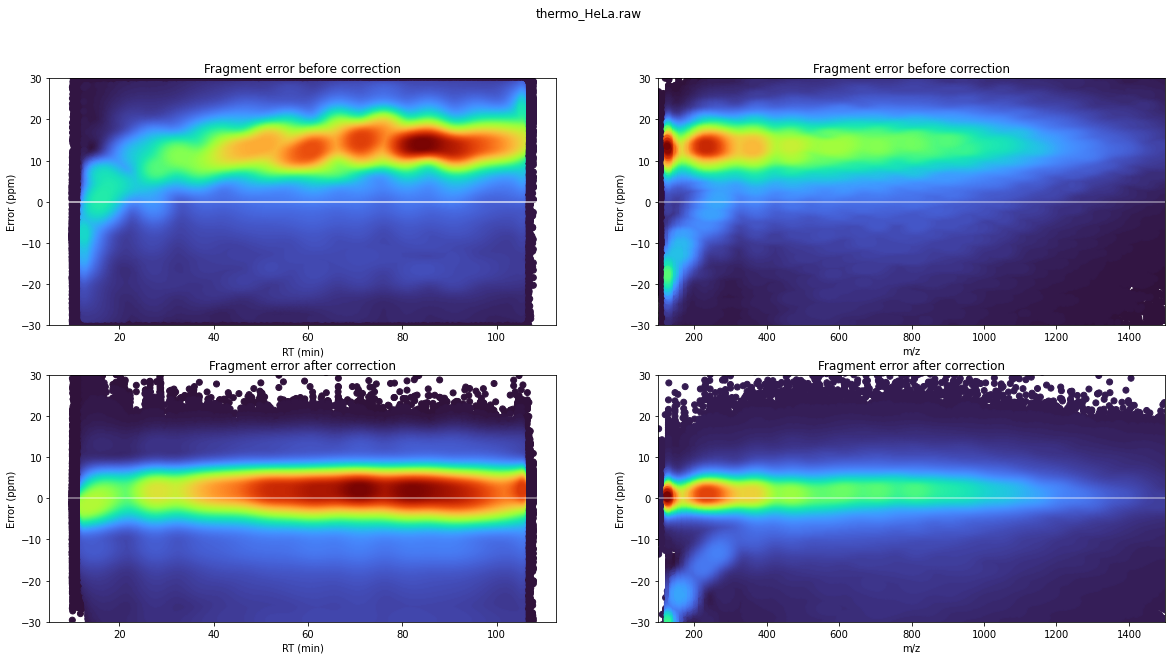

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:01<00:00, 61.23s/it]


In [3]:
%run -i ../test_ci.py $tmp_folder thermo_hela

In [4]:
try:
    import matplotlib_venn
except ModuleNotFoundError:
    !pip install matplotlib_venn
    import matplotlib_venn

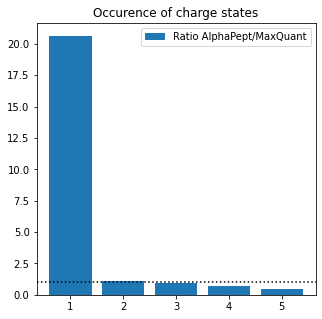

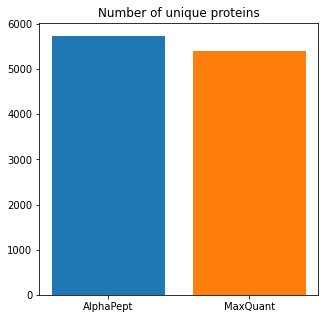

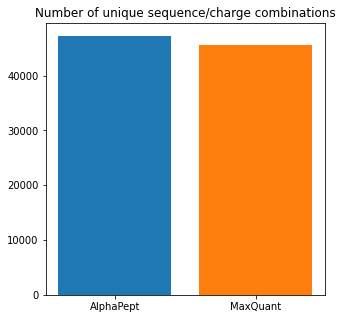

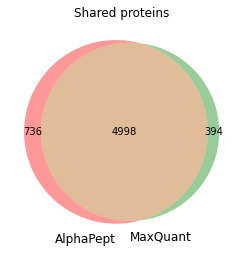

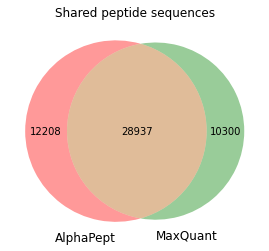

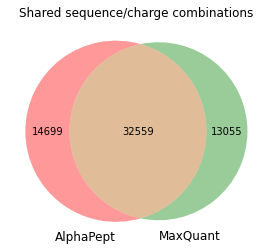

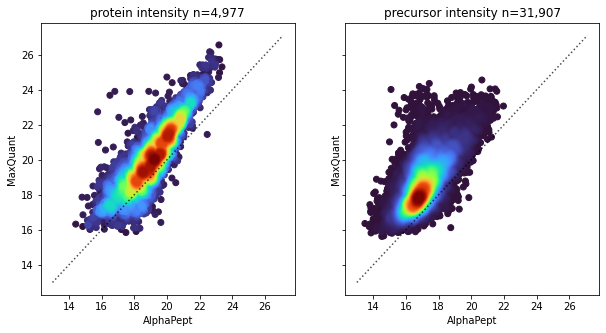

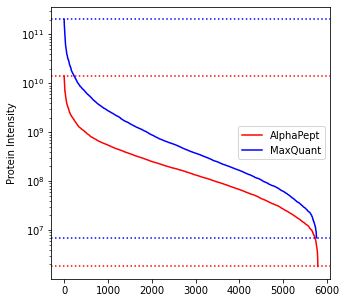

In [5]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os


df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'thermo_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Calling custom steps of the pipeline

Work with already processed results and call individual steps

--- ML ---
2022-03-17 23:35:20> 54,264 target (5,426 decoy) of 120635 PSMs. fdr 0.099993 for a cutoff of 24.04 (set fdr was 0.1)
2022-03-17 23:35:21> Training & cross-validation on 11725 targets and 11725 decoys
2022-03-17 23:35:36> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 200}
2022-03-17 23:35:36> The train accuracy was 0.9617484008528785
2022-03-17 23:35:36> Testing on 46901 targets and 46901 decoys
2022-03-17 23:35:37> The test accuracy was 0.9315899447772968
2022-03-17 23:35:37> Top features {'x_tandem': 0.3205538790468232, 'hits': 0.18102960601190066, 'hits_y': 0.12635814408756318, 'n_fragments_matched': 0.08352093578287043, 'fragments_matched_n_ratio': 0.06933489823002778, 'n_missed': 0.035647881324200076, 'fragments_matched_int_ratio': 0.03237304912414941, 'hits_y-NH3': 0.013840210561678931, 'delta_m_ppm_abs': 0.01298879982240909, 'fragments_matched_int_sum': 0.012654302343657104, 'hits_b': 0.010779463959265066, '

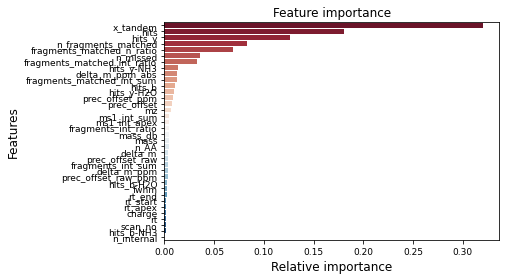

2022-03-17 23:35:38> Filter df with x_tandem score
2022-03-17 23:35:43> Global FDR on precursor
2022-03-17 23:35:43> 47,915 target (479 decoy) of 119105 PSMs. fdr 0.009997 for a cutoff of 0.89 (set fdr was 0.01)


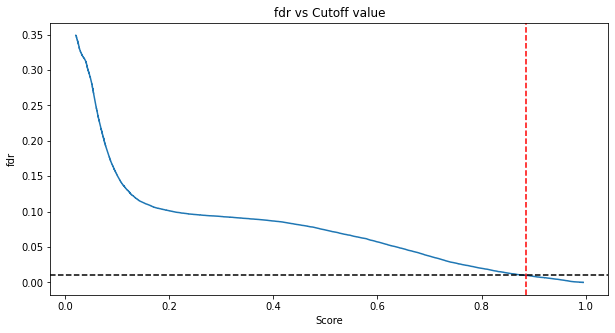

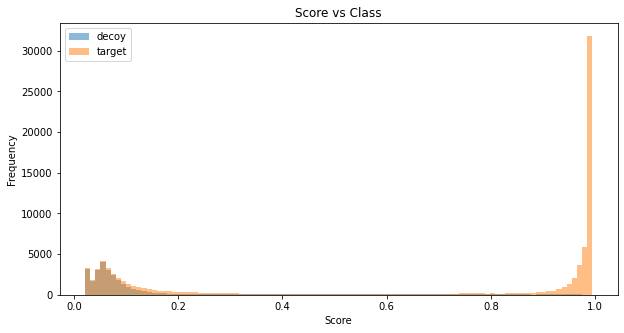

2022-03-17 23:35:44> Global FDR cutoff at 0.8858307213919153.
--- x! ---
2022-03-17 23:35:44> Filter df with x_tandem score
2022-03-17 23:35:44> Global FDR on precursor
2022-03-17 23:35:44> Last q_value 0.010 of dataset is smaller than fdr_level 0.010
2022-03-17 23:35:44> 47,915 target (479 decoy) of 48394 PSMs. fdr 0.009997 for a cutoff of 24.04 (set fdr was 0.01)


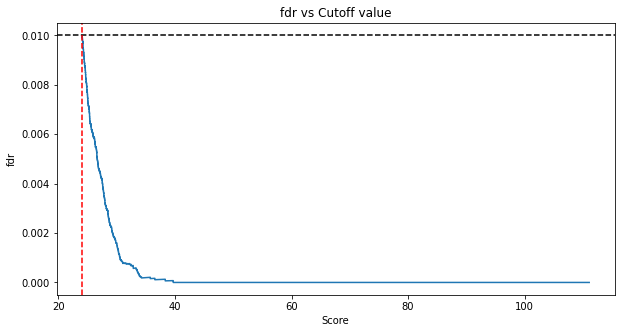

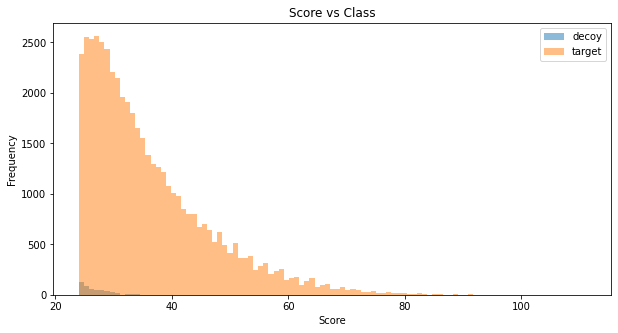

2022-03-17 23:35:45> Global FDR cutoff at 24.03892734307653.


In [6]:
import alphapept.io
from alphapept.score import get_ML_features, filter_with_ML, filter_with_x_tandem, cut_global_fdr, train_RF

ms_file = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'thermo_HeLa.ms_data.hdf'))

df = ms_file.read(dataset_name='second_search')
df = get_ML_features(df)

print('--- ML ---')
cv, features = train_RF(df, plot=True)
df = filter_with_ML(df, cv, features = features)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

print('--- x! ---')
df = filter_with_x_tandem(df)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

## Fractions

### Running a single fraction
In this section, we want to explicitly check, if fractionated samples are correctly handled in terms of FDR and Quantification. For this, we initially check how much we find in a single fractionated sample, as compared to Maxquant.


2022-03-17 23:35:46> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-17 23:35:47> No settings provided. Creating from default settings.
2022-03-17 23:35:47> Couldn't find compiled exe. Using Python version for testing.
2022-03-17 23:35:47> Logging to C:\Users\admin\alphapept\logs\log_20220317233547.txt.
2022-03-17 23:35:47> Platform information:
2022-03-17 23:35:47> system     - Windows
2022-03-17 23:35:47> release    - 10
2022-03-17 23:35:47> version    - 10.0.19044
2022-03-17 23:35:47> machine    - AMD64
2022-03-17 23:35:47> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-17 23:35:47> cpu count  - 24
2022-03-17 23:35:47> ram memory - 118.0/127.7 Gb (available/total)
2022-03-17 23:35:47> 
2022-03-17 23:35:47> Python information:
2022-03-17 23:35:47> SQLAlchemy                    - 1.4.23
2022-03-17 23:35:47> alphapept                     - 0.4.1
2022-03-17 23:35:47> biopython                     - 1.78
2022-03-17 23:35:47> bumpversion        


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:35:48> FASTA contains 20,611 entries.



  5%|███                                                            | 0.047619047619047616/1 [01:05<21:59, 1385.72s/it]
 10%|██████▏                                                          | 0.09523809523809523/1 [01:23<11:50, 785.61s/it]
 14%|█████████▎                                                       | 0.14285714285714285/1 [01:24<06:17, 440.02s/it]
 19%|████████████▍                                                    | 0.19047619047619047/1 [01:26<03:44, 277.02s/it]
 24%|███████████████▍                                                 | 0.23809523809523808/1 [01:27<02:21, 186.25s/it]
 29%|██████████████████▊                                               | 0.2857142857142857/1 [01:28<01:32, 130.02s/it]
 33%|██████████████████████▎                                            | 0.3333333333333333/1 [01:29<01:03, 94.86s/it]
  0%|                                                                                            | 0/1 [03:17<?, ?it/s]

 43%|████████████████████████████▎    

2022-03-17 23:37:42> Digested 20,611 proteins and generated 5,076,854 spectra
2022-03-17 23:38:27> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB
2022-03-17 23:38:34> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:38:34> Processing 1 files for step raw_conversion
2022-03-17 23:38:34> File F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1 has extension .raw - converting from Thermo.
2022-03-17 23:39:17> File conversion complete. Extracted 70,210 precursors.
2022-03-17 23:39:17> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.
2022-03-17 23:39:17> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:39:17> Processing 1 files for step find_features
2022-03-17 23:39:17> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf. Adding to feature finding list.
2022-03-17 23:39:18> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw
2022-03-17 23:39:18> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [00:46<?, ?it/s]


2022-03-17 23:39:21> Number of hills 947,041, len = 14.39
2022-03-17 23:39:21> Repeating hill extraction with centroid_tol 6.61
2022-03-17 23:39:24> Number of hills 1,025,262, len = 14.14
2022-03-17 23:39:24> After duplicate removal of hills 848,010
2022-03-17 23:39:29> After split hill_ptrs 938,711
2022-03-17 23:39:29> After filter hill_ptrs 931,542
2022-03-17 23:41:14> Extracting hill stats complete
2022-03-17 23:41:22> Found 147,553 pre isotope patterns.
2022-03-17 23:41:57> Extracted 159,518 isotope patterns.
2022-03-17 23:41:59> Report complete.
2022-03-17 23:41:59> Matching features to query data.
2022-03-17 23:42:00> Saving feature table.
2022-03-17 23:42:00> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf
2022-03-17 23:42:00> Saving features.
2022-03-17 23:42:00> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.
2022-03-17 23:42:00> ==== search_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:42:00> Starting first search.
2022-03-17 23:42:00> Processing 1 files for step search_db
2022-03-17 23:42:00> Calibrating fragments
2022-03-17 23:42:06> Performing search on 139,144 query and 5,076,854 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-03-17 23:42:08> Found 39,111 psms.
2022-03-17 23:42:08> Extracting columns for scoring.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:23<00:00, 383.46s/it]
  0%|                                                                                            | 0/1 [02:53<?, ?it/s]


2022-03-17 23:42:17> Extracted columns from 39,111 spectra.
2022-03-17 23:42:17> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf
2022-03-17 23:42:18> Search of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.
2022-03-17 23:42:34> First search complete.
2022-03-17 23:42:34> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:42:34> Processing 1 files for step calibrate_hdf
2022-03-17 23:42:34> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw.
2022-03-17 23:42:34> Scoring using X-Tandem
2022-03-17 23:42:34> 16,343 target (163 decoy) of 23920 PSMs. fdr 0.009974 for a cutoff of 20.80 (set fdr was 0.01)
2022-03-17 23:42:34> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw.
2022-03-17 23:42:35> Precursor calibration std 0.96, 0.34
2022-03-17 23:42:35> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf complete.
2022-03-17 23:42:35> Starting fragment calibration.
2022-03-17 23:42:35> Calibrating fragments with neighbors
2022-03-17 23:42:35> Scoring using X-Tandem
2022-03-17 23:42:36> 16,343 target (163 decoy) of 23920 PSMs. fdr 0.009974 for a cutoff of 20.80 (set fdr was 0.01)
2022-03-17 23:42:36> Minimum hits for fragments be



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:43:15> Starting second search with DB.
2022-03-17 23:43:15> Processing 1 files for step search_db
2022-03-17 23:43:15> Found calibrated prec_tol with value 4.79
2022-03-17 23:43:15> Found calibrated frag_tol with value 43.70
2022-03-17 23:43:16> Performing search on 139,144 query and 5,076,854 db entries with frag_tol = 43.70 and prec_tol = 4.79.
2022-03-17 23:43:16> Found 38,985 psms.
2022-03-17 23:43:16> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [00:44<?, ?it/s]


2022-03-17 23:43:24> Extracted columns from 38,985 spectra.
2022-03-17 23:43:24> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf
2022-03-17 23:43:25> Search of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.
2022-03-17 23:43:39> Second search complete.
2022-03-17 23:43:40> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:43:40> Processing 1 files for step score_hdf
2022-03-17 23:43:40> Calling score_hdf
2022-03-17 23:43:40> Found second search psms for scoring.
2022-03-17 23:43:41> Last q_value 0.025 of dataset is smaller than fdr_level 0.100
2022-03-17 23:43:41> 24,748 target (622 decoy) of 25370 PSMs. fdr 0.025133 for a cutoff of 16.44 (set fdr was 0.1)
2022-03-17 23:43:41> The total number of available decoys is lower than the initial set of high scoring targets.
2022-03-17 23:43:41> Training & cross-validation on 746 targets and 745 decoys
2022-03-17 23:43:44> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 150}
2022-03-17 23:43:44> The train accuracy was 1.0
2022-03-17 23:43:44> Testing on 2982 targets and 2983 decoys
2022-03-17 23:43:44> The test accuracy was 0.936127409891031
2022-03-17 23:43:44> Top features {'hits_y': 0.22003810731801127, 'hits': 0.1180961779727814, 'fragments_int_sum': 0.08894532334378119, 'x_tandem': 0.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:43:54> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-03-17 23:43:54> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-17 23:43:54> A total of 20,509 unique and 1,629 shared peptides.
2022-03-17 23:43:55> A total of 460 ambigious proteins
2022-03-17 23:43:55> A total of 253 unique and 7 shared peptides.
2022-03-17 23:43:55> A total of 7 ambigious proteins
2022-03-17 23:43:55> Global FDR on protein_group
2022-03-17 23:43:55> 3,366 target (33 decoy) of 3852 PSMs. fdr 0.009804 for a cutoff of 0.56 (set fdr was 0.01)
2022-03-17 23:43:55> Global FDR cutoff at 0.56.
2022-03-17 23:43:55> FDR on proteins complete. For 0.01 FDR found 24,066 targets and 34 decoys. A total of 3,399 proteins found.
2022-03-17 23:43:55> Saving complete.
2022-03-17 23:43:55> Protein groups complete.
2022-03-17 23:43:55> ==== quantification ====
2022-03-17 23:43:55> Reading protein_fdr for quantification.
2022-03-17 23:43:55> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-17 23:43:56> Complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-17 23:43:56> Starting profile extraction.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:43:56> LFQ complete.
2022-03-17 23:43:56> Extracting protein_summary
2022-03-17 23:43:56> Saved protein_summary of length 3,399 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-17 23:43:56> Updating protein_fdr.
2022-03-17 23:43:56> Exporting as csv.
2022-03-17 23:43:57> Saved df of length 24,100 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-17 23:43:57> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.34s/it]


2022-03-17 23:43:57> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-17 23:43:57> Analysis complete.


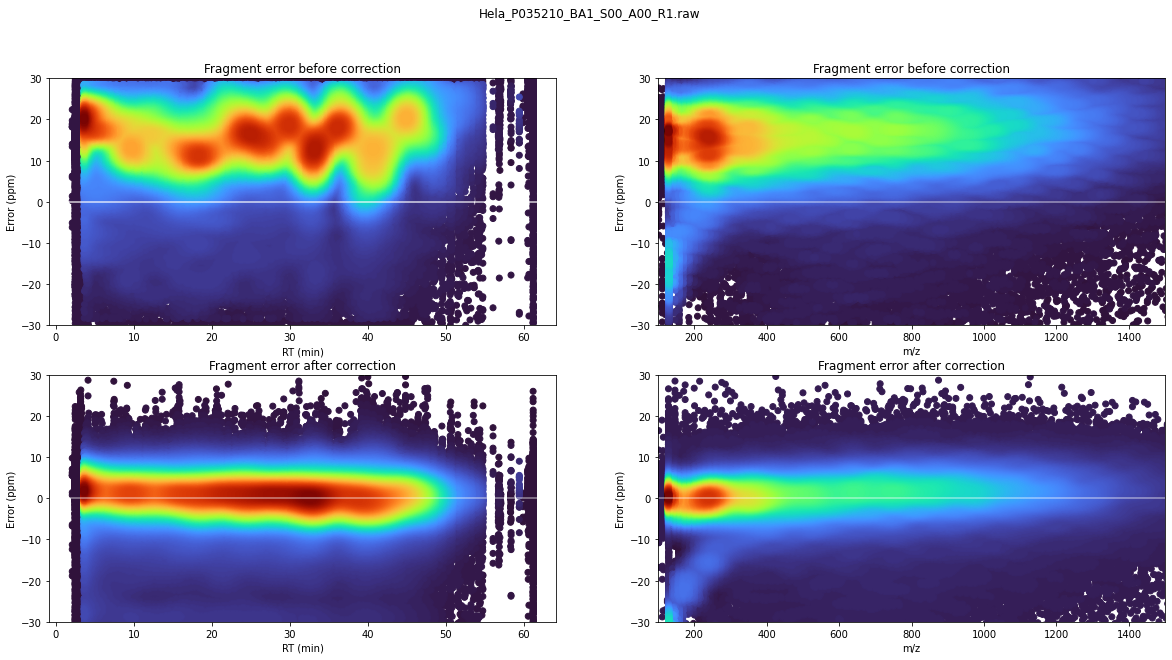

In [7]:
%run -i ../test_ci.py $tmp_folder thermo_singlefrac

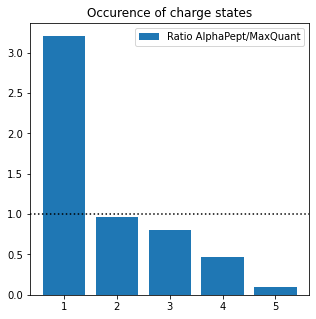

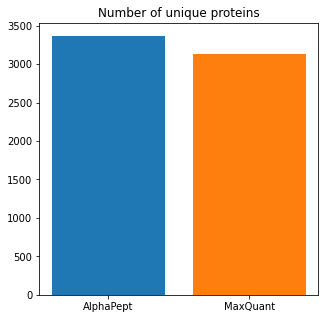

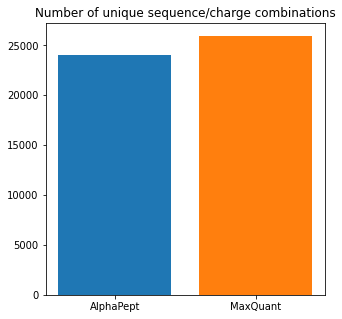

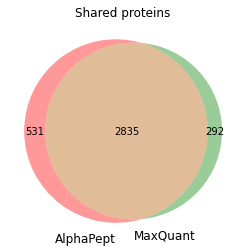

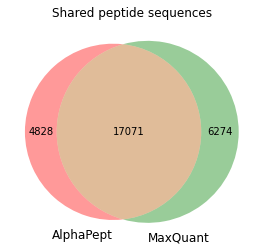

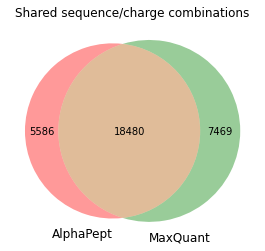

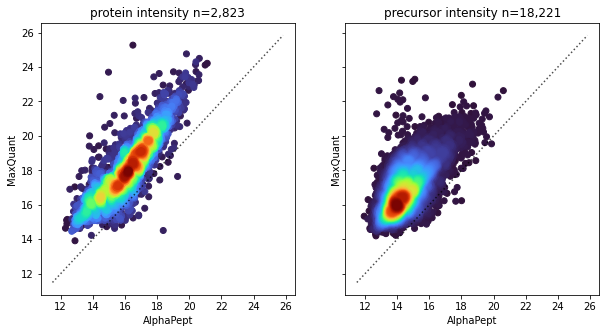

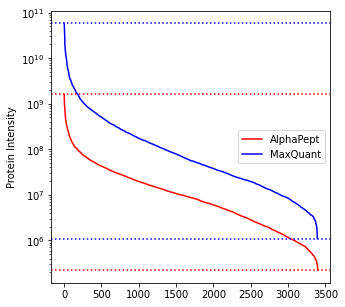

In [8]:
#compare with evidence 
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os
import alphapept.io
import pandas as pd

#ap_full_df = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'Hela_P035210_BA1_S00_A00_R1.ms_data.hdf')).read(dataset_name='peptide_fdr')

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd_singlerun.txt'))

for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Running Multiple fractions
Above, we have seen that a single fraction is quite similar to Maxquant, with slightly fewer hits for AP. We now want to check, if this also translates to multiple fractions


In [9]:
%run -i ../test_ci.py $tmp_folder PXD015087

2022-03-17 23:44:14> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-17 23:44:16> No settings provided. Creating from default settings.
2022-03-17 23:44:16> Couldn't find compiled exe. Using Python version for testing.
2022-03-17 23:44:16> Logging to C:\Users\admin\alphapept\logs\log_20220317234416.txt.
2022-03-17 23:44:16> Platform information:
2022-03-17 23:44:16> system     - Windows
2022-03-17 23:44:16> release    - 10
2022-03-17 23:44:16> version    - 10.0.19044
2022-03-17 23:44:16> machine    - AMD64
2022-03-17 23:44:16> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-17 23:44:16> cpu count  - 24
2022-03-17 23:44:16> ram memory - 116.4/127.7 Gb (available/total)
2022-03-17 23:44:16> 
2022-03-17 23:44:17> Python information:
2022-03-17 23:44:17> SQLAlchemy                    - 1.4.23
2022-03-17 23:44:17> alphapept                     - 0.4.1
2022-03-17 23:44:17> biopython                     - 1.78
2022-03-17 23:44:17> bumpversion        


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:44:17> FASTA contains 20,611 entries.



  5%|███                                                            | 0.047619047619047616/1 [01:05<21:49, 1374.90s/it]
 10%|██████▏                                                          | 0.09523809523809523/1 [01:22<11:47, 782.27s/it]
 14%|█████████▎                                                       | 0.14285714285714285/1 [01:24<06:15, 438.07s/it]
  0%|                                                                                            | 0/1 [01:49<?, ?it/s]

 24%|███████████████▍                                                 | 0.23809523809523808/1 [01:27<02:23, 188.54s/it]
 29%|██████████████████▊                                               | 0.2857142857142857/1 [01:28<01:34, 132.64s/it]
 33%|██████████████████████▎                                            | 0.3333333333333333/1 [01:29<01:06, 99.03s/it]
 38%|█████████████████████████▏                                        | 0.38095238095238093/1 [01:30<00:45, 74.25s/it]
 43%|████████████████████████████▎    

2022-03-17 23:46:12> Digested 20,611 proteins and generated 5,076,854 spectra
2022-03-17 23:46:57> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB
2022-03-17 23:47:04> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:47:04> Processing 4 files for step raw_conversion
2022-03-17 23:47:04> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-17 23:47:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step raw_conversion succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:52<02:36, 208.73s/it]

2022-03-17 23:47:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step raw_conversion succeeded. 50.00 %
2022-03-17 23:47:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step raw_conversion succeeded. 75.00 %
2022-03-17 23:47:57> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step raw_conversion succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:53<00:00, 40.72s/it]

2022-03-17 23:47:57> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:47:57> Processing 4 files for step find_features
2022-03-17 23:47:57> Setting Process limit to 14
2022-03-17 23:47:57> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-17 23:52:41> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step find_features succeeded. 25.00 %




 25%|███████████████████▊                                                           | 0.25/1 [04:43<14:11, 1135.39s/it]

2022-03-17 23:52:41> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step find_features succeeded. 50.00 %
2022-03-17 23:52:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step find_features succeeded. 75.00 %




 75%|████████████████████████████████████████████████████████████                    | 0.75/1 [04:44<01:13, 295.44s/it]

2022-03-17 23:52:44> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step find_features succeeded. 100.00 %




100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:46<00:00, 196.17s/it]

2022-03-17 23:52:44> ==== search_data ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:52:44> Starting first search.
2022-03-17 23:52:44> Processing 4 files for step search_db
2022-03-17 23:52:44> Searching. Setting Process limit to 15.
2022-03-17 23:52:44> AlphaPool was set to 15 processes. Setting max to 15.
2022-03-17 23:53:26> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %





 25%|████████████████████                                                            | 0.25/1 [00:41<02:03, 165.00s/it]

2022-03-17 23:53:26> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-03-17 23:53:26> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %





 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:41<00:10, 43.56s/it]

2022-03-17 23:53:26> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:25<00:00, 385.44s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [05:31<00:00, 331.94s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [09:16<00:00, 556.52s/it]


2022-03-17 23:53:42> First search complete.
2022-03-17 23:53:42> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:53:42> Processing 4 files for step calibrate_hdf
2022-03-17 23:53:42> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-17 23:54:38> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step calibrate_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:55<02:47, 223.92s/it]

2022-03-17 23:54:38> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step calibrate_hdf succeeded. 50.00 %
2022-03-17 23:54:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step calibrate_hdf succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:59<00:15, 63.67s/it]

2022-03-17 23:54:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step calibrate_hdf succeeded. 100.00 %
2022-03-17 23:54:42> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:54:42> Starting second search with DB.
2022-03-17 23:54:42> Processing 4 files for step search_db
2022-03-17 23:54:42> Searching. Setting Process limit to 14.
2022-03-17 23:54:42> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-17 23:55:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %



 25%|████████████████████                                                            | 0.25/1 [00:27<01:23, 111.07s/it]

2022-03-17 23:55:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-03-17 23:55:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %



 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:27<00:07, 29.13s/it]

2022-03-17 23:55:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:31<00:00, 91.19s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:33<00:00, 153.73s/it]


2022-03-17 23:55:25> Second search complete.
2022-03-17 23:55:25> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:55:25> Processing 4 files for step score_hdf
2022-03-17 23:55:25> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-17 23:56:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step score_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [01:29<04:27, 356.47s/it]

2022-03-17 23:56:55> ==== isobaric_labeling ====
2022-03-17 23:56:55> ==== protein_grouping ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:56:55> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-03-17 23:56:55> Extracting protein groups.





 25%|████████████████████                                                            | 0.25/1 [01:29<04:28, 357.44s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:56:55> A total of 20,225 unique and 1,603 shared peptides.


2022-03-17 23:56:55> A total of 460 ambigious proteins
2022-03-17 23:56:56> A total of 103 unique and 8 shared peptides.
2022-03-17 23:56:56> A total of 8 ambigious proteins
2022-03-17 23:56:56> Global FDR on protein_group
2022-03-17 23:56:56> 3,346 target (33 decoy) of 3566 PSMs. fdr 0.009863 for a cutoff of 0.47 (set fdr was 0.01)
2022-03-17 23:56:56> Global FDR cutoff at 0.47441142944038495.
2022-03-17 23:56:56> FDR on proteins complete. For 0.01 FDR found 23,925 targets and 33 decoys. A total of 3,379 proteins found.
2022-03-17 23:56:56> Saving complete.
2022-03-17 23:56:56> Protein groups complete.
2022-03-17 23:56:56> ==== quantification ====
2022-03-17 23:56:56> Reading protein_fdr for quantification.
2022-03-17 23:56:56> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-17 23:56:56> Complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-17 23:56:56> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:56:56> LFQ complete.
2022-03-17 23:56:56> Extracting protein_summary
2022-03-17 23:56:56> Saved protein_summary of length 3,379 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-17 23:56:56> Updating protein_fdr.
2022-03-17 23:56:56> Exporting as csv.
2022-03-17 23:56:57> Saved df of length 23,958 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-17 23:56:57> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.50s/it]


2022-03-17 23:56:59> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-17 23:56:59> Analysis complete.


C:\Users\admin\AppData\Local\Temp/ipykernel_816/1341368599.py:9: DtypeWarning: Columns (51) have mixed types.Specify dtype option on import or set low_memory=False.
  df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))


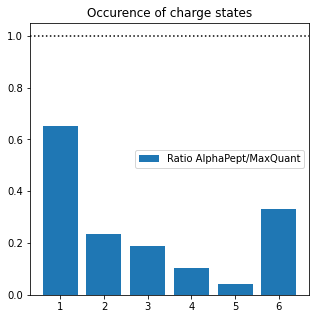

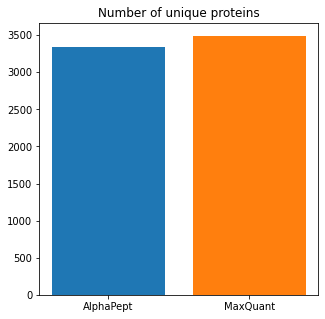

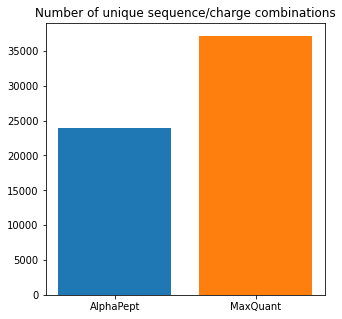

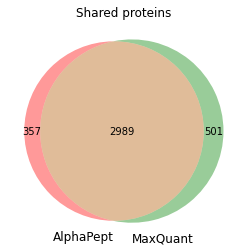

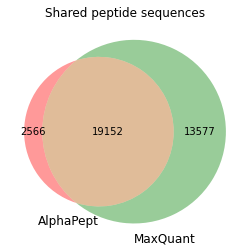

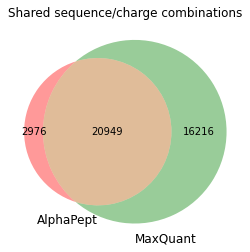

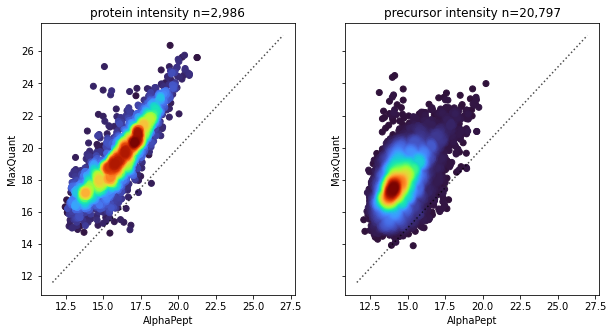

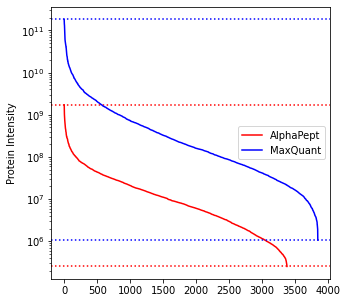

In [10]:

#compare with evidence 
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os
import alphapept.io
import pandas as pd

#ap_full_df = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'Hela_P035210_BA1_S00_A00_R1.ms_data.hdf')).read(dataset_name='peptide_fdr')

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))

for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Running Multiple fractions
Above, we have seen that a single fraction is quite similar to Maxquant, with slightly fewer hits for AP. We now want to check, if this also translates to multiple fractions

In [11]:
%run -i ../test_ci.py $tmp_folder PXD015087

2022-03-17 23:57:04> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-17 23:57:06> No settings provided. Creating from default settings.
2022-03-17 23:57:06> Couldn't find compiled exe. Using Python version for testing.
2022-03-17 23:57:06> Logging to C:\Users\admin\alphapept\logs\log_20220317235706.txt.
2022-03-17 23:57:06> Platform information:
2022-03-17 23:57:06> system     - Windows
2022-03-17 23:57:06> release    - 10
2022-03-17 23:57:06> version    - 10.0.19044
2022-03-17 23:57:06> machine    - AMD64
2022-03-17 23:57:06> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-17 23:57:06> cpu count  - 24
2022-03-17 23:57:06> ram memory - 117.7/127.7 Gb (available/total)
2022-03-17 23:57:06> 
2022-03-17 23:57:06> Python information:
2022-03-17 23:57:06> SQLAlchemy                    - 1.4.23
2022-03-17 23:57:06> alphapept                     - 0.4.1
2022-03-17 23:57:06> biopython                     - 1.78
2022-03-17 23:57:06> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:57:07> FASTA contains 20,611 entries.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:54<00:00, 234.22s/it]
  0%|                                                                                            | 0/1 [01:41<?, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:45<00:00, 28.61s/it]

2022-03-17 23:59:01> Digested 20,611 proteins and generated 5,076,854 spectra
2022-03-17 23:59:46> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB
2022-03-17 23:59:53> ==== import_raw_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-17 23:59:53> Processing 4 files for step raw_conversion
2022-03-17 23:59:53> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 00:00:46> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step raw_conversion succeeded. 25.00 %



 25%|████████████████████                                                            | 0.25/1 [00:52<02:37, 209.77s/it]

2022-03-18 00:00:46> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step raw_conversion succeeded. 50.00 %
2022-03-18 00:00:46> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step raw_conversion succeeded. 75.00 %
2022-03-18 00:00:46> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step raw_conversion succeeded. 100.00 %



100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:52<00:00, 40.13s/it]

2022-03-18 00:00:46> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:00:46> Processing 4 files for step find_features
2022-03-18 00:00:46> Setting Process limit to 14
2022-03-18 00:00:46> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-18 00:05:33> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step find_features succeeded. 25.00 %




 25%|███████████████████▊                                                           | 0.25/1 [04:47<14:21, 1148.87s/it]

2022-03-18 00:05:33> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step find_features succeeded. 50.00 %
2022-03-18 00:05:34> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step find_features succeeded. 75.00 %




 75%|████████████████████████████████████████████████████████████                    | 0.75/1 [04:47<01:14, 298.81s/it]

2022-03-18 00:05:38> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step find_features succeeded. 100.00 %




100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:51<00:00, 201.05s/it]

2022-03-18 00:05:38> ==== search_data ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:05:38> Starting first search.
2022-03-18 00:05:38> Processing 4 files for step search_db
2022-03-18 00:05:38> Searching. Setting Process limit to 14.
2022-03-18 00:05:38> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-18 00:06:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %





 25%|████████████████████                                                            | 0.25/1 [00:41<02:03, 164.15s/it]

2022-03-18 00:06:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-03-18 00:06:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %





 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:41<00:10, 43.21s/it]

2022-03-18 00:06:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:29<00:00, 389.93s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [05:36<00:00, 336.90s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [09:22<00:00, 562.93s/it]


2022-03-18 00:06:33> First search complete.
2022-03-18 00:06:34> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:06:34> Processing 4 files for step calibrate_hdf
2022-03-18 00:06:34> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 00:07:30> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step calibrate_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:56<02:48, 224.94s/it]

2022-03-18 00:07:30> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step calibrate_hdf succeeded. 50.00 %
2022-03-18 00:07:34> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step calibrate_hdf succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:59<00:15, 63.89s/it]

2022-03-18 00:07:34> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step calibrate_hdf succeeded. 100.00 %
2022-03-18 00:07:34> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:07:34> Starting second search with DB.
2022-03-18 00:07:34> Processing 4 files for step search_db
2022-03-18 00:07:34> Searching. Setting Process limit to 14.
2022-03-18 00:07:34> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-18 00:08:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %



 25%|████████████████████                                                            | 0.25/1 [00:27<01:22, 110.52s/it]

2022-03-18 00:08:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-03-18 00:08:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %



 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:28<00:07, 29.52s/it]

2022-03-18 00:08:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:31<00:00, 91.66s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:27<00:00, 147.91s/it]


2022-03-18 00:08:17> Second search complete.
2022-03-18 00:08:17> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:08:17> Processing 4 files for step score_hdf
2022-03-18 00:08:17> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 00:09:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step score_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [01:28<04:24, 352.65s/it]

2022-03-18 00:09:45> ==== isobaric_labeling ====
2022-03-18 00:09:45> ==== protein_grouping ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:09:45> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-03-18 00:09:45> Extracting protein groups.





 25%|████████████████████                                                            | 0.25/1 [01:28<04:25, 353.51s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-18 00:09:45> A total of 20,225 unique and 1,603 shared peptides.
2022-03-18 00:09:46> A total of 460 ambigious proteins
2022-03-18 00:09:46> A total of 103 unique and 8 shared peptides.
2022-03-18 00:09:46> A total of 8 ambigious proteins
2022-03-18 00:09:46> Global FDR on protein_group
2022-03-18 00:09:46> 3,346 target (33 decoy) of 3566 PSMs. fdr 0.009863 for a cutoff of 0.47 (set fdr was 0.01)
2022-03-18 00:09:46> Global FDR cutoff at 0.47441142944038495.
2022-03-18 00:09:47> FDR on proteins complete. For 0.01 FDR found 23,925 targets and 33 decoys. A total of 3,379 proteins found.
2022-03-18 00:09:47> Saving complete.
2022-03-18 00:09:47> Protein groups complete.
2022-03-18 00:09:47> ==== quantification ====
2022-03-18 00:09:47> Reading protein_fdr for quantification.
2022-03-18 00:09:47> Saving protein_groups after delayed normalization to combined_protein_fdr_dn


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-18 00:09:47> Complete.
2022-03-18 00:09:47> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:09:47> LFQ complete.
2022-03-18 00:09:47> Extracting protein_summary
2022-03-18 00:09:47> Saved protein_summary of length 3,379 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-18 00:09:47> Updating protein_fdr.
2022-03-18 00:09:47> Exporting as csv.
2022-03-18 00:09:48> Saved df of length 23,958 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-18 00:09:48> ==== export ====
2022-03-18 00:09:50> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-18 00:09:50> Analysis complete.


C:\Users\admin\AppData\Local\Temp/ipykernel_816/2038381451.py:9: DtypeWarning: Columns (51) have mixed types.Specify dtype option on import or set low_memory=False.
  df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))


level_0  charge   db_idx  decoy  decoys_cum   delta_m  delta_m_ppm  \
index                                                                        
135687        0     2.0  1628203  False           0 -0.000746    -2.096321   
141184        2     2.0  2120477  False           0  0.000640     1.309576   
118556        8     2.0   132272  False           7 -0.000074    -0.238724   
119424       72     2.0   223559  False          57 -0.000466    -1.705622   
119422       73     1.0   223559  False           4 -0.003039    -8.248005   
...         ...     ...      ...    ...         ...       ...          ...   
153322    24122     2.0  3836490  False          13 -0.002416    -5.831971   
148635    24123     2.0  2935263  False          58  0.000498     1.147771   
123822    24137     2.0   658746  False          28 -0.000269    -0.948975   
153320    24138     3.0  3836604   True         107 -0.005003    -9.905252   
148505    24140     2.0  2916136  False          43 -0.005887   -13.948273   

        delta_m_ppm_abs       fdr  feature_idx  ...  decoy_protein  \
index                                           ...                  
135687         2.096321  0.000000         1607  ...          False   
141184         1.309576  0.000000        53212  ...          False   
118556         0.238724  0.000258         7351  ...          False   
119424         1.705622  0.001753         3338  ...          False   
119422         8.248005  0.000155        45139  ...          False   
...                 ...       ...          ...  ...            ...   
153322         5.831971  0.000453        75464  ...          False   
148635         1.147771  0.001783        76422  ...          False   
123822         0.948975  0.000897       106904  ...          False   
153320         9.905252  0.003218       105954  ...           True   
148505        13.948273  0.001350        77252  ...          False   

       n_possible_proteins index_protein_group  score_protein_group  \
index                                                                 
135687                   1                 636             0.994853   
141184                   1                 636             0.994853   
118556                   1                 636             0.994853   
119424                   1                 636             0.994853   
119422                   1                 636             0.994853   
...                    ...                 ...                  ...   
153322                   1                3408             0.881995   
148635                   1                1873             0.662307   
123822                   1                2463             0.780798   
153320                   1                  61             0.549445   
148505                   1                2325             0.733489   

        target_protein_group  target_cum_protein_group  \
index                                                    
135687                  True                       152   
141184                  True                       152   
118556                  True                       152   
119424                  True                       152   
119422                  True                       152   
...                      ...                       ...   
153322                  True                      3107   
148635                  True                      3284   
123822                  True                      3220   
153320                 False                      3323   
148505                  True                      3253   

        decoys_cum_protein_group  fdr_protein_group  q_value_protein_group  \
index                                                                        
135687                         0           0.000000               0.000000   
141184                         0           0.000000               0.000000   
118556                         0           0.000000               0.000000   
119424       

Sequence  Length Modifications  \
0       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
1       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
2       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
3       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
4                         AAAAAAALQAK      11    Unmodified   
...                               ...     ...           ...   
109111                   YYVTIIDAPGHR      12    Unmodified   
109112                   YYVTIIDAPGHR      12    Unmodified   
109113                   YYVTIIDAPGHR      12    Unmodified   
109114                   YYVTIIDAPGHR      12    Unmodified   
109115                   YYVTIIDAPGHR      12    Unmodified   

                      Modified sequence Oxidation (M) Probabilities  \
0       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
1       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
2       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
3       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
4                         _AAAAAAALQAK_                         NaN   
...                                 ...                         ...   
109111                   _YYVTIIDAPGHR_                         NaN   
109112                   _YYVTIIDAPGHR_                         NaN   
109113                   _YYVTIIDAPGHR_                         NaN   
109114                   _YYVTIIDAPGHR_                         NaN   
109115                   _YYVTIIDAPGHR_                         NaN   

       Oxidation (M) Score Diffs  Acetyl (Protein N-term)  Oxidation (M)  \
0                            NaN                        0              0   
1                            NaN                        0              0   
2                            NaN                        0              0   
3                            NaN                        0              0   
4                            NaN                        0              0   
...                          ...                      ...            ...   
109111                       NaN                        0              0   
109112                       NaN                        0              0   
109113                       NaN                        0              0   
109114                       NaN                        0              0   
109115                       NaN                        0              0   

        Missed cleavages                                     Proteins  ...  \
0                      0                        sp|P37108|SRP14_HUMAN  ...   
1                      0                        sp|P37108|SRP14_HUMAN  ...   
2                      0                        sp|P37108|SRP14_HUMAN  ...   
3                      0                        sp|P37108|SRP14_HUMAN  ...   
4                      0                          sp|P36578|RL4_HUMAN  ...   
...                  ...                                          ...  ...   
109111                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109112                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109113                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109114                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109115                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   

       AIF MS/MS IDs Oxidation (M) site IDs charge  \
0                NaN                    NaN      2   
1                NaN                    NaN      2   
2                NaN                    NaN      2   
3                NaN                    NaN      2   
4                NaN                    NaN      2   
...              ...                    ...    ...   
109111           NaN                    NaN      3   
109112           NaN                    NaN      2   
109113           NaN                    NaN      3   
109114           NaN         

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.03s/it]


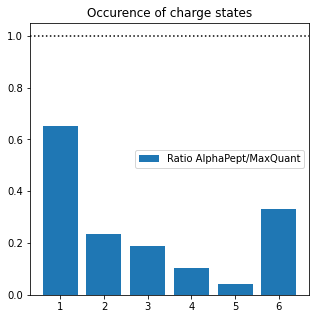

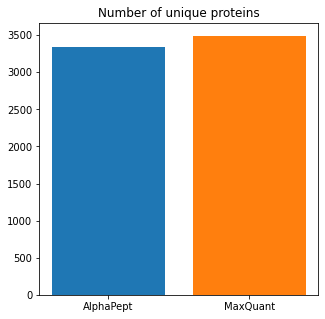

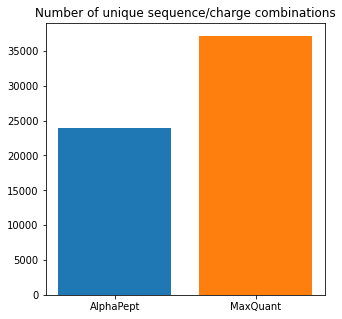

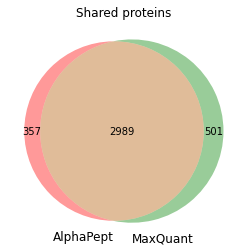

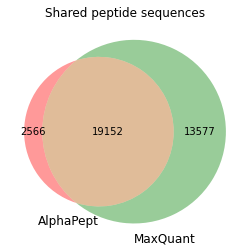

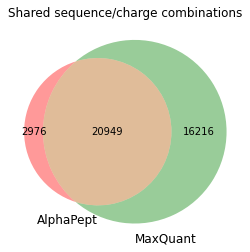

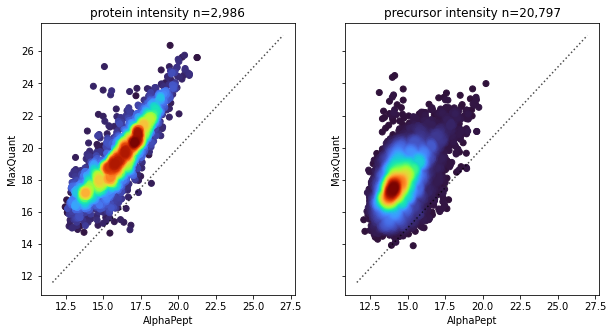

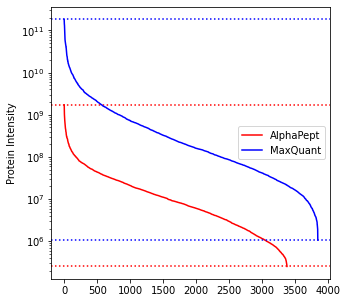

In [12]:
#compare with evidence 
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os
import alphapept.io
import pandas as pd

#ap_full_df = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'Hela_P035210_BA1_S00_A00_R1.ms_data.hdf')).read(dataset_name='peptide_fdr')

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))

display(df1)
display(df2)
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

# Quantification Test

This notebook will run `PXD006109` and `PXD010012` and compare the quantificaiton performance.

## PXD006109

In [13]:
%run -i ../test_ci.py $tmp_folder PXD006109 
#test_ci.main(runtype="PXD006109", new_files=False)

2022-03-18 00:09:55> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-18 00:10:01> No settings provided. Creating from default settings.
2022-03-18 00:10:01> Couldn't find compiled exe. Using Python version for testing.
2022-03-18 00:10:01> Logging to C:\Users\admin\alphapept\logs\log_20220318001001.txt.
2022-03-18 00:10:01> Platform information:
2022-03-18 00:10:01> system     - Windows
2022-03-18 00:10:01> release    - 10
2022-03-18 00:10:01> version    - 10.0.19044
2022-03-18 00:10:01> machine    - AMD64
2022-03-18 00:10:01> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-18 00:10:01> cpu count  - 24
2022-03-18 00:10:01> ram memory - 114.1/127.7 Gb (available/total)
2022-03-18 00:10:01> 
2022-03-18 00:10:02> Python information:
2022-03-18 00:10:02> SQLAlchemy                    - 1.4.23
2022-03-18 00:10:02> alphapept                     - 0.4.1
2022-03-18 00:10:02> biopython                     - 1.78
2022-03-18 00:10:02> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:10:03> FASTA contains 43,752 entries.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:40<00:00, 220.59s/it]
  0%|                                                                                            | 0/1 [01:29<?, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:02<00:00, 18.64s/it]

2022-03-18 00:12:18> Digested 43,752 proteins and generated 5,835,394 spectra
2022-03-18 00:13:13> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.27 GB
2022-03-18 00:13:23> ==== import_raw_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:13:23> Processing 6 files for step raw_conversion
2022-03-18 00:13:23> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 00:14:38> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step raw_conversion succeeded. 16.67 %



 17%|██████████▊                                                      | 0.16666666666666666/1 [01:14<06:14, 449.71s/it]

2022-03-18 00:14:38> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step raw_conversion succeeded. 33.33 %
2022-03-18 00:14:38> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step raw_conversion succeeded. 50.00 %
2022-03-18 00:14:39> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step raw_conversion succeeded. 66.67 %



 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:16<00:29, 87.77s/it]

2022-03-18 00:14:39> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step raw_conversion succeeded. 83.33 %
2022-03-18 00:14:39> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step raw_conversion succeeded. 100.00 %
2022-03-18 00:14:40> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:14:40> Processing 6 files for step find_features
2022-03-18 00:14:40> Setting Process limit to 15
2022-03-18 00:14:40> AlphaPool was set to 15 processes. Setting max to 15.
2022-03-18 00:20:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step find_features succeeded. 16.67 %




 17%|██████████▋                                                     | 0.16666666666666666/1 [05:24<27:00, 1944.77s/it]

2022-03-18 00:20:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step find_features succeeded. 33.33 %
2022-03-18 00:20:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step find_features succeeded. 50.00 %




 50%|████████████████████████████████████████▌                                        | 0.5/1 [05:25<04:13, 507.38s/it]

2022-03-18 00:20:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step find_features succeeded. 66.67 %
2022-03-18 00:20:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step find_features succeeded. 83.33 %
2022-03-18 00:20:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step find_features succeeded. 100.00 %
2022-03-18 00:20:05> ==== search_data ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:20:05> Starting first search.
2022-03-18 00:20:05> Processing 6 files for step search_db
2022-03-18 00:20:05> Searching. Setting Process limit to 15.
2022-03-18 00:20:05> AlphaPool was set to 15 processes. Setting max to 15.
2022-03-18 00:21:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step search_db succeeded. 16.67 %





 17%|██████████▊                                                      | 0.16666666666666666/1 [01:14<06:14, 449.43s/it]

2022-03-18 00:21:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step search_db succeeded. 33.33 %
2022-03-18 00:21:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step search_db succeeded. 50.00 %
2022-03-18 00:21:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step search_db succeeded. 66.67 %





 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:15<00:28, 85.66s/it]

2022-03-18 00:21:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step search_db succeeded. 83.33 %
2022-03-18 00:21:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step search_db succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:01<00:00, 481.87s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:45<00:00, 405.02s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [11:28<00:00, 688.85s/it]


2022-03-18 00:21:39> First search complete.
2022-03-18 00:21:39> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:21:39> Processing 6 files for step calibrate_hdf
2022-03-18 00:21:39> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 00:24:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step calibrate_hdf succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [02:24<12:03, 868.03s/it]

2022-03-18 00:24:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step calibrate_hdf succeeded. 33.33 %
2022-03-18 00:24:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step calibrate_hdf succeeded. 50.00 %
2022-03-18 00:24:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step calibrate_hdf succeeded. 66.67 %
2022-03-18 00:24:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step calibrate_hdf succeeded. 83.33 %
2022-03-18 00:24:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step calibrate_hdf succeeded. 100.00 %
2022-03-18 00:24:04> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:24:04> Starting second search with DB.
2022-03-18 00:24:04> Processing 6 files for step search_db
2022-03-18 00:24:04> Searching. Setting Process limit to 14.
2022-03-18 00:24:04> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-18 00:24:48> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step search_db succeeded. 16.67 %



 17%|██████████▊                                                      | 0.16666666666666666/1 [00:44<03:40, 265.01s/it]

2022-03-18 00:24:48> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step search_db succeeded. 33.33 %
2022-03-18 00:24:48> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step search_db succeeded. 50.00 %
2022-03-18 00:24:51> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step search_db succeeded. 66.67 %



 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [00:46<00:18, 54.06s/it]

2022-03-18 00:24:51> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step search_db succeeded. 83.33 %
2022-03-18 00:24:51> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step search_db succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:15<00:00, 195.41s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:51<00:00, 291.11s/it]


2022-03-18 00:25:09> Second search complete.
2022-03-18 00:25:10> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:25:10> Processing 6 files for step score_hdf
2022-03-18 00:25:10> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 00:27:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step score_hdf succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [02:12<11:01, 794.18s/it]

2022-03-18 00:27:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step score_hdf succeeded. 33.33 %
2022-03-18 00:27:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step score_hdf succeeded. 50.00 %
2022-03-18 00:27:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step score_hdf succeeded. 66.67 %


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [02:35<01:02, 187.14s/it]

2022-03-18 00:27:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step score_hdf succeeded. 83.33 %
2022-03-18 00:27:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step score_hdf succeeded. 100.00 %
2022-03-18 00:27:45> ==== isobaric_labeling ====
2022-03-18 00:27:45> ==== protein_grouping ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:27:45> Fasta dict with length 43,752, Pept dict with length 5,835,400
2022-03-18 00:27:45> Extracting protein groups.





100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:35<00:00, 155.67s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-18 00:27:47> A total of 57,068 unique and 11,182 shared peptides.
2022-03-18 00:27:51> A total of 1931 ambigious proteins
2022-03-18 00:27:52> A total of 1,739 unique and 206 shared peptides.
2022-03-18 00:27:52> A total of 194 ambigious proteins
2022-03-18 00:27:54> Global FDR on protein_group
2022-03-18 00:27:54> 6,850 target (68 decoy) of 10821 PSMs. fdr 0.009927 for a cutoff of 0.96 (set fdr was 0.01)
2022-03-18 00:27:54> Global FDR cutoff at 0.9576718178662955.
2022-03-18 00:27:55> FDR on proteins complete. For 0.01 FDR found 247,948 targets and 216 decoys. A total of 6,918 proteins found.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-18 00:27:56> Saving complete.
2022-03-18 00:27:56> Protein groups complete.
2022-03-18 00:27:56> ==== quantification ====
2022-03-18 00:27:56> Reading protein_fdr for quantification.
2022-03-18 00:27:57> Delayed Normalization.
2022-03-18 00:27:57> Setting minimum occurence to 5.0
2022-03-18 00:28:01> Saving protein_groups after delayed normalization to combined_protein_fdr_dn


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-18 00:28:01> Complete.
2022-03-18 00:28:01> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:28:02> Preparing protein table for parallel processing.


 20%|█████████████                                                     | 0.19745591211332755/1 [00:05<00:22, 28.49s/it]

2022-03-18 00:28:07> Starting protein extraction for 6918 proteins.
2022-03-18 00:28:07> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████▉| 0.9995374385660596/1 [03:21<00:00, 220.92s/it]

2022-03-18 00:31:29> LFQ complete.
2022-03-18 00:31:29> Extracting protein_summary
2022-03-18 00:31:29> Saved protein_summary of length 6,918 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-18 00:31:29> Updating protein_fdr.
2022-03-18 00:31:30> Exporting as csv.
2022-03-18 00:31:39> Saved df of length 248,164 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-18 00:31:40> ==== export ====
2022-03-18 00:31:47> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-18 00:31:47> Analysis complete.


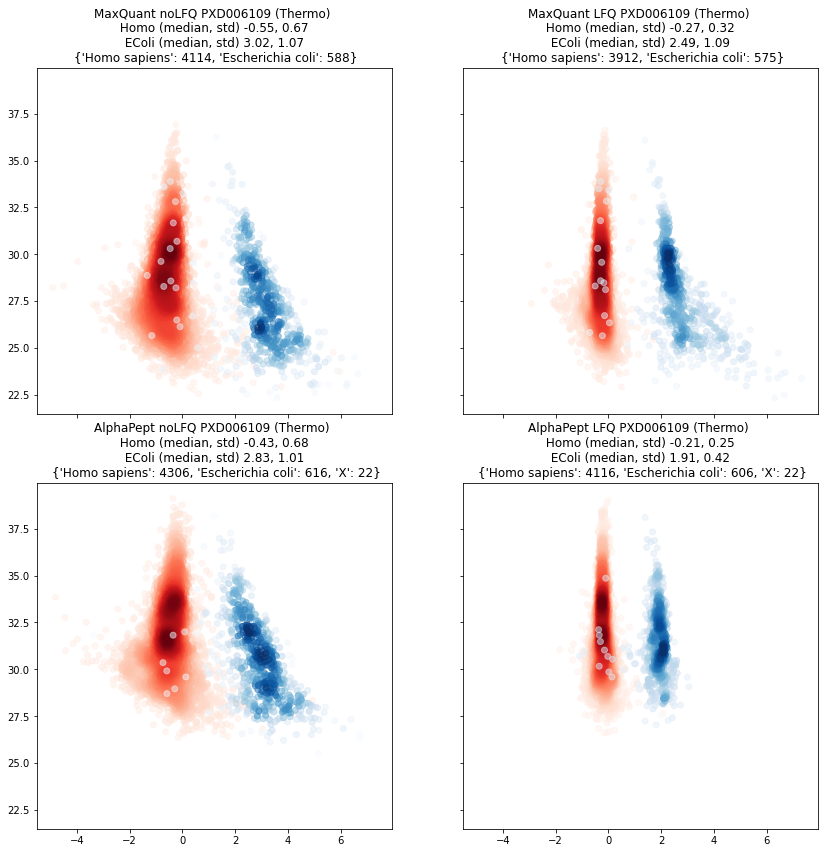

In [14]:
from test_helper import get_plot_df, add_species_column
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, 'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]


species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

## CV plot

C:\Users\admin\AppData\Local\Temp/ipykernel_816/1044225642.py:22: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
C:\Users\admin\AppData\Local\Temp/ipykernel_816/1044225642.py:26: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\AppData\Local\Temp/ipykernel_816/1044225642.py:58: RuntimeWarning: Mean of empty slice
  cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
C:\Users\admin\AppData\Local\Temp/ipykernel_816/1044225642.py:62: RuntimeWarning: Mean of empty slice
  cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)


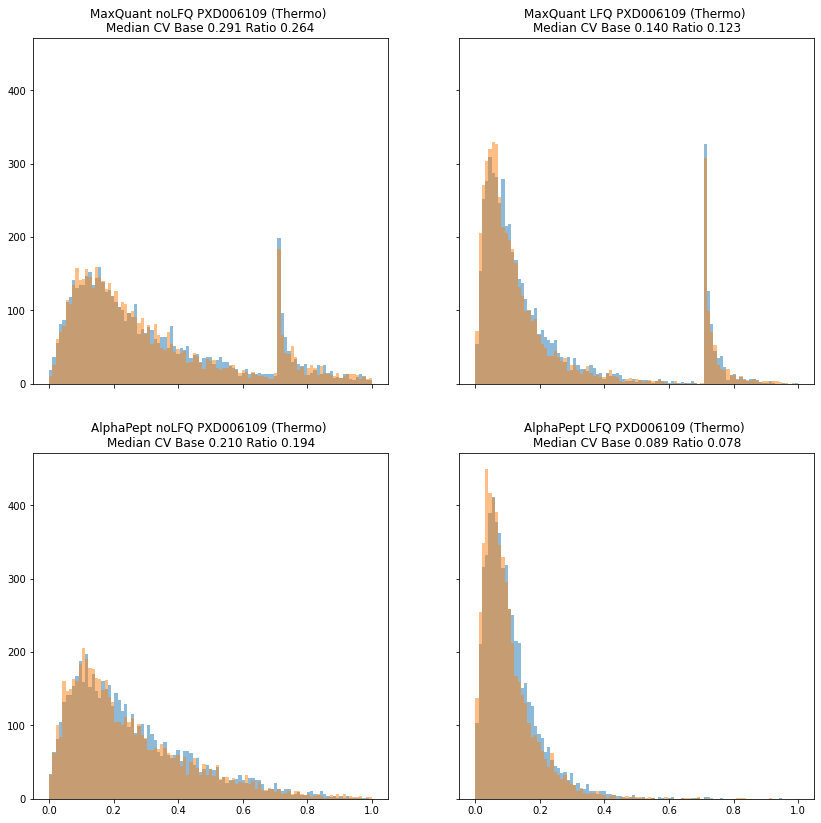

In [15]:
bins = np.linspace(0,1,100)

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
        
    cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
    cv_base = cv[cv>0]
    axes[0,j].hist(cv_base, bins = bins, label = id_, alpha = 0.5)
    
    cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
    cv_ratio = cv[cv>0]
    axes[0,j].hist(cv_ratio, bins = bins, label = id_, alpha = 0.5)

    axes[0,j].set_title(f'{id_} \nMedian CV Base {np.nanmedian(cv_base):.3f} Ratio {np.nanmedian(cv_ratio):.3f}')

path = os.path.join(TEST_DIR,'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'

    cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
    cv_base = cv[cv>0]
    axes[1,j].hist(cv_base, bins = bins, label = id_, alpha = 0.5)
    
    cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
    cv_ratio = cv[cv>0]
    axes[1,j].hist(cv_ratio, bins = bins, label = id_, alpha = 0.5)

    axes[1,j].set_title(f'{id_} \nMedian CV Base {np.nanmedian(cv_base):.3f} Ratio {np.nanmedian(cv_ratio):.3f}')

    #axes[1,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[1,j].set_title(f'{id_} \nMedian CV Base {np.nanmedian(cv_base):.3f} Ratio {np.nanmedian(cv_ratio):.3f}')

plt.show()

## Algorithm Test

Test performance of LFQ algorithm on MaxQuant evidence file.

In [16]:
try: 
    import ipywidgets
except ModuleNotFoundError:
    !pip install ipywidgets

2022-03-18 00:31:50> Loading files
2022-03-18 00:31:52> A total of 6 files.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [07:49<00:00, 469.60s/it]
  0%|                                                                                            | 0/1 [04:08<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:52<00:00, 232.37s/it]


2022-03-18 00:32:02> A total of 6,854 proteins.
2022-03-18 00:32:10> Setting minimum occurence to 6.0
2022-03-18 00:32:12> Preparing protein table for parallel processing.
2022-03-18 00:32:17> Starting protein extraction for 6854 proteins.
2022-03-18 00:32:17> AlphaPool was set to 24 processes. Setting max to 24.


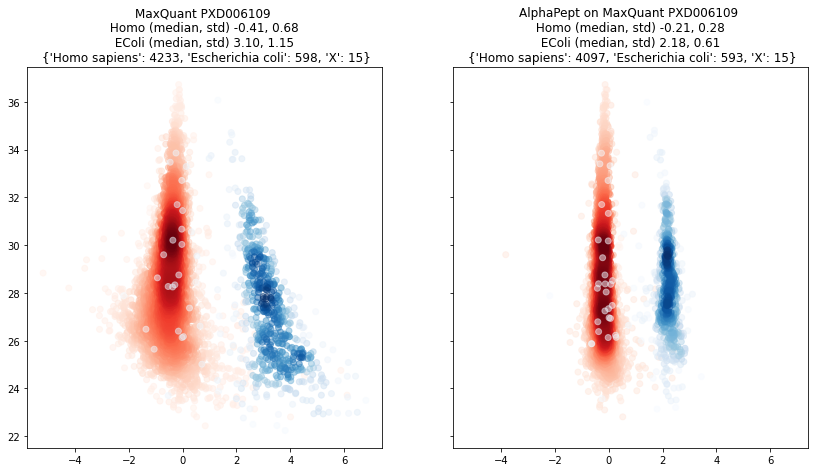

In [17]:
from alphapept.quantification import protein_profile_parallel_mq
import test_helper
import pandas as pd


evidence_path = os.path.join(tmp_folder,'PXD006109_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD006109_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
test_helper.add_species_column(ref)
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD006109'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'HeLa2' in _]
    ratio_columns = [_ for _ in ds if 'HeLa12' in _]
    test_helper.get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

## Normalization Checks

### Check only the delayed normalization part

2022-03-18 00:34:54> Setting minimum occurence to 4.0
2022-03-18 00:34:55> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\panda

2022-03-18 00:34:56> Setting minimum occurence to 4.0
2022-03-18 00:34:57> Setting minimum occurence to 4.0
2022-03-18 00:34:58> Setting minimum occurence to 4.0
2022-03-18 00:34:58> Setting minimum occurence to 4.0
2022-03-18 00:34:59> Setting minimum occurence to 4.0


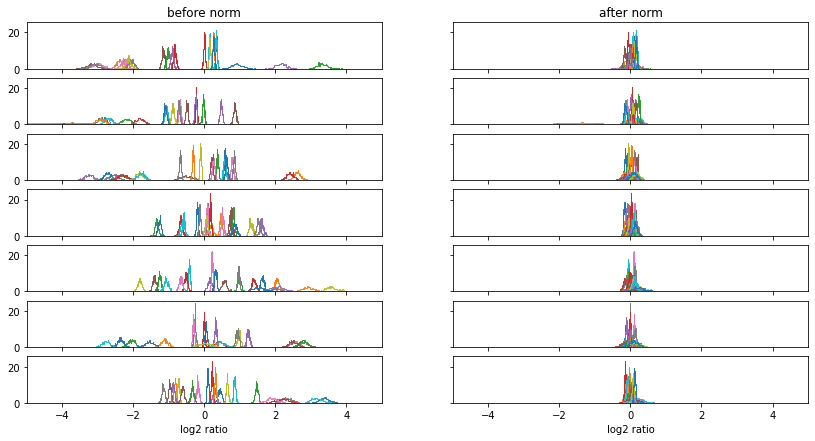

In [18]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import test_helper
from alphapept.quantification import delayed_normalization


def visualize_normalization(simulated_df, axis, value = "Intensity",show_per_colpair = True):
    
    shortnames = df["filename"].unique()
    df["namefrac"] = [f"{n}_{f}" for n,f in zip(simulated_df["filename"], simulated_df["fraction"])]
    simulated_reformat = pd.pivot_table(simulated_df, values=value, columns="namefrac" ,index=["protein_group", "precursor" ])
    
    for namepair in itertools.combinations(shortnames, 2):
        cols1 = [x for x in simulated_reformat.columns if namepair[0] in x]
        cols2 = [x for x in simulated_reformat.columns if namepair[1] in x]
        for colpair in itertools.product(cols1, cols2):
            fcs = np.log2(simulated_reformat[colpair[0]]) - np.log2(simulated_reformat[colpair[1]])
            axis.hist(fcs, histtype = 'step', bins = 50, label = f"{colpair}", density = True)
            axis.set_xlim(-5, 5)

samplenames = ["A1", "A2","B1"]
fractions = [3, 2, 3]

ntests = 7
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(14,7), sharex=True,sharey=True)
count_axis = 0
axes[0][0].set_title("before norm")
axes[-1][0].set_xlabel('log2 ratio')
axes[0][1].set_title("after norm")
axes[-1][1].set_xlabel('log2 ratio')
for _ in range(ntests):
    df = test_helper.simulate_biased_peptides(5000, samplenames, fractions)
    df_del, normed = delayed_normalization(df, field ='Intensity')
    visualize_normalization(df, axes[count_axis][0],value = "Intensity", show_per_colpair = False)
    visualize_normalization(df_del, axes[count_axis][1],value = "Intensity_dn", show_per_colpair = False)
    count_axis+=1

### Check delayed normalization + protein intensity estimation

2022-03-18 00:35:01> Setting minimum occurence to 3.0
2022-03-18 00:35:03> Preparing protein table for parallel processing.
2022-03-18 00:35:04> Starting protein extraction for 3332 proteins.
2022-03-18 00:35:04> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 00:35:33> Preparing protein table for parallel processing.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s


2022-03-18 00:35:33> Starting protein extraction for 3332 proteins.
2022-03-18 00:35:33> AlphaPool was set to 24 processes. Setting max to 24.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s


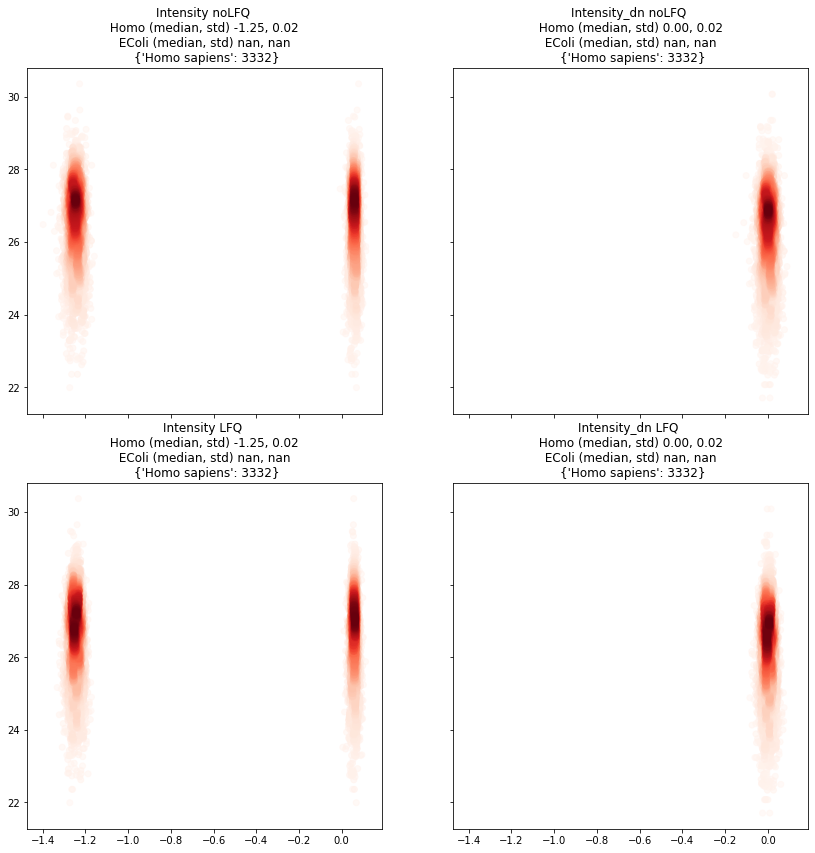

In [19]:
from alphapept.quantification import delayed_normalization, protein_profile_parallel
import test_helper
import pandas as pd
import matplotlib.pyplot as plt
import itertools

samplenames = ["A1", "A2", "B1"]
fractions = [1, 1, 1]
test_id = 'PXD006109'

df = test_helper.simulate_biased_peptides(20000, samplenames, fractions)
df, normed = delayed_normalization(df, field ='Intensity')

fields = ['Intensity', 'Intensity_dn']
tests = ['noLFQ', 'LFQ']

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

for j, field in  enumerate(fields):
    
    pt = protein_profile_parallel(df, minimum_ratios=1, field=field)
    pt['Species'] = ["Homo sapiens" for x in range(len(pt.index))]
    
    pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
    lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]
    
    for i, cols in enumerate([pre_lfq, lfq]):
        
        ax = axes[i, j]
        samplepairs = itertools.product([x for x in cols if "A" in x ], [x for x in cols if "B" in x ])
        
        for pair in samplepairs:
            
            base_columns = [pair[0]]
            ratio_columns = [pair[1]]
            test_helper.get_plot_df(pt, base_columns, ratio_columns, ax, f"{fields[j]} {tests[i]}", valid_filter = False)

plt.show()

### Bruker HeLa

2022-03-18 00:36:05> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-18 00:36:10> No settings provided. Creating from default settings.
2022-03-18 00:36:10> Couldn't find compiled exe. Using Python version for testing.
2022-03-18 00:36:10> Logging to C:\Users\admin\alphapept\logs\log_20220318003610.txt.
2022-03-18 00:36:10> Platform information:
2022-03-18 00:36:10> system     - Windows
2022-03-18 00:36:10> release    - 10
2022-03-18 00:36:10> version    - 10.0.19044
2022-03-18 00:36:10> machine    - AMD64
2022-03-18 00:36:10> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-18 00:36:10> cpu count  - 24
2022-03-18 00:36:10> ram memory - 116.5/127.7 Gb (available/total)
2022-03-18 00:36:10> 
2022-03-18 00:36:10> Python information:
2022-03-18 00:36:10> SQLAlchemy                    - 1.4.23
2022-03-18 00:36:10> alphapept                     - 0.4.1
2022-03-18 00:36:10> biopython                     - 1.78
2022-03-18 00:36:10> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:36:11> FASTA contains 36,789 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:15<00:00, 41.24s/it]

2022-03-18 00:38:42> Digested 36,789 proteins and generated 8,624,766 spectra
2022-03-18 00:40:00> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.32 GB
2022-03-18 00:40:15> ==== import_raw_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 00:40:15> Processing 1 files for step raw_conversion
2022-03-18 00:40:15> File F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa has extension .d - converting from Bruker.
2022-03-18 01:04:49> File conversion complete. Extracted 299,728 precursors.
2022-03-18 01:04:52> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-03-18 01:04:52> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 01:04:52> Processing 1 files for step find_features
2022-03-18 01:04:52> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf. Adding to feature finding list.
2022-03-18 01:04:52> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d
2022-03-18 01:04:52> Using Windows FF
2022-03-18 01:04:57> Bruker featurer finder complete. Extracted 261,932 features.
2022-03-18 01:04:57> Matching features to query data.
2022-03-18 01:05:02> Saving feature table.
2022-03-18 01:05:03> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2022-03-18 01:05:03> Saving features.
2022-03-18 01:05:03> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-03-18 01:05:03> ==== search_data ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 01:05:03> Starting first search.
2022-03-18 01:05:03> Processing 1 files for step search_db
2022-03-18 01:05:03> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2022-03-18 01:05:24> Performing search on 664,992 query and 8,624,766 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-03-18 01:06:13> Found 672,625 psms.
2022-03-18 01:06:13> Extracting columns for scoring.


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [30:28<00:00, 1828.41s/it]
  0%|                                                                                            | 0/1 [01:47<?, ?it/s]


2022-03-18 01:07:54> Extracted columns from 672,625 spectra.
2022-03-18 01:07:56> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2022-03-18 01:08:01> Search of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-03-18 01:08:29> First search complete.
2022-03-18 01:08:29> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 01:08:29> Processing 1 files for step calibrate_hdf
2022-03-18 01:08:29> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d.
2022-03-18 01:08:30> Scoring using X-Tandem
2022-03-18 01:08:32> 58,709 target (587 decoy) of 163415 PSMs. fdr 0.009998 for a cutoff of 19.43 (set fdr was 0.01)
2022-03-18 01:08:32> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d.
2022-03-18 01:08:39> Precursor calibration std 2.64, 1.75
2022-03-18 01:08:39> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf complete.
2022-03-18 01:08:39> Starting fragment calibration.
2022-03-18 01:08:39> Calibrating fragments with neighbors
2022-03-18 01:08:41> Scoring using X-Tandem
2022-03-18 01:08:43> 58,709 target (587 decoy) of 163415 PSMs. fdr 0.009998 for a cutoff of 19.43 (set fdr was 0.01)
2022-03-18 01:08:44> Minimum hits for fragments before score 7.00.
2022-03-18 01:08:45> Minimum hits


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 01:13:46> Starting second search with DB.
2022-03-18 01:13:46> Processing 1 files for step search_db
2022-03-18 01:13:46> Found calibrated prec_tol with value 13.20
2022-03-18 01:13:46> Found calibrated frag_tol with value 54.51
2022-03-18 01:13:50> Performing search on 664,992 query and 8,624,766 db entries with frag_tol = 54.51 and prec_tol = 13.20.
2022-03-18 01:14:14> Found 1,330,657 psms.
2022-03-18 01:14:14> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [06:27<?, ?it/s]


2022-03-18 01:16:58> Extracted columns from 1,330,657 spectra.
2022-03-18 01:17:02> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2022-03-18 01:17:11> Search of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-03-18 01:17:38> Second search complete.
2022-03-18 01:17:39> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 01:17:39> Processing 1 files for step score_hdf
2022-03-18 01:17:39> Calling score_hdf
2022-03-18 01:17:41> Found second search psms for scoring.
2022-03-18 01:18:04> 71,576 target (7,157 decoy) of 248722 PSMs. fdr 0.099992 for a cutoff of 18.37 (set fdr was 0.1)
2022-03-18 01:18:05> Training & cross-validation on 15635 targets and 15635 decoys
2022-03-18 01:18:28> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 200}
2022-03-18 01:18:28> The train accuracy was 0.9566357531180045
2022-03-18 01:18:28> Testing on 62542 targets and 62542 decoys
2022-03-18 01:18:29> The test accuracy was 0.9415352882862716
2022-03-18 01:18:29> Top features {'x_tandem': 0.25483063393188293, 'hits': 0.18966578712542223, 'hits_y': 0.16079000604697985, 'n_fragments_matched': 0.09756366665105837, 'fragments_matched_n_ratio': 0.08032145114316737, 'fragments_matched_int_ratio': 0.05367379541951329, 'hits_b': 0.02726306369500843, 'n_missed': 0.02



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 01:19:20> Fasta dict with length 36,789, Pept dict with length 8,624,772
2022-03-18 01:19:20> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 01:19:20> A total of 53,277 unique and 2,929 shared peptides.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-18 01:19:21> A total of 805 ambigious proteins
2022-03-18 01:19:22> A total of 614 unique and 29 shared peptides.
2022-03-18 01:19:22> A total of 29 ambigious proteins
2022-03-18 01:19:22> Global FDR on protein_group
2022-03-18 01:19:22> 6,401 target (64 decoy) of 7871 PSMs. fdr 0.009998 for a cutoff of 0.98 (set fdr was 0.01)
2022-03-18 01:19:22> Global FDR cutoff at 0.980184389009106.
2022-03-18 01:19:23> FDR on proteins complete. For 0.01 FDR found 63,522 targets and 68 decoys. A total of 6,465 proteins found.
2022-03-18 01:19:23> Saving complete.
2022-03-18 01:19:23> Protein groups complete.
2022-03-18 01:19:23> ==== quantification ====
2022-03-18 01:19:23> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-18 01:19:23> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-18 01:19:23> Complete.
2022-03-18 01:19:23> Starting profile extraction.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.43it/s]

2022-03-18 01:19:23> LFQ complete.
2022-03-18 01:19:24> Extracting protein_summary
2022-03-18 01:19:24> Saved protein_summary of length 6,465 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-18 01:19:24> Updating protein_fdr.
2022-03-18 01:19:24> Exporting as csv.
2022-03-18 01:19:26> Saved df of length 63,590 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-18 01:19:26> ==== export ====
2022-03-18 01:19:32> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-18 01:19:32> Analysis complete.


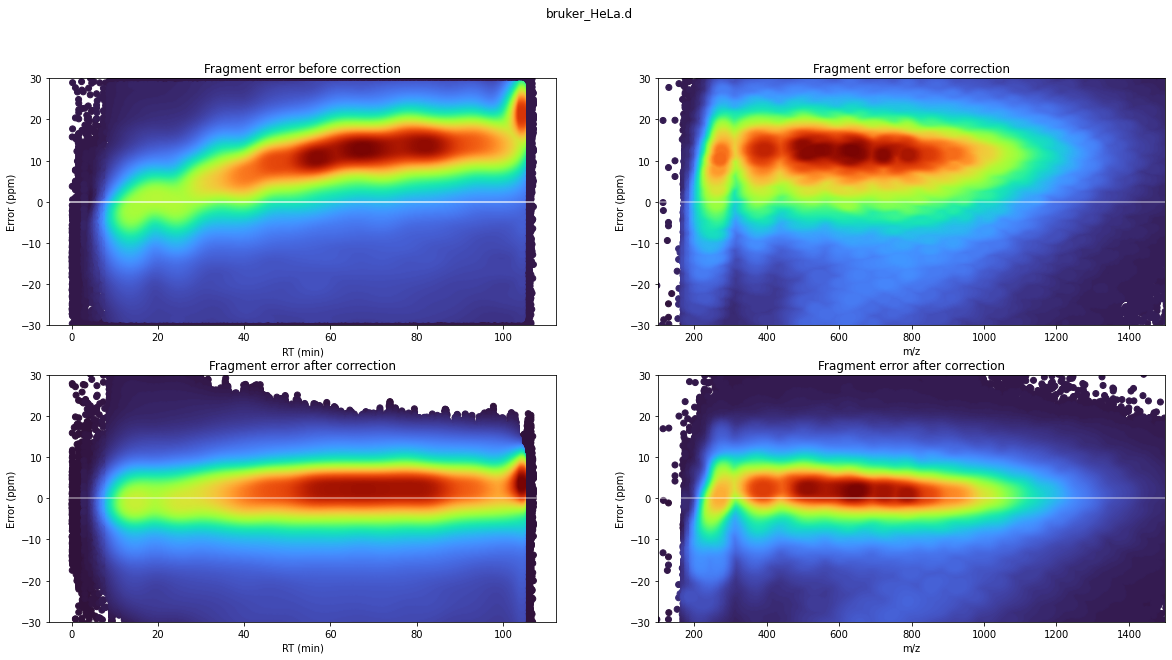

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:21<00:00, 81.61s/it]


In [20]:
%run -i ../test_ci.py $tmp_folder bruker_hela

C:\Users\admin\AppData\Local\Temp/ipykernel_816/3550195270.py:3: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  df1, df2 = prepare_files(os.path.join(TEST_DIR, "results.hdf"), os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))


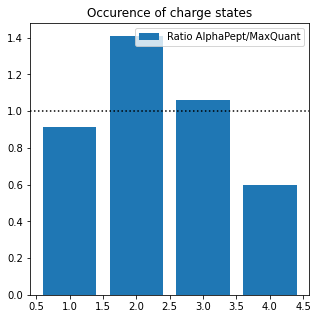

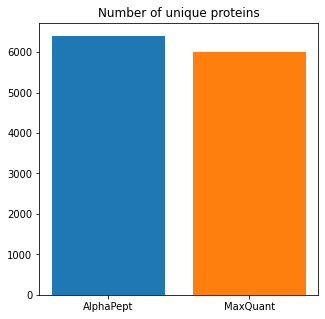

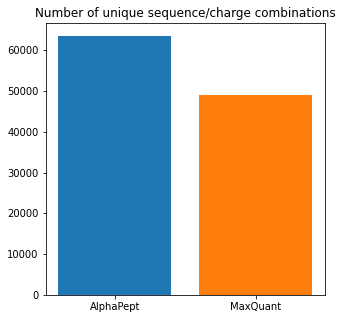

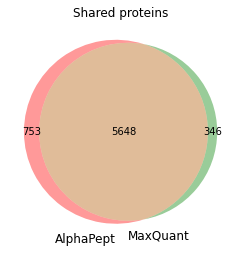

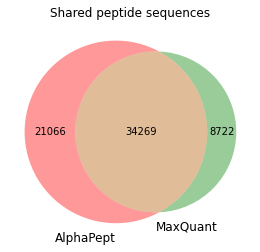

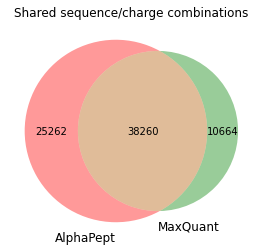

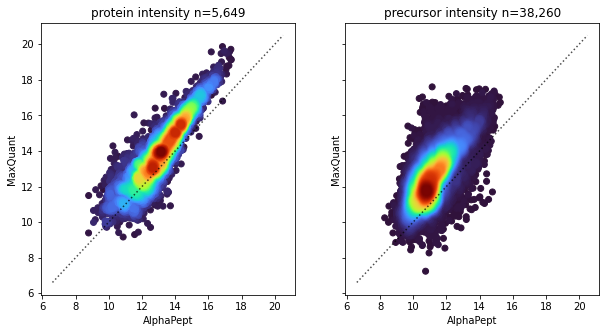

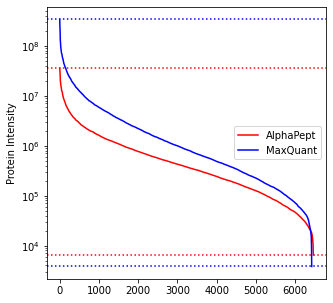

In [21]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank

df1, df2 = prepare_files(os.path.join(TEST_DIR, "results.hdf"), os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

## PXD010012

In [22]:
%run -i ../test_ci.py $tmp_folder PXD010012

2022-03-18 01:20:49> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-18 01:22:51> No settings provided. Creating from default settings.
2022-03-18 01:22:51> Couldn't find compiled exe. Using Python version for testing.
2022-03-18 01:22:51> Logging to C:\Users\admin\alphapept\logs\log_20220318012251.txt.
2022-03-18 01:22:51> Platform information:
2022-03-18 01:22:51> system     - Windows
2022-03-18 01:22:51> release    - 10
2022-03-18 01:22:51> version    - 10.0.19044
2022-03-18 01:22:51> machine    - AMD64
2022-03-18 01:22:51> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-18 01:22:51> cpu count  - 24
2022-03-18 01:22:51> ram memory - 111.6/127.7 Gb (available/total)
2022-03-18 01:22:51> 
2022-03-18 01:22:51> Python information:
2022-03-18 01:22:51> SQLAlchemy                    - 1.4.23
2022-03-18 01:22:51> alphapept                     - 0.4.1
2022-03-18 01:22:51> biopython                     - 1.78
2022-03-18 01:22:51> bumpversion        



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 01:22:52> FASTA contains 43,752 entries.




  2%|█▍                                                             | 0.022727272727272728/1 [01:09<49:55, 3065.13s/it]

  5%|██▊                                                            | 0.045454545454545456/1 [01:11<20:39, 1298.49s/it]

  7%|████▍                                                            | 0.06818181818181818/1 [01:16<12:30, 805.45s/it]

  9%|█████▉                                                           | 0.09090909090909091/1 [01:20<08:29, 560.20s/it]

 11%|███████▍                                                         | 0.11363636363636363/1 [01:30<07:47, 526.90s/it]

 14%|████████▊                                                        | 0.13636363636363635/1 [01:32<05:20, 370.76s/it]

 16%|██████████▌                                                       | 0.1590909090909091/1 [01:34<03:49, 272.62s/it]

 18%|███████████▊                                                     | 0.18181818181818182/1 [01:35<02:50, 207.80s/it]

 20%|█████████████▎           

2022-03-18 01:25:13> Digested 43,752 proteins and generated 5,835,394 spectra
2022-03-18 01:26:06> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.27 GB
2022-03-18 01:26:17> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 01:26:17> Processing 10 files for step raw_conversion
2022-03-18 01:26:17> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 02:14:31> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step raw_conversion succeeded. 10.00 %


 10%|███████▋                                                                     | 0.1/1 [48:13<7:14:01, 28934.72s/it]

2022-03-18 02:14:33> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step raw_conversion succeeded. 20.00 %


 20%|███████████████▍                                                             | 0.2/1 [48:15<2:39:03, 11929.02s/it]

2022-03-18 02:14:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step raw_conversion succeeded. 30.00 %


 30%|███████████████████████▍                                                      | 0.3/1 [48:22<1:15:58, 6511.60s/it]

2022-03-18 02:14:51> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step raw_conversion succeeded. 40.00 %


 40%|████████████████████████████████                                                | 0.4/1 [48:33<39:51, 3985.49s/it]

2022-03-18 02:14:51> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step raw_conversion succeeded. 50.00 %
2022-03-18 02:15:12> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step raw_conversion succeeded. 60.00 %


 60%|████████████████████████████████████████████████                                | 0.6/1 [48:54<12:51, 1928.04s/it]

2022-03-18 02:15:26> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step raw_conversion succeeded. 70.00 %


 70%|████████████████████████████████████████████████████████                        | 0.7/1 [49:09<07:11, 1438.28s/it]

2022-03-18 02:15:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step raw_conversion succeeded. 80.00 %


 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [49:40<03:44, 1122.28s/it]

2022-03-18 02:15:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step raw_conversion succeeded. 90.00 %
2022-03-18 02:15:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step raw_conversion succeeded. 100.00 %
2022-03-18 02:15:58> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:15:58> Processing 10 files for step find_features
2022-03-18 02:15:58> Using Bruker Feature Finder. Setting Process limit to 4.
2022-03-18 02:15:58> AlphaPool was set to 4 processes. Setting max to 4.
2022-03-18 02:16:18> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step find_features succeeded. 10.00 %



 10%|████████                                                                         | 0.1/1 [00:20<03:05, 205.93s/it]

2022-03-18 02:16:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step find_features succeeded. 20.00 %



 20%|████████████████▍                                                                 | 0.2/1 [00:20<01:09, 86.94s/it]

2022-03-18 02:16:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step find_features succeeded. 30.00 %
2022-03-18 02:16:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step find_features succeeded. 40.00 %



 40%|████████████████████████████████▊                                                 | 0.4/1 [00:21<00:19, 33.00s/it]

2022-03-18 02:16:32> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step find_features succeeded. 50.00 %



 50%|█████████████████████████████████████████                                         | 0.5/1 [00:34<00:31, 62.79s/it]

2022-03-18 02:16:33> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step find_features succeeded. 60.00 %



 60%|█████████████████████████████████████████████████▏                                | 0.6/1 [00:34<00:18, 45.38s/it]

2022-03-18 02:16:33> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step find_features succeeded. 70.00 %
2022-03-18 02:16:33> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step find_features succeeded. 80.00 %
2022-03-18 02:16:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step find_features succeeded. 90.00 %



 90%|█████████████████████████████████████████████████████████████████████████▊        | 0.9/1 [00:44<00:03, 38.09s/it]

2022-03-18 02:16:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step find_features succeeded. 100.00 %



100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:44<00:00, 30.63s/it]

2022-03-18 02:16:43> ==== search_data ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:16:43> Starting first search.
2022-03-18 02:16:43> Processing 10 files for step search_db
2022-03-18 02:16:43> Searching. Setting Process limit to 14.
2022-03-18 02:16:43> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-18 02:24:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step search_db succeeded. 10.00 %





 10%|███████▊                                                                      | 0.1/1 [08:01<1:12:17, 4818.97s/it]

2022-03-18 02:24:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step search_db succeeded. 20.00 %
2022-03-18 02:24:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step search_db succeeded. 30.00 %
2022-03-18 02:24:47> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step search_db succeeded. 40.00 %





 40%|████████████████████████████████▍                                                | 0.4/1 [08:04<09:11, 918.45s/it]

2022-03-18 02:24:51> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step search_db succeeded. 50.00 %





 50%|████████████████████████████████████████▌                                        | 0.5/1 [08:08<05:36, 673.62s/it]

2022-03-18 02:24:52> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step search_db succeeded. 60.00 %





 60%|████████████████████████████████████████████████▌                                | 0.6/1 [08:09<03:14, 485.37s/it]

2022-03-18 02:24:53> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step search_db succeeded. 70.00 %





 70%|████████████████████████████████████████████████████████▋                        | 0.7/1 [08:09<01:43, 346.11s/it]

2022-03-18 02:24:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step search_db succeeded. 80.00 %





 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [08:10<00:49, 247.61s/it]

2022-03-18 02:24:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step search_db succeeded. 90.00 %
2022-03-18 02:24:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step search_db succeeded. 100.00 %


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [58:42<00:00, 3522.47s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [09:01<00:00, 541.65s/it]
100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:02:09<00:00, 3729.65s/it]


2022-03-18 02:25:17> First search complete.
2022-03-18 02:25:17> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:25:17> Processing 10 files for step calibrate_hdf
2022-03-18 02:25:17> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 02:29:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step calibrate_hdf succeeded. 10.00 %


 10%|████████                                                                        | 0.1/1 [04:27<40:09, 2676.87s/it]

2022-03-18 02:29:51> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step calibrate_hdf succeeded. 20.00 %


 20%|████████████████                                                                | 0.2/1 [04:34<15:11, 1139.72s/it]

2022-03-18 02:29:53> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step calibrate_hdf succeeded. 30.00 %


 30%|████████████████████████▎                                                        | 0.3/1 [04:35<07:18, 626.78s/it]

2022-03-18 02:29:53> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step calibrate_hdf succeeded. 40.00 %
2022-03-18 02:29:53> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step calibrate_hdf succeeded. 50.00 %
2022-03-18 02:30:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step calibrate_hdf succeeded. 60.00 %


 60%|████████████████████████████████████████████████▌                                | 0.6/1 [05:03<01:49, 272.56s/it]

2022-03-18 02:30:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step calibrate_hdf succeeded. 70.00 %
2022-03-18 02:30:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step calibrate_hdf succeeded. 80.00 %


 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [05:05<00:34, 171.06s/it]

2022-03-18 02:30:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step calibrate_hdf succeeded. 90.00 %
2022-03-18 02:30:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step calibrate_hdf succeeded. 100.00 %
2022-03-18 02:30:23> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:30:23> Starting second search with DB.
2022-03-18 02:30:23> Processing 10 files for step search_db
2022-03-18 02:30:23> Searching. Setting Process limit to 14.
2022-03-18 02:30:23> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-18 02:36:30> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step search_db succeeded. 10.00 %



 10%|████████                                                                        | 0.1/1 [06:07<55:03, 3670.04s/it]

2022-03-18 02:37:15> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step search_db succeeded. 20.00 %



 20%|████████████████                                                                | 0.2/1 [06:52<23:43, 1779.35s/it]

2022-03-18 02:37:15> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step search_db succeeded. 30.00 %
2022-03-18 02:37:15> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step search_db failed. Exception Unable to allocate 109. MiB for an array with shape (1246915,) and data type [('query_idx', '<i4'), ('db_idx', '<i4'), ('hits', '<f8'), ('mass_db', '<f4'), ('prec_offset', '<f4'), ('prec_offset_ppm', '<f4'), ('prec_offset_raw', '<f4'), ('prec_offset_raw_ppm', '<f4'), ('delta_m', '<f4'), ('delta_m_ppm', '<f4'), ('fragments_matched_int_ratio', '<f4'), ('fragments_int_ratio', '<f4'), ('fragments_int_sum', '<i8'), ('fragments_matched_int_sum', '<i8'), ('n_fragments_matched', '<i8'), ('fragment_ion_idx', '<i8'), ('hits_b', '<i8')]
2022-03-18 02:37:15> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step search_db succeeded. 50.00 %
2022-03-18 02:37:15> Processing


 33%|█████████████████████▋                                           | 0.33333333333333326/1 [10:34<05:14, 472.21s/it]

2022-03-18 02:41:00> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step search_db succeeded. 66.67 %



 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [10:37<01:44, 313.95s/it]

2022-03-18 02:41:07> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step search_db succeeded. 100.00 %



100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [15:54<00:00, 954.95s/it]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [24:40<00:00, 1480.02s/it]


2022-03-18 02:41:31> Second search complete.
2022-03-18 02:41:32> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:41:32> Processing 10 files for step score_hdf
2022-03-18 02:41:32> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 02:45:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step score_hdf succeeded. 10.00 %


 10%|████████                                                                        | 0.1/1 [03:33<32:00, 2133.41s/it]

2022-03-18 02:45:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step score_hdf succeeded. 20.00 %


 20%|████████████████                                                                | 0.2/1 [03:55<13:28, 1010.42s/it]

2022-03-18 02:45:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step score_hdf succeeded. 30.00 %
2022-03-18 02:45:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step score_hdf succeeded. 40.00 %
2022-03-18 02:45:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step score_hdf succeeded. 50.00 %
2022-03-18 02:45:28> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step score_hdf succeeded. 60.00 %
2022-03-18 02:45:28> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step score_hdf succeeded. 70.00 %
2022-03-18 02:45:28> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step score_hdf succeeded. 80.00 %
2022-03-18 02:45:28> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step sco



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:45:28> Fasta dict with length 43,752, Pept dict with length 5,835,400
2022-03-18 02:45:28> Extracting protein groups.





100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:56<00:00, 236.76s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-18 02:45:32> A total of 54,309 unique and 7,185 shared peptides.
2022-03-18 02:45:35> A total of 1795 ambigious proteins
2022-03-18 02:45:35> A total of 3,080 unique and 290 shared peptides.
2022-03-18 02:45:36> A total of 263 ambigious proteins
2022-03-18 02:45:38> Global FDR on protein_group
2022-03-18 02:45:38> 7,040 target (70 decoy) of 12675 PSMs. fdr 0.009943 for a cutoff of 0.99 (set fdr was 0.01)
2022-03-18 02:45:38> Global FDR cutoff at 0.9940195738805688.
2022-03-18 02:45:41> FDR on proteins complete. For 0.01 FDR found 424,041 targets and 265 decoys. A total of 7,110 proteins found.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-18 02:45:42> Saving complete.
2022-03-18 02:45:42> Protein groups complete.
2022-03-18 02:45:42> ==== quantification ====
2022-03-18 02:45:42> Reading protein_fdr for quantification.
2022-03-18 02:45:43> Delayed Normalization.
2022-03-18 02:45:43> Setting minimum occurence to 10.0
2022-03-18 02:45:44> Normalization with SLSQP failed. Trying BFGS
2022-03-18 02:45:49> Saving protein_groups after delayed normalization to combined_protein_fdr_dn


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-18 02:45:50> Complete.
2022-03-18 02:45:50> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:45:50> Preparing protein table for parallel processing.


 20%|█████████████                                                     | 0.19786216596343179/1 [00:07<00:29, 36.57s/it]

2022-03-18 02:45:58> Starting protein extraction for 7110 proteins.
2022-03-18 02:45:58> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████▉| 0.9997749648382559/1 [03:17<00:00, 218.83s/it]

2022-03-18 02:49:13> LFQ complete.
2022-03-18 02:49:13> Extracting protein_summary
2022-03-18 02:49:13> Saved protein_summary of length 7,110 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-18 02:49:14> Updating protein_fdr.
2022-03-18 02:49:14> Exporting as csv.
2022-03-18 02:49:30> Saved df of length 424,306 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-18 02:49:30> ==== export ====
2022-03-18 02:50:32> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-18 02:50:32> Analysis complete.


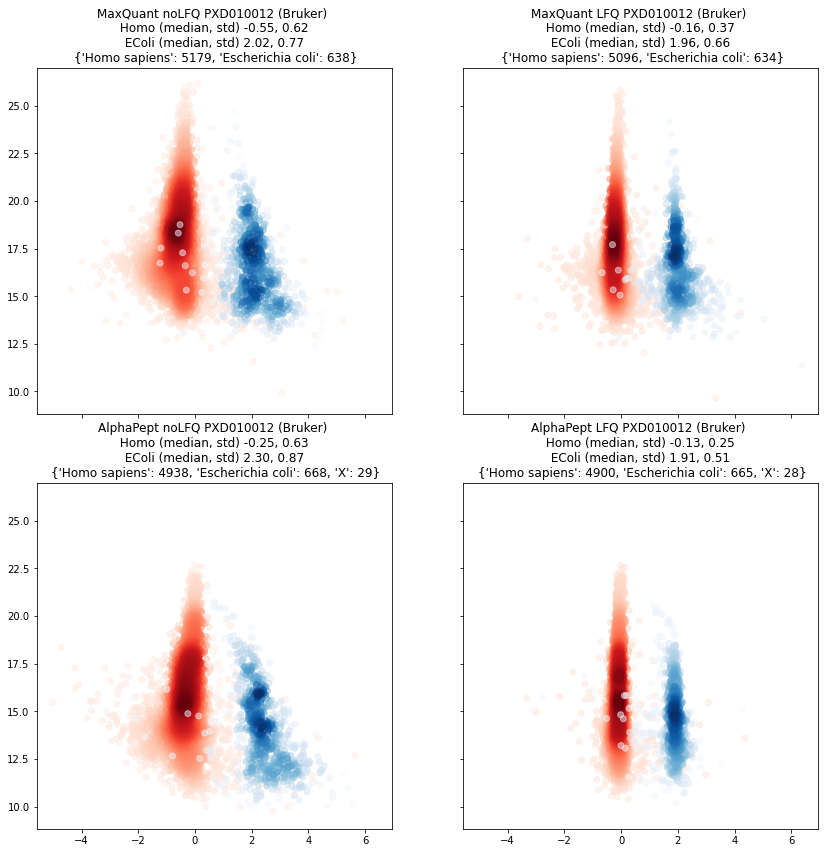

In [23]:
from test_helper import get_plot_df
import matplotlib.pyplot as plt
import seaborn as sns
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref.txt'), sep='\t') 

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Base_{i}" for i in range(1,6)]
    ratio_columns = [f"{x}ntensity Ratio_{i}" for i in range(1,6)]

    id_ = 'MaxQuant ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, "results.hdf") #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD010012_CT_{i}_C1_01_Base{x}" for i in range(1,4)]
    ratio_columns = [f"PXD010012_CT_{i}_C2_01_Ratio{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

2022-03-18 02:50:34> Loading files


C:\Users\admin\AppData\Local\Temp/ipykernel_816/1951999832.py:7: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  pt = protein_profile_parallel_mq(evidence_path, protein_group_path)


2022-03-18 02:50:38> A total of 10 files.
2022-03-18 02:50:48> A total of 7,413 proteins.
2022-03-18 02:50:56> Setting minimum occurence to 10.0
2022-03-18 02:51:02> Preparing protein table for parallel processing.
2022-03-18 02:51:08> Starting protein extraction for 7413 proteins.
2022-03-18 02:51:08> AlphaPool was set to 24 processes. Setting max to 24.


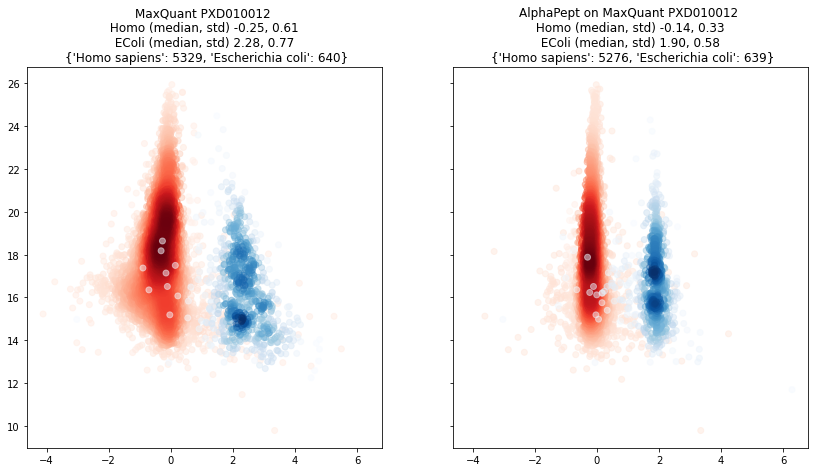

In [24]:
from alphapept.quantification import protein_profile_parallel_mq
from test_helper import get_plot_df

evidence_path = os.path.join(tmp_folder,'PXD010012_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD010012_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD010012'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'Base' in _]
    ratio_columns = [_ for _ in ds if 'Ratio' in _]
    get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

### Large Fasta

2022-03-18 02:53:32> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-18 02:53:38> No settings provided. Creating from default settings.
2022-03-18 02:53:38> Couldn't find compiled exe. Using Python version for testing.
2022-03-18 02:53:38> Logging to C:\Users\admin\alphapept\logs\log_20220318025338.txt.
2022-03-18 02:53:38> Platform information:
2022-03-18 02:53:38> system     - Windows
2022-03-18 02:53:38> release    - 10
2022-03-18 02:53:38> version    - 10.0.19044
2022-03-18 02:53:38> machine    - AMD64
2022-03-18 02:53:38> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-18 02:53:38> cpu count  - 24
2022-03-18 02:53:38> ram memory - 120.2/127.7 Gb (available/total)
2022-03-18 02:53:38> 
2022-03-18 02:53:38> Python information:
2022-03-18 02:53:38> SQLAlchemy                    - 1.4.23
2022-03-18 02:53:38> alphapept                     - 0.4.1
2022-03-18 02:53:38> biopython                     - 1.78
2022-03-18 02:53:38> bumpversion        



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:53:39> Processing 1 files for step raw_conversion
2022-03-18 02:53:39> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2022-03-18 02:55:30> File conversion complete. Extracted 120,226 precursors.
2022-03-18 02:55:32> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-18 02:55:32> ==== feature_finding ====






  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:55:32> Processing 1 files for step find_features
2022-03-18 02:55:32> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2022-03-18 02:55:32> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2022-03-18 02:55:32> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [01:57<?, ?it/s]


2022-03-18 02:55:37> Number of hills 1,105,353, len = 17.35
2022-03-18 02:55:37> Repeating hill extraction with centroid_tol 5.87
2022-03-18 02:55:41> Number of hills 1,227,331, len = 19.44
2022-03-18 02:55:42> After duplicate removal of hills 1,025,845
2022-03-18 02:55:52> After split hill_ptrs 1,207,373
2022-03-18 02:55:52> After filter hill_ptrs 1,188,406
2022-03-18 02:58:07> Extracting hill stats complete


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [27:52<00:00, 1672.30s/it]
  0%|                                                                                            | 0/1 [12:47<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [12:25<00:00, 745.18s/it]


2022-03-18 02:58:17> Found 184,383 pre isotope patterns.
2022-03-18 02:58:55> Extracted 198,779 isotope patterns.
2022-03-18 02:58:58> Report complete.
2022-03-18 02:58:58> Matching features to query data.
2022-03-18 02:58:59> Saving feature table.
2022-03-18 02:58:59> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-18 02:58:59> Saving features.
2022-03-18 02:59:00> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-18 02:59:00> ==== search_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 02:59:00> Starting first search.
2022-03-18 02:59:11> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2022-03-18 02:59:11> Setting Process limit to 30
2022-03-18 02:59:11> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 03:00:49> Block 1 of 565 complete - 0.18 % - created peptides 123,414 


  0%|                                                          | 0.0017699115044247787/1 [01:48<17:03:43, 61532.10s/it]

2022-03-18 03:00:49> Block 2 of 565 complete - 0.35 % - created peptides 127,088 


  0%|▏                                                          | 0.0035398230088495575/1 [01:50<7:09:02, 25834.31s/it]

2022-03-18 03:00:50> Block 3 of 565 complete - 0.53 % - created peptides 128,598 


  1%|▎                                                           | 0.005309734513274336/1 [01:51<3:59:25, 14442.55s/it]

2022-03-18 03:00:52> Block 4 of 565 complete - 0.71 % - created peptides 136,728 


  0%|                                                                                            | 0/1 [05:20<?, ?it/s]
  1%|▍                                                            | 0.007079646017699115/1 [01:55<2:36:49, 9476.27s/it]

2022-03-18 03:00:55> Block 5 of 565 complete - 0.88 % - created peptides 132,722 


  1%|▌                                                            | 0.008849557522123894/1 [01:58<1:49:28, 6626.68s/it]

2022-03-18 03:00:58> Block 6 of 565 complete - 1.06 % - created peptides 133,948 


  1%|▋                                                            | 0.010619469026548672/1 [02:00<1:20:38, 4890.91s/it]

2022-03-18 03:01:01> Block 7 of 565 complete - 1.24 % - created peptides 140,554 


  1%|▊                                                            | 0.012389380530973451/1 [02:06<1:10:40, 4293.90s/it]

2022-03-18 03:01:06> Block 8 of 565 complete - 1.42 % - created peptides 143,956 


  1%|▉                                                               | 0.01415929203539823/1 [02:09<56:32, 3441.14s/it]

2022-03-18 03:01:09> Block 9 of 565 complete - 1.59 % - created peptides 127,222 


  2%|█                                                               | 0.01592920353982301/1 [02:12<49:56, 3044.62s/it]

2022-03-18 03:01:13> Block 10 of 565 complete - 1.77 % - created peptides 142,270 


  2%|█                                                              | 0.017699115044247787/1 [02:16<43:25, 2652.43s/it]

2022-03-18 03:01:16> Block 11 of 565 complete - 1.95 % - created peptides 149,714 


  2%|█▏                                                             | 0.019469026548672566/1 [02:20<42:26, 2597.29s/it]

2022-03-18 03:01:20> Block 12 of 565 complete - 2.12 % - created peptides 150,902 


  2%|█▎                                                             | 0.021238938053097345/1 [02:24<40:12, 2464.38s/it]

2022-03-18 03:01:24> Block 13 of 565 complete - 2.30 % - created peptides 159,688 


  2%|█▍                                                             | 0.023008849557522124/1 [02:28<40:53, 2511.64s/it]

2022-03-18 03:01:29> Block 14 of 565 complete - 2.48 % - created peptides 164,228 


  2%|█▌                                                             | 0.024778761061946902/1 [02:34<43:10, 2656.36s/it]

2022-03-18 03:01:34> Block 15 of 565 complete - 2.65 % - created peptides 165,944 


  3%|█▋                                                              | 0.02654867256637168/1 [02:38<41:25, 2553.73s/it]

2022-03-18 03:01:38> Block 16 of 565 complete - 2.83 % - created peptides 161,018 


  3%|█▊                                                              | 0.02831858407079646/1 [02:44<46:25, 2867.13s/it]

2022-03-18 03:01:44> Block 17 of 565 complete - 3.01 % - created peptides 166,612 


  3%|█▉                                                              | 0.03008849557522124/1 [02:50<49:44, 3077.48s/it]

2022-03-18 03:01:51> Block 18 of 565 complete - 3.19 % - created peptides 166,654 


  3%|██                                                              | 0.03185840707964602/1 [02:58<55:00, 3409.02s/it]

2022-03-18 03:01:58> Block 19 of 565 complete - 3.36 % - created peptides 167,576 


  3%|██                                                             | 0.033628318584070796/1 [03:06<59:43, 3708.43s/it]

2022-03-18 03:02:06> Block 20 of 565 complete - 3.54 % - created peptides 171,578 


  4%|██▏                                                            | 0.035398230088495575/1 [03:11<56:04, 3488.15s/it]

2022-03-18 03:02:11> Block 21 of 565 complete - 3.72 % - created peptides 173,356 


  4%|██▎                                                           | 0.03716814159292035/1 [03:19<1:01:50, 3854.15s/it]

2022-03-18 03:02:19> Block 22 of 565 complete - 3.89 % - created peptides 172,168 


  4%|██▍                                                           | 0.03893805309734513/1 [03:26<1:01:44, 3855.10s/it]

2022-03-18 03:02:26> Block 23 of 565 complete - 4.07 % - created peptides 183,578 


  4%|██▌                                                             | 0.04070796460176991/1 [03:31<57:50, 3617.51s/it]

2022-03-18 03:02:32> Block 24 of 565 complete - 4.25 % - created peptides 195,762 


  4%|██▋                                                           | 0.04247787610619469/1 [03:39<1:00:47, 3809.08s/it]

2022-03-18 03:02:39> Block 25 of 565 complete - 4.42 % - created peptides 123,870 


  4%|██▋                                                           | 0.04424778761061947/1 [03:47<1:04:35, 4055.42s/it]

2022-03-18 03:02:47> Block 26 of 565 complete - 4.60 % - created peptides 125,084 


  5%|██▊                                                           | 0.04601769911504425/1 [03:54<1:02:25, 3926.01s/it]

2022-03-18 03:02:54> Block 27 of 565 complete - 4.78 % - created peptides 137,994 


  5%|██▉                                                          | 0.047787610619469026/1 [04:02<1:06:25, 4186.00s/it]

2022-03-18 03:03:02> Block 28 of 565 complete - 4.96 % - created peptides 125,634 


  5%|███                                                          | 0.049557522123893805/1 [04:11<1:09:55, 4413.98s/it]

2022-03-18 03:03:11> Block 29 of 565 complete - 5.13 % - created peptides 121,136 


  5%|███▏                                                          | 0.05132743362831858/1 [04:19<1:10:43, 4472.99s/it]

2022-03-18 03:03:19> Block 30 of 565 complete - 5.31 % - created peptides 165,874 


  5%|███▎                                                          | 0.05309734513274336/1 [04:28<1:12:28, 4592.11s/it]

2022-03-18 03:03:28> Block 31 of 565 complete - 5.49 % - created peptides 154,758 


  5%|███▍                                                          | 0.05486725663716814/1 [04:34<1:06:43, 4235.73s/it]

2022-03-18 03:03:34> Block 32 of 565 complete - 5.66 % - created peptides 154,300 


  6%|███▌                                                          | 0.05663716814159292/1 [04:42<1:07:44, 4308.26s/it]

2022-03-18 03:03:42> Block 33 of 565 complete - 5.84 % - created peptides 170,866 


  6%|███▋                                                           | 0.0584070796460177/1 [04:51<1:12:05, 4594.24s/it]

2022-03-18 03:03:51> Block 34 of 565 complete - 6.02 % - created peptides 137,790 


  6%|███▋                                                          | 0.06017699115044248/1 [04:57<1:07:47, 4327.64s/it]

2022-03-18 03:03:58> Block 35 of 565 complete - 6.19 % - created peptides 140,236 


  6%|███▊                                                         | 0.061946902654867256/1 [05:07<1:12:52, 4660.99s/it]

2022-03-18 03:04:07> Block 36 of 565 complete - 6.37 % - created peptides 175,244 


  6%|███▉                                                          | 0.06371681415929203/1 [05:14<1:09:48, 4474.01s/it]

2022-03-18 03:04:14> Block 37 of 565 complete - 6.55 % - created peptides 162,576 


  7%|████                                                          | 0.06548672566371681/1 [05:23<1:11:29, 4589.97s/it]

2022-03-18 03:04:23> Block 38 of 565 complete - 6.73 % - created peptides 163,048 


  7%|████▏                                                         | 0.06725663716814159/1 [05:33<1:16:48, 4940.45s/it]

2022-03-18 03:04:33> Block 39 of 565 complete - 6.90 % - created peptides 213,430 


  7%|████▎                                                         | 0.06902654867256637/1 [05:43<1:19:04, 5095.83s/it]

2022-03-18 03:04:43> Block 40 of 565 complete - 7.08 % - created peptides 195,068 


  7%|████▍                                                         | 0.07079646017699115/1 [05:49<1:12:42, 4694.59s/it]

2022-03-18 03:04:50> Block 41 of 565 complete - 7.26 % - created peptides 191,214 


  7%|████▍                                                         | 0.07256637168141593/1 [05:56<1:08:41, 4444.13s/it]

2022-03-18 03:04:56> Block 42 of 565 complete - 7.43 % - created peptides 204,414 


  7%|████▋                                                          | 0.0743362831858407/1 [06:06<1:13:01, 4733.59s/it]

2022-03-18 03:05:06> Block 43 of 565 complete - 7.61 % - created peptides 196,864 


  8%|████▋                                                         | 0.07610619469026549/1 [06:16<1:16:55, 4996.01s/it]

2022-03-18 03:05:16> Block 44 of 565 complete - 7.79 % - created peptides 201,018 


  8%|████▊                                                         | 0.07787610619469026/1 [06:23<1:12:54, 4744.07s/it]

2022-03-18 03:05:23> Block 45 of 565 complete - 7.96 % - created peptides 171,728 


  8%|████▉                                                         | 0.07964601769911504/1 [06:30<1:10:12, 4577.53s/it]

2022-03-18 03:05:31> Block 46 of 565 complete - 8.14 % - created peptides 202,470 


  8%|█████                                                         | 0.08141592920353982/1 [06:41<1:15:22, 4922.93s/it]

2022-03-18 03:05:41> Block 47 of 565 complete - 8.32 % - created peptides 222,436 


  8%|█████▏                                                         | 0.0831858407079646/1 [06:52<1:21:05, 5307.45s/it]

2022-03-18 03:05:52> Block 48 of 565 complete - 8.50 % - created peptides 187,616 


  8%|█████▎                                                        | 0.08495575221238938/1 [06:59<1:15:48, 4970.38s/it]

2022-03-18 03:05:59> Block 49 of 565 complete - 8.67 % - created peptides 141,322 


  9%|█████▍                                                        | 0.08672566371681416/1 [07:09<1:20:04, 5260.44s/it]

2022-03-18 03:06:10> Block 50 of 565 complete - 8.85 % - created peptides 130,982 


  9%|█████▍                                                        | 0.08849557522123894/1 [07:17<1:16:12, 5016.12s/it]

2022-03-18 03:06:18> Block 51 of 565 complete - 9.03 % - created peptides 133,064 


  9%|█████▌                                                        | 0.09026548672566372/1 [07:28<1:20:54, 5336.57s/it]

2022-03-18 03:06:28> Block 52 of 565 complete - 9.20 % - created peptides 152,268 


  9%|█████▊                                                         | 0.0920353982300885/1 [07:36<1:15:31, 4990.98s/it]

2022-03-18 03:06:36> Block 53 of 565 complete - 9.38 % - created peptides 189,826 


  9%|█████▊                                                        | 0.09380530973451327/1 [07:42<1:10:32, 4670.28s/it]

2022-03-18 03:06:43> Block 54 of 565 complete - 9.56 % - created peptides 165,186 


 10%|█████▉                                                        | 0.09557522123893805/1 [07:54<1:17:32, 5143.89s/it]

2022-03-18 03:06:54> Block 55 of 565 complete - 9.73 % - created peptides 143,892 


 10%|██████                                                        | 0.09734513274336283/1 [08:01<1:13:39, 4895.66s/it]

2022-03-18 03:07:01> Block 56 of 565 complete - 9.91 % - created peptides 161,246 


 10%|██████▏                                                       | 0.09911504424778761/1 [08:13<1:21:03, 5398.81s/it]

2022-03-18 03:07:13> Block 57 of 565 complete - 10.09 % - created peptides 135,004 


 10%|██████▎                                                       | 0.10088495575221239/1 [08:21<1:17:01, 5140.14s/it]

2022-03-18 03:07:21> Block 58 of 565 complete - 10.27 % - created peptides 189,334 


 10%|██████▎                                                       | 0.10265486725663717/1 [08:33<1:23:40, 5594.32s/it]

2022-03-18 03:07:33> Block 59 of 565 complete - 10.44 % - created peptides 182,464 


 10%|██████▍                                                       | 0.10442477876106195/1 [08:41<1:19:48, 5346.45s/it]

2022-03-18 03:07:41> Block 60 of 565 complete - 10.62 % - created peptides 199,296 


 11%|██████▌                                                       | 0.10619469026548672/1 [08:49<1:15:11, 5047.31s/it]

2022-03-18 03:07:49> Block 61 of 565 complete - 10.80 % - created peptides 174,664 


 11%|██████▊                                                        | 0.1079646017699115/1 [09:01<1:22:12, 5529.56s/it]

2022-03-18 03:08:01> Block 62 of 565 complete - 10.97 % - created peptides 156,708 


 11%|██████▊                                                       | 0.10973451327433628/1 [09:08<1:16:19, 5144.23s/it]

2022-03-18 03:08:08> Block 63 of 565 complete - 11.15 % - created peptides 173,966 


 11%|██████▉                                                       | 0.11150442477876106/1 [09:16<1:12:59, 4929.10s/it]

2022-03-18 03:08:16> Block 64 of 565 complete - 11.33 % - created peptides 160,398 


 11%|███████                                                       | 0.11327433628318584/1 [09:27<1:19:26, 5375.04s/it]

2022-03-18 03:08:27> Block 65 of 565 complete - 11.50 % - created peptides 165,648 


 12%|███████▏                                                      | 0.11504424778761062/1 [09:35<1:14:54, 5078.99s/it]

2022-03-18 03:08:35> Block 66 of 565 complete - 11.68 % - created peptides 158,858 


 12%|███████▎                                                       | 0.1168141592920354/1 [09:47<1:22:15, 5588.69s/it]

2022-03-18 03:08:47> Block 67 of 565 complete - 11.86 % - created peptides 200,822 


 12%|███████▎                                                      | 0.11858407079646018/1 [09:55<1:18:08, 5319.30s/it]

2022-03-18 03:08:56> Block 68 of 565 complete - 12.04 % - created peptides 190,250 


 12%|███████▍                                                      | 0.12035398230088495/1 [10:03<1:14:42, 5095.84s/it]

2022-03-18 03:09:04> Block 69 of 565 complete - 12.21 % - created peptides 215,492 


 12%|███████▌                                                      | 0.12212389380530973/1 [10:16<1:22:26, 5634.84s/it]

2022-03-18 03:09:16> Block 70 of 565 complete - 12.39 % - created peptides 183,610 


 12%|███████▋                                                      | 0.12389380530973451/1 [10:22<1:14:37, 5110.61s/it]

2022-03-18 03:09:23> Block 71 of 565 complete - 12.57 % - created peptides 138,144 


 13%|███████▉                                                       | 0.1256637168141593/1 [10:30<1:11:05, 4878.15s/it]

2022-03-18 03:09:30> Block 72 of 565 complete - 12.74 % - created peptides 222,302 


 13%|███████▉                                                      | 0.12743362831858407/1 [10:43<1:20:59, 5568.94s/it]

2022-03-18 03:09:43> Block 73 of 565 complete - 12.92 % - created peptides 216,502 


 13%|████████                                                      | 0.12920353982300886/1 [10:52<1:17:54, 5368.08s/it]

2022-03-18 03:09:52> Block 74 of 565 complete - 13.10 % - created peptides 143,006 


 13%|████████                                                      | 0.13097345132743363/1 [11:00<1:15:24, 5206.92s/it]

2022-03-18 03:10:00> Block 75 of 565 complete - 13.27 % - created peptides 173,962 


 13%|████████▏                                                     | 0.13274336283185842/1 [11:14<1:25:57, 5947.45s/it]

2022-03-18 03:10:14> Block 76 of 565 complete - 13.45 % - created peptides 142,022 


 13%|████████▎                                                     | 0.13451327433628318/1 [11:22<1:19:40, 5523.64s/it]

2022-03-18 03:10:22> Block 77 of 565 complete - 13.63 % - created peptides 187,876 


 14%|████████▍                                                     | 0.13628318584070798/1 [11:30<1:16:47, 5334.33s/it]

2022-03-18 03:10:31> Block 78 of 565 complete - 13.81 % - created peptides 184,144 


 14%|████████▌                                                     | 0.13805309734513274/1 [11:43<1:24:57, 5914.35s/it]

2022-03-18 03:10:43> Block 79 of 565 complete - 13.98 % - created peptides 140,854 


 14%|████████▋                                                     | 0.13982300884955753/1 [11:52<1:19:38, 5554.77s/it]

2022-03-18 03:10:52> Block 80 of 565 complete - 14.16 % - created peptides 172,948 


 14%|████████▉                                                      | 0.1415929203539823/1 [11:59<1:14:03, 5176.13s/it]

2022-03-18 03:10:59> Block 81 of 565 complete - 14.34 % - created peptides 168,010 


 14%|█████████                                                      | 0.1433628318584071/1 [12:13<1:24:46, 5937.44s/it]

2022-03-18 03:11:13> Block 82 of 565 complete - 14.51 % - created peptides 161,898 


 15%|████████▉                                                     | 0.14513274336283186/1 [12:21<1:18:29, 5508.72s/it]

2022-03-18 03:11:21> Block 83 of 565 complete - 14.69 % - created peptides 133,276 


 15%|█████████                                                     | 0.14690265486725665/1 [12:29<1:15:43, 5326.01s/it]

2022-03-18 03:11:30> Block 84 of 565 complete - 14.87 % - created peptides 188,838 


 15%|█████████▎                                                     | 0.1486725663716814/1 [12:42<1:23:38, 5895.38s/it]

2022-03-18 03:11:42> Block 85 of 565 complete - 15.04 % - created peptides 188,166 


 15%|█████████▍                                                     | 0.1504424778761062/1 [12:51<1:18:39, 5555.39s/it]

2022-03-18 03:11:51> Block 86 of 565 complete - 15.22 % - created peptides 182,962 


 15%|█████████▍                                                    | 0.15221238938053097/1 [12:59<1:14:53, 5300.62s/it]

2022-03-18 03:11:59> Block 87 of 565 complete - 15.40 % - created peptides 171,836 


 15%|█████████▌                                                    | 0.15398230088495576/1 [13:12<1:24:25, 5987.92s/it]

2022-03-18 03:12:13> Block 88 of 565 complete - 15.58 % - created peptides 172,096 


 16%|█████████▋                                                    | 0.15575221238938053/1 [13:22<1:22:10, 5840.25s/it]

2022-03-18 03:12:22> Block 89 of 565 complete - 15.75 % - created peptides 206,480 


 16%|█████████▊                                                    | 0.15752212389380532/1 [13:31<1:17:43, 5535.07s/it]

2022-03-18 03:12:31> Block 90 of 565 complete - 15.93 % - created peptides 151,952 


 16%|██████████                                                     | 0.1592920353982301/1 [13:41<1:18:23, 5594.85s/it]

2022-03-18 03:12:41> Block 91 of 565 complete - 16.11 % - created peptides 181,910 


 16%|█████████▉                                                    | 0.16106194690265488/1 [13:56<1:29:38, 6410.79s/it]

2022-03-18 03:12:56> Block 92 of 565 complete - 16.28 % - created peptides 180,032 


 16%|██████████                                                    | 0.16283185840707964/1 [14:04<1:23:42, 5999.55s/it]

2022-03-18 03:13:05> Block 93 of 565 complete - 16.46 % - created peptides 189,902 


 16%|██████████▏                                                   | 0.16460176991150444/1 [14:14<1:21:21, 5842.93s/it]

2022-03-18 03:13:14> Block 94 of 565 complete - 16.64 % - created peptides 168,326 


 17%|██████████▍                                                    | 0.1663716814159292/1 [14:32<1:39:17, 7146.30s/it]

2022-03-18 03:13:32> Block 95 of 565 complete - 16.81 % - created peptides 218,424 


 17%|██████████▊                                                     | 0.168141592920354/1 [14:42<1:31:42, 6615.19s/it]

2022-03-18 03:13:42> Block 96 of 565 complete - 16.99 % - created peptides 141,060 


 17%|██████████▌                                                   | 0.16991150442477876/1 [14:52<1:29:13, 6449.01s/it]

2022-03-18 03:13:53> Block 97 of 565 complete - 17.17 % - created peptides 140,828 


 17%|██████████▋                                                   | 0.17168141592920355/1 [15:03<1:26:10, 6242.07s/it]

2022-03-18 03:14:03> Block 98 of 565 complete - 17.35 % - created peptides 176,630 


 17%|██████████▊                                                   | 0.17345132743362832/1 [15:19<1:39:09, 7197.64s/it]

2022-03-18 03:14:20> Block 99 of 565 complete - 17.52 % - created peptides 177,552 


 18%|███████████                                                    | 0.1752212389380531/1 [15:28<1:30:18, 6569.31s/it]

2022-03-18 03:14:29> Block 100 of 565 complete - 17.70 % - created peptides 135,948 


 18%|██████████▉                                                   | 0.17699115044247787/1 [15:40<1:29:38, 6534.73s/it]

2022-03-18 03:14:40> Block 101 of 565 complete - 17.88 % - created peptides 152,714 


 18%|███████████                                                   | 0.17876106194690267/1 [15:51<1:28:09, 6440.37s/it]

2022-03-18 03:14:51> Block 102 of 565 complete - 18.05 % - created peptides 138,972 


 18%|███████████▏                                                  | 0.18053097345132743/1 [16:07<1:39:19, 7271.90s/it]

2022-03-18 03:15:07> Block 103 of 565 complete - 18.23 % - created peptides 189,776 


 18%|███████████▎                                                  | 0.18230088495575222/1 [16:17<1:31:37, 6723.25s/it]

2022-03-18 03:15:17> Block 104 of 565 complete - 18.41 % - created peptides 178,660 


 18%|███████████▊                                                    | 0.184070796460177/1 [16:27<1:28:31, 6509.66s/it]

2022-03-18 03:15:28> Block 105 of 565 complete - 18.58 % - created peptides 147,870 


 19%|███████████▌                                                  | 0.18584070796460178/1 [16:36<1:21:33, 6010.98s/it]

2022-03-18 03:15:36> Block 106 of 565 complete - 18.76 % - created peptides 164,136 


 19%|███████████▋                                                  | 0.18761061946902655/1 [16:54<1:37:20, 7189.68s/it]

2022-03-18 03:15:54> Block 107 of 565 complete - 18.94 % - created peptides 171,656 


 19%|███████████▋                                                  | 0.18938053097345134/1 [17:05<1:33:11, 6897.64s/it]

2022-03-18 03:16:05> Block 108 of 565 complete - 19.12 % - created peptides 148,240 


 19%|████████████                                                   | 0.1911504424778761/1 [17:16<1:30:32, 6716.17s/it]

2022-03-18 03:16:16> Block 109 of 565 complete - 19.29 % - created peptides 150,876 


 19%|████████████▏                                                  | 0.1929203539823009/1 [17:26<1:27:21, 6494.86s/it]

2022-03-18 03:16:27> Block 110 of 565 complete - 19.47 % - created peptides 139,898 


 19%|████████████                                                  | 0.19469026548672566/1 [17:44<1:42:03, 7604.32s/it]

2022-03-18 03:16:45> Block 111 of 565 complete - 19.65 % - created peptides 146,788 


 20%|████████████▏                                                 | 0.19646017699115045/1 [17:56<1:38:26, 7351.19s/it]

2022-03-18 03:16:57> Block 112 of 565 complete - 19.82 % - created peptides 160,086 


 20%|████████████▎                                                 | 0.19823008849557522/1 [18:07<1:33:18, 6982.27s/it]

2022-03-18 03:17:07> Block 113 of 565 complete - 20.00 % - created peptides 147,692 


 20%|███████████████▌                                                              | 0.2/1 [18:18<1:29:55, 6743.82s/it]

2022-03-18 03:17:18> Block 114 of 565 complete - 20.18 % - created peptides 142,926 


 20%|████████████▌                                                 | 0.20176991150442478/1 [18:28<1:25:09, 6400.93s/it]

2022-03-18 03:17:28> Block 115 of 565 complete - 20.35 % - created peptides 199,310 


 20%|████████████▌                                                 | 0.20353982300884957/1 [18:47<1:41:48, 7669.78s/it]

2022-03-18 03:17:47> Block 116 of 565 complete - 20.53 % - created peptides 138,430 


 21%|████████████▋                                                 | 0.20530973451327433/1 [18:57<1:34:36, 7143.09s/it]

2022-03-18 03:17:58> Block 117 of 565 complete - 20.71 % - created peptides 170,276 


 21%|████████████▊                                                 | 0.20707964601769913/1 [19:09<1:31:50, 6950.02s/it]

2022-03-18 03:18:09> Block 118 of 565 complete - 20.88 % - created peptides 211,128 


 21%|█████████████▏                                                 | 0.2088495575221239/1 [19:18<1:25:37, 6493.62s/it]

2022-03-18 03:18:19> Block 119 of 565 complete - 21.06 % - created peptides 150,574 


 21%|█████████████                                                 | 0.21061946902654868/1 [19:36<1:39:50, 7588.34s/it]

2022-03-18 03:18:37> Block 120 of 565 complete - 21.24 % - created peptides 110,270 


 21%|█████████████▏                                                | 0.21238938053097345/1 [19:47<1:33:53, 7152.28s/it]

2022-03-18 03:18:47> Block 121 of 565 complete - 21.42 % - created peptides 145,702 


 21%|█████████████▎                                                | 0.21415929203539824/1 [19:57<1:28:21, 6746.75s/it]

2022-03-18 03:18:58> Block 122 of 565 complete - 21.59 % - created peptides 213,894 


 22%|█████████████▊                                                  | 0.215929203539823/1 [20:08<1:25:51, 6570.38s/it]

2022-03-18 03:19:09> Block 123 of 565 complete - 21.77 % - created peptides 229,916 


 22%|█████████████▋                                                 | 0.2176991150442478/1 [20:19<1:22:53, 6357.00s/it]

2022-03-18 03:19:19> Block 124 of 565 complete - 21.95 % - created peptides 202,146 


 22%|█████████████▌                                                | 0.21946902654867256/1 [20:29<1:19:45, 6131.00s/it]

2022-03-18 03:19:29> Block 125 of 565 complete - 22.12 % - created peptides 184,132 


 22%|█████████████▋                                                | 0.22123893805309736/1 [20:46<1:35:02, 7322.76s/it]

2022-03-18 03:19:47> Block 126 of 565 complete - 22.30 % - created peptides 179,964 


 22%|█████████████▊                                                | 0.22300884955752212/1 [20:57<1:28:41, 6849.23s/it]

2022-03-18 03:19:57> Block 127 of 565 complete - 22.48 % - created peptides 166,116 


 22%|██████████████▏                                                | 0.2247787610619469/1 [21:05<1:21:02, 6272.39s/it]

2022-03-18 03:20:06> Block 128 of 565 complete - 22.65 % - created peptides 171,646 


 23%|██████████████                                                | 0.22654867256637168/1 [21:16<1:18:42, 6105.56s/it]

2022-03-18 03:20:16> Block 129 of 565 complete - 22.83 % - created peptides 150,452 


 23%|██████████████▏                                               | 0.22831858407079647/1 [21:24<1:13:40, 5728.39s/it]

2022-03-18 03:20:24> Block 130 of 565 complete - 23.01 % - created peptides 180,832 


 23%|██████████████▎                                               | 0.23008849557522124/1 [21:44<1:35:15, 7423.24s/it]

2022-03-18 03:20:45> Block 131 of 565 complete - 23.19 % - created peptides 158,074 


 23%|██████████████▍                                               | 0.23185840707964603/1 [21:55<1:30:43, 7086.46s/it]

2022-03-18 03:20:56> Block 132 of 565 complete - 23.36 % - created peptides 141,072 


 23%|██████████████▋                                                | 0.2336283185840708/1 [22:06<1:26:11, 6747.99s/it]

2022-03-18 03:21:06> Block 133 of 565 complete - 23.54 % - created peptides 173,392 


 24%|██████████████▌                                               | 0.23539823008849559/1 [22:17<1:23:32, 6555.49s/it]

2022-03-18 03:21:17> Block 134 of 565 complete - 23.72 % - created peptides 142,106 


 24%|██████████████▋                                               | 0.23716814159292035/1 [22:26<1:19:21, 6242.01s/it]

2022-03-18 03:21:27> Block 135 of 565 complete - 23.89 % - created peptides 166,492 


 24%|██████████████▊                                               | 0.23893805309734514/1 [22:48<1:42:10, 8055.80s/it]

2022-03-18 03:21:49> Block 136 of 565 complete - 24.07 % - created peptides 135,416 


 24%|███████████████▏                                               | 0.2407079646017699/1 [22:58<1:32:31, 7311.22s/it]

2022-03-18 03:21:58> Block 137 of 565 complete - 24.25 % - created peptides 130,444 


 24%|███████████████▎                                               | 0.2424778761061947/1 [23:09<1:28:20, 6997.35s/it]

2022-03-18 03:22:09> Block 138 of 565 complete - 24.42 % - created peptides 181,378 


 24%|███████████████▏                                              | 0.24424778761061947/1 [23:20<1:25:30, 6789.09s/it]

2022-03-18 03:22:21> Block 139 of 565 complete - 24.60 % - created peptides 177,656 


 25%|███████████████▎                                              | 0.24601769911504426/1 [23:31<1:22:39, 6577.69s/it]

2022-03-18 03:22:31> Block 140 of 565 complete - 24.78 % - created peptides 199,388 


 25%|███████████████▎                                              | 0.24778761061946902/1 [23:41<1:19:40, 6355.49s/it]

2022-03-18 03:22:42> Block 141 of 565 complete - 24.96 % - created peptides 134,494 


 25%|███████████████▍                                              | 0.24955752212389382/1 [24:02<1:40:00, 7996.47s/it]

2022-03-18 03:23:03> Block 142 of 565 complete - 25.13 % - created peptides 135,786 


 25%|███████████████▊                                               | 0.2513274336283186/1 [24:13<1:33:14, 7472.73s/it]

2022-03-18 03:23:14> Block 143 of 565 complete - 25.31 % - created peptides 155,574 


 25%|███████████████▋                                              | 0.25309734513274335/1 [24:24<1:28:19, 7095.30s/it]

2022-03-18 03:23:25> Block 144 of 565 complete - 25.49 % - created peptides 205,200 


 25%|███████████████▊                                              | 0.25486725663716814/1 [24:36<1:25:06, 6852.64s/it]

2022-03-18 03:23:36> Block 145 of 565 complete - 25.66 % - created peptides 175,664 


 26%|███████████████▉                                              | 0.25663716814159293/1 [24:46<1:21:52, 6608.72s/it]

2022-03-18 03:23:47> Block 146 of 565 complete - 25.84 % - created peptides 139,174 


 26%|████████████████▎                                              | 0.2584070796460177/1 [24:55<1:16:33, 6194.30s/it]

2022-03-18 03:23:56> Block 147 of 565 complete - 26.02 % - created peptides 180,620 


 26%|████████████████▏                                             | 0.26017699115044246/1 [25:17<1:38:55, 8022.35s/it]

2022-03-18 03:24:18> Block 148 of 565 complete - 26.19 % - created peptides 168,200 


 26%|████████████████▏                                             | 0.26194690265486725/1 [25:28<1:31:30, 7439.09s/it]

2022-03-18 03:24:28> Block 149 of 565 complete - 26.37 % - created peptides 193,816 


 26%|████████████████▎                                             | 0.26371681415929205/1 [25:38<1:25:28, 6965.46s/it]

2022-03-18 03:24:39> Block 150 of 565 complete - 26.55 % - created peptides 167,620 


 27%|████████████████▍                                             | 0.26548672566371684/1 [25:50<1:24:45, 6924.05s/it]

2022-03-18 03:24:51> Block 151 of 565 complete - 26.73 % - created peptides 166,650 


 27%|████████████████▊                                              | 0.2672566371681416/1 [26:01<1:21:27, 6670.76s/it]

2022-03-18 03:25:02> Block 152 of 565 complete - 26.90 % - created peptides 162,748 


 27%|████████████████▋                                             | 0.26902654867256637/1 [26:11<1:18:05, 6410.58s/it]

2022-03-18 03:25:12> Block 153 of 565 complete - 27.08 % - created peptides 150,326 


 27%|████████████████▊                                             | 0.27079646017699116/1 [26:31<1:34:18, 7760.20s/it]

2022-03-18 03:25:31> Block 154 of 565 complete - 27.26 % - created peptides 159,122 


 27%|████████████████▉                                             | 0.27256637168141595/1 [26:41<1:27:17, 7200.49s/it]

2022-03-18 03:25:42> Block 155 of 565 complete - 27.43 % - created peptides 138,896 


 27%|█████████████████▎                                             | 0.2743362831858407/1 [26:52<1:23:37, 6914.99s/it]

2022-03-18 03:25:53> Block 156 of 565 complete - 27.61 % - created peptides 196,858 


 28%|█████████████████▍                                             | 0.2761061946902655/1 [27:02<1:18:55, 6541.60s/it]

2022-03-18 03:26:03> Block 157 of 565 complete - 27.79 % - created peptides 214,474 


 28%|█████████████████▌                                             | 0.2778761061946903/1 [27:12<1:14:23, 6180.82s/it]

2022-03-18 03:26:12> Block 158 of 565 complete - 27.96 % - created peptides 182,670 


 28%|█████████████████▎                                            | 0.27964601769911507/1 [27:20<1:08:46, 5728.78s/it]

2022-03-18 03:26:20> Block 159 of 565 complete - 28.14 % - created peptides 152,768 


 28%|█████████████████▋                                             | 0.2814159292035398/1 [27:27<1:01:29, 5134.55s/it]

2022-03-18 03:26:27> Block 160 of 565 complete - 28.32 % - created peptides 194,506 


 28%|█████████████████▊                                             | 0.2831858407079646/1 [27:40<1:10:38, 5913.26s/it]

2022-03-18 03:26:41> Block 161 of 565 complete - 28.50 % - created peptides 182,578 


 28%|██████████████████▌                                              | 0.2849557522123894/1 [27:45<58:02, 4870.60s/it]

2022-03-18 03:26:45> Block 162 of 565 complete - 28.67 % - created peptides 165,790 


 29%|██████████████████▋                                              | 0.2867256637168142/1 [27:49<49:04, 4128.29s/it]

2022-03-18 03:26:49> Block 163 of 565 complete - 28.85 % - created peptides 162,810 


 29%|██████████████████▊                                              | 0.2884955752212389/1 [27:53<42:53, 3616.69s/it]

2022-03-18 03:26:53> Block 164 of 565 complete - 29.03 % - created peptides 153,212 


 29%|██████████████████▊                                              | 0.2902654867256637/1 [27:57<38:25, 3247.75s/it]

2022-03-18 03:26:58> Block 165 of 565 complete - 29.20 % - created peptides 167,066 


 29%|██████████████████▉                                              | 0.2920353982300885/1 [28:02<35:24, 3000.26s/it]

2022-03-18 03:27:02> Block 166 of 565 complete - 29.38 % - created peptides 202,984 


 29%|███████████████████                                              | 0.2938053097345133/1 [28:06<33:23, 2836.69s/it]

2022-03-18 03:27:06> Block 167 of 565 complete - 29.56 % - created peptides 138,888 


 30%|██████████████████▉                                             | 0.29557522123893804/1 [28:10<31:47, 2707.96s/it]

2022-03-18 03:27:11> Block 168 of 565 complete - 29.73 % - created peptides 140,120 


 30%|███████████████████▎                                             | 0.2973451327433628/1 [28:15<30:42, 2622.69s/it]

2022-03-18 03:27:15> Block 169 of 565 complete - 29.91 % - created peptides 170,784 


 30%|███████████████████▍                                             | 0.2991150442477876/1 [28:26<43:41, 3740.12s/it]

2022-03-18 03:27:26> Block 170 of 565 complete - 30.09 % - created peptides 145,140 


 30%|███████████████████▌                                             | 0.3008849557522124/1 [28:30<38:59, 3345.85s/it]

2022-03-18 03:27:30> Block 171 of 565 complete - 30.27 % - created peptides 161,368 


 30%|███████████████████▎                                            | 0.30265486725663715/1 [28:34<35:43, 3073.55s/it]

2022-03-18 03:27:35> Block 172 of 565 complete - 30.44 % - created peptides 138,080 


 30%|███████████████████▍                                            | 0.30442477876106194/1 [28:39<33:19, 2875.31s/it]

2022-03-18 03:27:39> Block 173 of 565 complete - 30.62 % - created peptides 146,884 


 31%|███████████████████▌                                            | 0.30619469026548674/1 [28:43<31:48, 2750.18s/it]

2022-03-18 03:27:43> Block 174 of 565 complete - 30.80 % - created peptides 164,074 


 31%|███████████████████▋                                            | 0.30796460176991153/1 [28:47<30:43, 2663.60s/it]

2022-03-18 03:27:48> Block 175 of 565 complete - 30.97 % - created peptides 196,242 


 31%|███████████████████▊                                            | 0.30973451327433627/1 [28:52<30:03, 2612.23s/it]

2022-03-18 03:27:52> Block 176 of 565 complete - 31.15 % - created peptides 131,868 


 31%|███████████████████▉                                            | 0.31150442477876106/1 [28:56<29:22, 2559.53s/it]

2022-03-18 03:27:56> Block 177 of 565 complete - 31.33 % - created peptides 137,356 


 31%|████████████████████                                            | 0.31327433628318585/1 [29:00<28:50, 2519.87s/it]

2022-03-18 03:28:01> Block 178 of 565 complete - 31.50 % - created peptides 151,144 


 32%|████████████████████▏                                           | 0.31504424778761064/1 [29:12<42:04, 3685.06s/it]

2022-03-18 03:28:12> Block 179 of 565 complete - 31.68 % - created peptides 139,992 


 32%|████████████████████▌                                            | 0.3168141592920354/1 [29:16<37:47, 3319.10s/it]

2022-03-18 03:28:16> Block 180 of 565 complete - 31.86 % - created peptides 130,312 


 32%|████████████████████▋                                            | 0.3185840707964602/1 [29:20<34:42, 3056.26s/it]

2022-03-18 03:28:21> Block 181 of 565 complete - 32.04 % - created peptides 179,752 


 32%|████████████████████▌                                           | 0.32035398230088497/1 [29:25<32:42, 2888.03s/it]

2022-03-18 03:28:25> Block 182 of 565 complete - 32.21 % - created peptides 189,966 


 32%|████████████████████▌                                           | 0.32212389380530976/1 [29:29<31:22, 2777.16s/it]

2022-03-18 03:28:30> Block 183 of 565 complete - 32.39 % - created peptides 173,140 


 32%|█████████████████████                                            | 0.3238938053097345/1 [29:34<30:15, 2685.91s/it]

2022-03-18 03:28:34> Block 184 of 565 complete - 32.57 % - created peptides 131,530 


 33%|█████████████████████▏                                           | 0.3256637168141593/1 [29:38<29:19, 2609.85s/it]

2022-03-18 03:28:38> Block 185 of 565 complete - 32.74 % - created peptides 165,448 


 33%|█████████████████████▎                                           | 0.3274336283185841/1 [29:42<28:54, 2579.05s/it]

2022-03-18 03:28:43> Block 186 of 565 complete - 32.92 % - created peptides 129,020 


 33%|█████████████████████▍                                           | 0.3292035398230089/1 [29:47<28:27, 2545.25s/it]

2022-03-18 03:28:47> Block 187 of 565 complete - 33.10 % - created peptides 164,108 


 33%|█████████████████████▌                                           | 0.3309734513274336/1 [29:58<40:58, 3674.09s/it]

2022-03-18 03:28:58> Block 188 of 565 complete - 33.27 % - created peptides 165,076 


 33%|█████████████████████▋                                           | 0.3327433628318584/1 [30:02<36:55, 3320.48s/it]

2022-03-18 03:29:03> Block 189 of 565 complete - 33.45 % - created peptides 145,644 


 33%|█████████████████████▋                                           | 0.3345132743362832/1 [30:07<34:05, 3073.25s/it]

2022-03-18 03:29:07> Block 190 of 565 complete - 33.63 % - created peptides 185,214 


 34%|██████████████████████▏                                           | 0.336283185840708/1 [30:11<32:04, 2899.84s/it]

2022-03-18 03:29:12> Block 191 of 565 complete - 33.81 % - created peptides 169,220 


 34%|█████████████████████▉                                           | 0.3380530973451327/1 [30:16<30:34, 2771.82s/it]

2022-03-18 03:29:16> Block 192 of 565 complete - 33.98 % - created peptides 123,504 


 34%|██████████████████████                                           | 0.3398230088495575/1 [30:20<29:24, 2673.28s/it]

2022-03-18 03:29:20> Block 193 of 565 complete - 34.16 % - created peptides 171,852 


 34%|██████████████████████▏                                          | 0.3415929203539823/1 [30:24<28:50, 2628.33s/it]

2022-03-18 03:29:25> Block 194 of 565 complete - 34.34 % - created peptides 180,122 


 34%|██████████████████████▎                                          | 0.3433628318584071/1 [30:29<28:26, 2599.55s/it]

2022-03-18 03:29:29> Block 195 of 565 complete - 34.51 % - created peptides 165,384 


 35%|██████████████████████                                          | 0.34513274336283184/1 [30:33<28:00, 2566.79s/it]

2022-03-18 03:29:34> Block 196 of 565 complete - 34.69 % - created peptides 151,990 


 35%|██████████████████████▏                                         | 0.34690265486725663/1 [30:44<39:58, 3672.59s/it]

2022-03-18 03:29:45> Block 197 of 565 complete - 34.87 % - created peptides 141,398 


 35%|██████████████████████▋                                          | 0.3486725663716814/1 [30:49<36:02, 3320.13s/it]

2022-03-18 03:29:49> Block 198 of 565 complete - 35.04 % - created peptides 144,588 


 35%|██████████████████████▊                                          | 0.3504424778761062/1 [30:53<33:12, 3067.59s/it]

2022-03-18 03:29:53> Block 199 of 565 complete - 35.22 % - created peptides 164,426 


 35%|██████████████████████▌                                         | 0.35221238938053095/1 [30:58<31:16, 2896.33s/it]

2022-03-18 03:29:58> Block 200 of 565 complete - 35.40 % - created peptides 155,678 


 35%|██████████████████████▋                                         | 0.35398230088495575/1 [31:02<30:02, 2789.84s/it]

2022-03-18 03:30:02> Block 201 of 565 complete - 35.58 % - created peptides 171,466 


 36%|██████████████████████▊                                         | 0.35575221238938054/1 [31:07<29:08, 2713.87s/it]

2022-03-18 03:30:07> Block 202 of 565 complete - 35.75 % - created peptides 186,722 


 36%|██████████████████████▉                                         | 0.35752212389380533/1 [31:11<28:31, 2663.72s/it]

2022-03-18 03:30:11> Block 203 of 565 complete - 35.93 % - created peptides 144,526 


 36%|██████████████████████▉                                         | 0.35929203539823007/1 [31:16<27:56, 2616.88s/it]

2022-03-18 03:30:16> Block 204 of 565 complete - 36.11 % - created peptides 173,406 


 36%|███████████████████████                                         | 0.36106194690265486/1 [31:20<27:37, 2594.52s/it]

2022-03-18 03:30:20> Block 205 of 565 complete - 36.28 % - created peptides 176,618 


 36%|███████████████████████▏                                        | 0.36283185840707965/1 [31:31<39:00, 3672.78s/it]

2022-03-18 03:30:31> Block 206 of 565 complete - 36.46 % - created peptides 179,046 


 36%|███████████████████████▎                                        | 0.36460176991150445/1 [31:35<35:11, 3323.42s/it]

2022-03-18 03:30:36> Block 207 of 565 complete - 36.64 % - created peptides 154,746 


 37%|███████████████████████▊                                         | 0.3663716814159292/1 [31:40<32:38, 3091.09s/it]

2022-03-18 03:30:40> Block 208 of 565 complete - 36.81 % - created peptides 166,436 


 37%|████████████████████████▎                                         | 0.368141592920354/1 [31:44<30:49, 2926.40s/it]

2022-03-18 03:30:45> Block 209 of 565 complete - 36.99 % - created peptides 166,372 


 37%|███████████████████████▋                                        | 0.36991150442477877/1 [31:49<29:35, 2818.12s/it]

2022-03-18 03:30:49> Block 210 of 565 complete - 37.17 % - created peptides 176,742 


 37%|███████████████████████▊                                        | 0.37168141592920356/1 [31:53<28:38, 2735.03s/it]

2022-03-18 03:30:54> Block 211 of 565 complete - 37.35 % - created peptides 171,568 


 37%|████████████████████████▎                                        | 0.3734513274336283/1 [31:58<27:58, 2679.38s/it]

2022-03-18 03:30:58> Block 212 of 565 complete - 37.52 % - created peptides 189,460 


 38%|████████████████████████▍                                        | 0.3752212389380531/1 [32:03<27:33, 2646.93s/it]

2022-03-18 03:31:03> Block 213 of 565 complete - 37.70 % - created peptides 176,258 


 38%|████████████████████████▌                                        | 0.3769911504424779/1 [32:14<38:40, 3724.32s/it]

2022-03-18 03:31:14> Block 214 of 565 complete - 37.88 % - created peptides 176,020 


 38%|████████████████████████▌                                        | 0.3787610619469027/1 [32:18<34:51, 3366.25s/it]

2022-03-18 03:31:18> Block 215 of 565 complete - 38.05 % - created peptides 188,670 


 38%|████████████████████████▋                                        | 0.3805309734513274/1 [32:23<32:23, 3137.97s/it]

2022-03-18 03:31:23> Block 216 of 565 complete - 38.23 % - created peptides 189,392 


 38%|████████████████████████▊                                        | 0.3823008849557522/1 [32:27<30:38, 2976.92s/it]

2022-03-18 03:31:28> Block 217 of 565 complete - 38.41 % - created peptides 170,182 


 38%|█████████████████████████▎                                        | 0.384070796460177/1 [32:32<29:15, 2849.58s/it]

2022-03-18 03:31:32> Block 218 of 565 complete - 38.58 % - created peptides 173,880 


 39%|█████████████████████████                                        | 0.3858407079646018/1 [32:36<28:15, 2761.32s/it]

2022-03-18 03:31:37> Block 219 of 565 complete - 38.76 % - created peptides 176,730 


 39%|████████████████████████▊                                       | 0.38761061946902653/1 [32:41<27:40, 2711.41s/it]

2022-03-18 03:31:41> Block 220 of 565 complete - 38.94 % - created peptides 172,268 


 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [32:45<27:12, 2674.29s/it]

2022-03-18 03:31:46> Block 221 of 565 complete - 39.12 % - created peptides 172,880 


 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [32:56<37:48, 3725.79s/it]

2022-03-18 03:31:57> Block 222 of 565 complete - 39.29 % - created peptides 181,794 


 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [33:01<34:21, 3394.95s/it]

2022-03-18 03:32:01> Block 223 of 565 complete - 39.47 % - created peptides 155,094 


 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [33:06<31:45, 3147.80s/it]

2022-03-18 03:32:06> Block 224 of 565 complete - 39.65 % - created peptides 179,426 


 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [33:10<29:56, 2975.98s/it]

2022-03-18 03:32:10> Block 225 of 565 complete - 39.82 % - created peptides 155,806 


 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [33:15<28:40, 2859.17s/it]

2022-03-18 03:32:15> Block 226 of 565 complete - 40.00 % - created peptides 179,922 


 40%|████████████████████████████████                                                | 0.4/1 [33:19<27:53, 2788.37s/it]

2022-03-18 03:32:20> Block 227 of 565 complete - 40.18 % - created peptides 173,308 


 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [33:24<27:14, 2731.94s/it]

2022-03-18 03:32:24> Block 228 of 565 complete - 40.35 % - created peptides 156,618 


 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [33:29<26:41, 2685.42s/it]

2022-03-18 03:32:29> Block 229 of 565 complete - 40.53 % - created peptides 191,732 


 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [33:39<36:49, 3715.90s/it]

2022-03-18 03:32:40> Block 230 of 565 complete - 40.71 % - created peptides 177,216 


 41%|██████████████████████████                                      | 0.40707964601769914/1 [33:44<33:26, 3383.50s/it]

2022-03-18 03:32:44> Block 231 of 565 complete - 40.88 % - created peptides 162,098 


 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [33:49<30:59, 3145.01s/it]

2022-03-18 03:32:49> Block 232 of 565 complete - 41.06 % - created peptides 119,000 


 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [33:53<29:05, 2962.17s/it]

2022-03-18 03:32:53> Block 233 of 565 complete - 41.24 % - created peptides 133,630 


 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [33:58<27:55, 2851.71s/it]

2022-03-18 03:32:58> Block 234 of 565 complete - 41.42 % - created peptides 186,366 


 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [34:02<27:14, 2790.07s/it]

2022-03-18 03:33:03> Block 235 of 565 complete - 41.59 % - created peptides 175,788 


 42%|███████████████████████████▍                                      | 0.415929203539823/1 [34:07<26:37, 2734.62s/it]

2022-03-18 03:33:07> Block 236 of 565 complete - 41.77 % - created peptides 197,878 


 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [34:12<26:13, 2702.95s/it]

2022-03-18 03:33:12> Block 237 of 565 complete - 41.95 % - created peptides 174,374 


 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [34:22<35:43, 3691.53s/it]

2022-03-18 03:33:23> Block 238 of 565 complete - 42.12 % - created peptides 146,930 


 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [34:27<32:22, 3355.59s/it]

2022-03-18 03:33:27> Block 239 of 565 complete - 42.30 % - created peptides 133,750 


 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [34:31<30:02, 3123.57s/it]

2022-03-18 03:33:32> Block 240 of 565 complete - 42.48 % - created peptides 179,874 


 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [34:36<28:27, 2968.33s/it]

2022-03-18 03:33:36> Block 241 of 565 complete - 42.65 % - created peptides 148,378 


 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [34:41<27:19, 2859.58s/it]

2022-03-18 03:33:41> Block 242 of 565 complete - 42.83 % - created peptides 175,918 


 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [34:45<26:45, 2809.10s/it]

2022-03-18 03:33:46> Block 243 of 565 complete - 43.01 % - created peptides 170,828 


 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [34:50<26:09, 2753.41s/it]

2022-03-18 03:33:50> Block 244 of 565 complete - 43.19 % - created peptides 172,706 


 43%|████████████████████████████▌                                     | 0.431858407079646/1 [35:01<35:26, 3742.78s/it]

2022-03-18 03:34:01> Block 245 of 565 complete - 43.36 % - created peptides 153,218 


 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [35:05<32:10, 3408.30s/it]

2022-03-18 03:34:06> Block 246 of 565 complete - 43.54 % - created peptides 186,738 


 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [35:10<29:52, 3174.71s/it]

2022-03-18 03:34:10> Block 247 of 565 complete - 43.72 % - created peptides 164,484 


 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [35:15<28:12, 3007.70s/it]

2022-03-18 03:34:15> Block 248 of 565 complete - 43.89 % - created peptides 220,544 


 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [35:19<27:14, 2913.18s/it]

2022-03-18 03:34:20> Block 249 of 565 complete - 44.07 % - created peptides 159,180 


 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [35:24<26:20, 2825.91s/it]

2022-03-18 03:34:24> Block 250 of 565 complete - 44.25 % - created peptides 155,840 


 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [35:29<25:38, 2758.64s/it]

2022-03-18 03:34:29> Block 251 of 565 complete - 44.42 % - created peptides 143,908 


 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [35:33<25:03, 2705.49s/it]

2022-03-18 03:34:33> Block 252 of 565 complete - 44.60 % - created peptides 165,146 


 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [35:44<33:51, 3666.27s/it]

2022-03-18 03:34:44> Block 253 of 565 complete - 44.78 % - created peptides 148,450 


 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [35:48<30:51, 3353.44s/it]

2022-03-18 03:34:49> Block 254 of 565 complete - 44.96 % - created peptides 166,356 


 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [35:53<28:46, 3136.12s/it]

2022-03-18 03:34:53> Block 255 of 565 complete - 45.13 % - created peptides 162,624 


 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [35:58<27:23, 2995.77s/it]

2022-03-18 03:34:58> Block 256 of 565 complete - 45.31 % - created peptides 184,140 


 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [36:02<26:22, 2892.85s/it]

2022-03-18 03:35:03> Block 257 of 565 complete - 45.49 % - created peptides 164,788 


 45%|█████████████████████████████                                   | 0.45486725663716815/1 [36:07<25:37, 2820.35s/it]

2022-03-18 03:35:07> Block 258 of 565 complete - 45.66 % - created peptides 160,512 


 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [36:12<25:01, 2763.16s/it]

2022-03-18 03:35:12> Block 259 of 565 complete - 45.84 % - created peptides 163,532 


 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [36:22<33:23, 3699.17s/it]

2022-03-18 03:35:22> Block 260 of 565 complete - 46.02 % - created peptides 187,798 


 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [36:27<30:25, 3381.86s/it]

2022-03-18 03:35:27> Block 261 of 565 complete - 46.19 % - created peptides 174,324 


 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [36:32<28:20, 3161.16s/it]

2022-03-18 03:35:32> Block 262 of 565 complete - 46.37 % - created peptides 154,130 


 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [36:36<26:53, 3008.13s/it]

2022-03-18 03:35:36> Block 263 of 565 complete - 46.55 % - created peptides 176,564 


 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [36:41<25:53, 2907.06s/it]

2022-03-18 03:35:41> Block 264 of 565 complete - 46.73 % - created peptides 187,946 


 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [36:46<25:08, 2830.80s/it]

2022-03-18 03:35:46> Block 265 of 565 complete - 46.90 % - created peptides 147,988 


 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [36:50<24:32, 2773.68s/it]

2022-03-18 03:35:51> Block 266 of 565 complete - 47.08 % - created peptides 187,416 


 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [37:01<32:39, 3703.24s/it]

2022-03-18 03:36:01> Block 267 of 565 complete - 47.26 % - created peptides 161,400 


 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [37:05<29:45, 3384.47s/it]

2022-03-18 03:36:06> Block 268 of 565 complete - 47.43 % - created peptides 161,424 


 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [37:10<27:40, 3159.36s/it]

2022-03-18 03:36:10> Block 269 of 565 complete - 47.61 % - created peptides 157,934 


 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [37:15<26:21, 3019.32s/it]

2022-03-18 03:36:15> Block 270 of 565 complete - 47.79 % - created peptides 180,830 


 48%|███████████████████████████████                                  | 0.4778761061946903/1 [37:20<25:23, 2917.74s/it]

2022-03-18 03:36:20> Block 271 of 565 complete - 47.96 % - created peptides 175,630 


 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [37:24<24:37, 2839.81s/it]

2022-03-18 03:36:25> Block 272 of 565 complete - 48.14 % - created peptides 163,458 


 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [37:29<24:01, 2780.19s/it]

2022-03-18 03:36:29> Block 273 of 565 complete - 48.32 % - created peptides 165,406 


 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [37:39<31:40, 3676.59s/it]

2022-03-18 03:36:39> Block 274 of 565 complete - 48.50 % - created peptides 176,698 


 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [37:44<28:59, 3376.65s/it]

2022-03-18 03:36:44> Block 275 of 565 complete - 48.67 % - created peptides 166,234 


 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [37:49<27:02, 3160.97s/it]

2022-03-18 03:36:49> Block 276 of 565 complete - 48.85 % - created peptides 180,032 


 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [37:53<25:45, 3020.67s/it]

2022-03-18 03:36:54> Block 277 of 565 complete - 49.03 % - created peptides 162,542 


 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [37:58<24:49, 2922.39s/it]

2022-03-18 03:36:58> Block 278 of 565 complete - 49.20 % - created peptides 178,046 


 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [38:03<24:07, 2849.68s/it]

2022-03-18 03:37:03> Block 279 of 565 complete - 49.38 % - created peptides 180,046 


 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [38:13<31:31, 3736.09s/it]

2022-03-18 03:37:13> Block 280 of 565 complete - 49.56 % - created peptides 173,486 


 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [38:18<28:46, 3423.13s/it]

2022-03-18 03:37:18> Block 281 of 565 complete - 49.73 % - created peptides 170,362 


 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [38:23<26:49, 3202.38s/it]

2022-03-18 03:37:23> Block 282 of 565 complete - 49.91 % - created peptides 166,848 


 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [38:27<25:28, 3050.79s/it]

2022-03-18 03:37:28> Block 283 of 565 complete - 50.09 % - created peptides 182,582 


 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [38:32<24:34, 2954.28s/it]

2022-03-18 03:37:33> Block 284 of 565 complete - 50.27 % - created peptides 164,216 


 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [38:37<23:49, 2873.94s/it]

2022-03-18 03:37:37> Block 285 of 565 complete - 50.44 % - created peptides 165,924 


 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [38:42<23:17, 2819.93s/it]

2022-03-18 03:37:42> Block 286 of 565 complete - 50.62 % - created peptides 182,556 


 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [38:52<30:11, 3669.25s/it]

2022-03-18 03:37:52> Block 287 of 565 complete - 50.80 % - created peptides 188,464 


 51%|█████████████████████████████████                                | 0.5079646017699115/1 [38:57<27:45, 3385.47s/it]

2022-03-18 03:37:57> Block 288 of 565 complete - 50.97 % - created peptides 184,948 


 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [39:01<26:03, 3189.77s/it]

2022-03-18 03:38:02> Block 289 of 565 complete - 51.15 % - created peptides 165,394 


 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [39:06<24:46, 3043.74s/it]

2022-03-18 03:38:06> Block 290 of 565 complete - 51.33 % - created peptides 181,712 


 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [39:11<23:52, 2943.62s/it]

2022-03-18 03:38:11> Block 291 of 565 complete - 51.50 % - created peptides 164,938 


 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [39:16<23:17, 2882.50s/it]

2022-03-18 03:38:16> Block 292 of 565 complete - 51.68 % - created peptides 179,338 


 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [39:26<30:06, 3737.74s/it]

2022-03-18 03:38:26> Block 293 of 565 complete - 51.86 % - created peptides 165,144 


 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [39:31<27:30, 3427.52s/it]

2022-03-18 03:38:31> Block 294 of 565 complete - 52.04 % - created peptides 188,184 


 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [39:36<25:44, 3220.95s/it]

2022-03-18 03:38:36> Block 295 of 565 complete - 52.21 % - created peptides 173,302 


 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [39:40<24:27, 3071.24s/it]

2022-03-18 03:38:41> Block 296 of 565 complete - 52.39 % - created peptides 156,556 


 52%|██████████████████████████████████                               | 0.5238938053097345/1 [39:45<23:30, 2962.44s/it]

2022-03-18 03:38:46> Block 297 of 565 complete - 52.57 % - created peptides 188,870 


 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [39:50<22:55, 2899.03s/it]

2022-03-18 03:38:50> Block 298 of 565 complete - 52.74 % - created peptides 169,488 


 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [40:00<29:35, 3756.41s/it]

2022-03-18 03:39:01> Block 299 of 565 complete - 52.92 % - created peptides 176,162 


 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [40:05<27:05, 3452.92s/it]

2022-03-18 03:39:05> Block 300 of 565 complete - 53.10 % - created peptides 181,956 


 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [40:10<25:21, 3243.78s/it]

2022-03-18 03:39:10> Block 301 of 565 complete - 53.27 % - created peptides 141,970 


 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [40:15<24:04, 3090.92s/it]

2022-03-18 03:39:15> Block 302 of 565 complete - 53.45 % - created peptides 179,786 


 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [40:20<23:08, 2983.40s/it]

2022-03-18 03:39:20> Block 303 of 565 complete - 53.63 % - created peptides 164,634 


 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [40:25<22:26, 2904.70s/it]

2022-03-18 03:39:25> Block 304 of 565 complete - 53.81 % - created peptides 170,556 


 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [40:29<21:54, 2845.98s/it]

2022-03-18 03:39:30> Block 305 of 565 complete - 53.98 % - created peptides 148,462 


 54%|███████████████████████████████████                              | 0.5398230088495575/1 [40:39<27:52, 3634.21s/it]

2022-03-18 03:39:39> Block 306 of 565 complete - 54.16 % - created peptides 170,908 


 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [40:44<25:42, 3365.71s/it]

2022-03-18 03:39:44> Block 307 of 565 complete - 54.34 % - created peptides 180,000 


 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [40:49<24:11, 3177.72s/it]

2022-03-18 03:39:49> Block 308 of 565 complete - 54.51 % - created peptides 176,460 


 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [40:54<23:10, 3056.35s/it]

2022-03-18 03:39:54> Block 309 of 565 complete - 54.69 % - created peptides 172,792 


 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [40:58<22:24, 2966.41s/it]

2022-03-18 03:39:59> Block 310 of 565 complete - 54.87 % - created peptides 170,328 


 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [41:08<28:20, 3768.56s/it]

2022-03-18 03:40:09> Block 311 of 565 complete - 55.04 % - created peptides 175,306 


 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [41:13<25:58, 3466.69s/it]

2022-03-18 03:40:14> Block 312 of 565 complete - 55.22 % - created peptides 154,638 


 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [41:18<24:16, 3251.89s/it]

2022-03-18 03:40:19> Block 313 of 565 complete - 55.40 % - created peptides 116,384 


 55%|████████████████████████████████████                             | 0.5539823008849557/1 [41:23<22:54, 3082.65s/it]

2022-03-18 03:40:23> Block 314 of 565 complete - 55.58 % - created peptides 169,578 


 56%|████████████████████████████████████                             | 0.5557522123893806/1 [41:28<22:03, 2978.66s/it]

2022-03-18 03:40:28> Block 315 of 565 complete - 55.75 % - created peptides 192,284 


 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [41:33<21:31, 2919.84s/it]

2022-03-18 03:40:33> Block 316 of 565 complete - 55.93 % - created peptides 116,148 


 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [41:42<27:07, 3692.25s/it]

2022-03-18 03:40:43> Block 317 of 565 complete - 56.11 % - created peptides 191,162 


 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [41:47<24:57, 3411.73s/it]

2022-03-18 03:40:48> Block 318 of 565 complete - 56.28 % - created peptides 175,896 


 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [41:52<23:28, 3222.28s/it]

2022-03-18 03:40:53> Block 319 of 565 complete - 56.46 % - created peptides 180,596 


 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [41:57<22:25, 3091.13s/it]

2022-03-18 03:40:58> Block 320 of 565 complete - 56.64 % - created peptides 191,408 


 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [42:02<21:37, 2992.34s/it]

2022-03-18 03:41:02> Block 321 of 565 complete - 56.81 % - created peptides 165,282 


 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [42:07<20:57, 2911.73s/it]

2022-03-18 03:41:07> Block 322 of 565 complete - 56.99 % - created peptides 180,916 


 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [42:17<26:18, 3671.30s/it]

2022-03-18 03:41:17> Block 323 of 565 complete - 57.17 % - created peptides 173,232 


 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [42:21<24:14, 3395.11s/it]

2022-03-18 03:41:22> Block 324 of 565 complete - 57.35 % - created peptides 196,676 


 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [42:26<22:50, 3213.97s/it]

2022-03-18 03:41:27> Block 325 of 565 complete - 57.52 % - created peptides 181,472 


 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [42:31<21:52, 3088.71s/it]

2022-03-18 03:41:32> Block 326 of 565 complete - 57.70 % - created peptides 163,186 


 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [42:36<21:05, 2992.36s/it]

2022-03-18 03:41:36> Block 327 of 565 complete - 57.88 % - created peptides 171,560 


 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [42:46<26:11, 3731.30s/it]

2022-03-18 03:41:46> Block 328 of 565 complete - 58.05 % - created peptides 167,256 


 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [42:51<24:03, 3440.51s/it]

2022-03-18 03:41:51> Block 329 of 565 complete - 58.23 % - created peptides 185,706 


 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [42:56<22:35, 3244.03s/it]

2022-03-18 03:41:56> Block 330 of 565 complete - 58.41 % - created peptides 189,962 


 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [43:01<21:32, 3108.19s/it]

2022-03-18 03:42:01> Block 331 of 565 complete - 58.58 % - created peptides 169,494 


 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [43:06<20:47, 3011.30s/it]

2022-03-18 03:42:06> Block 332 of 565 complete - 58.76 % - created peptides 184,252 


 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [43:10<20:13, 2941.80s/it]

2022-03-18 03:42:11> Block 333 of 565 complete - 58.94 % - created peptides 172,384 


 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [43:20<24:59, 3651.18s/it]

2022-03-18 03:42:20> Block 334 of 565 complete - 59.12 % - created peptides 188,104 


 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [43:25<23:08, 3396.74s/it]

2022-03-18 03:42:25> Block 335 of 565 complete - 59.29 % - created peptides 179,610 


 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [43:30<21:50, 3218.40s/it]

2022-03-18 03:42:30> Block 336 of 565 complete - 59.47 % - created peptides 153,378 


 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [43:35<20:49, 3083.40s/it]

2022-03-18 03:42:35> Block 337 of 565 complete - 59.65 % - created peptides 176,548 


 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [43:40<20:06, 2989.23s/it]

2022-03-18 03:42:40> Block 338 of 565 complete - 59.82 % - created peptides 185,934 


 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [43:49<24:37, 3678.65s/it]

2022-03-18 03:42:49> Block 339 of 565 complete - 60.00 % - created peptides 178,572 


 60%|████████████████████████████████████████████████                                | 0.6/1 [43:54<22:44, 3410.61s/it]

2022-03-18 03:42:54> Block 340 of 565 complete - 60.18 % - created peptides 178,800 


 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [43:59<21:22, 3219.68s/it]

2022-03-18 03:42:59> Block 341 of 565 complete - 60.35 % - created peptides 188,972 


 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [44:04<20:24, 3087.73s/it]

2022-03-18 03:43:04> Block 342 of 565 complete - 60.53 % - created peptides 173,494 


 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [44:09<19:44, 3002.11s/it]

2022-03-18 03:43:09> Block 343 of 565 complete - 60.71 % - created peptides 158,722 


 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [44:18<24:00, 3667.10s/it]

2022-03-18 03:43:18> Block 344 of 565 complete - 60.88 % - created peptides 168,666 


 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [44:23<22:09, 3398.95s/it]

2022-03-18 03:43:23> Block 345 of 565 complete - 61.06 % - created peptides 168,838 


 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [44:28<20:53, 3218.27s/it]

2022-03-18 03:43:28> Block 346 of 565 complete - 61.24 % - created peptides 158,220 


 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [44:33<19:57, 3090.13s/it]

2022-03-18 03:43:33> Block 347 of 565 complete - 61.42 % - created peptides 169,380 


 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [44:38<19:16, 2997.17s/it]

2022-03-18 03:43:38> Block 348 of 565 complete - 61.59 % - created peptides 188,174 


 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [44:47<23:21, 3649.35s/it]

2022-03-18 03:43:47> Block 349 of 565 complete - 61.77 % - created peptides 167,380 


 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [44:52<21:37, 3393.62s/it]

2022-03-18 03:43:52> Block 350 of 565 complete - 61.95 % - created peptides 176,276 


 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [44:57<20:21, 3209.55s/it]

2022-03-18 03:43:57> Block 351 of 565 complete - 62.12 % - created peptides 182,286 


 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [45:02<19:29, 3086.93s/it]

2022-03-18 03:44:02> Block 352 of 565 complete - 62.30 % - created peptides 192,790 


 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [45:07<18:54, 3009.01s/it]

2022-03-18 03:44:07> Block 353 of 565 complete - 62.48 % - created peptides 177,034 


 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [45:16<22:50, 3652.16s/it]

2022-03-18 03:44:16> Block 354 of 565 complete - 62.65 % - created peptides 175,070 


 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [45:21<21:07, 3394.45s/it]

2022-03-18 03:44:21> Block 355 of 565 complete - 62.83 % - created peptides 178,536 


 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [45:26<19:56, 3220.43s/it]

2022-03-18 03:44:26> Block 356 of 565 complete - 63.01 % - created peptides 162,012 


 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [45:31<19:08, 3103.78s/it]

2022-03-18 03:44:31> Block 357 of 565 complete - 63.19 % - created peptides 164,210 


 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [45:40<22:55, 3735.98s/it]

2022-03-18 03:44:40> Block 358 of 565 complete - 63.36 % - created peptides 161,350 


 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [45:45<21:06, 3457.36s/it]

2022-03-18 03:44:45> Block 359 of 565 complete - 63.54 % - created peptides 157,960 


 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [45:50<19:47, 3257.96s/it]

2022-03-18 03:44:50> Block 360 of 565 complete - 63.72 % - created peptides 173,392 


 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [45:55<18:51, 3117.43s/it]

2022-03-18 03:44:55> Block 361 of 565 complete - 63.89 % - created peptides 186,728 


 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [46:00<18:11, 3023.14s/it]

2022-03-18 03:45:00> Block 362 of 565 complete - 64.07 % - created peptides 178,898 


 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [46:09<21:58, 3669.60s/it]

2022-03-18 03:45:09> Block 363 of 565 complete - 64.25 % - created peptides 189,724 


 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [46:14<20:22, 3419.63s/it]

2022-03-18 03:45:14> Block 364 of 565 complete - 64.42 % - created peptides 177,452 


 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [46:19<19:09, 3231.22s/it]

2022-03-18 03:45:19> Block 365 of 565 complete - 64.60 % - created peptides 168,208 


 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [46:24<18:19, 3106.19s/it]

2022-03-18 03:45:24> Block 366 of 565 complete - 64.78 % - created peptides 188,840 


 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [46:29<17:45, 3025.20s/it]

2022-03-18 03:45:29> Block 367 of 565 complete - 64.96 % - created peptides 176,578 


 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [46:38<21:02, 3601.74s/it]

2022-03-18 03:45:38> Block 368 of 565 complete - 65.13 % - created peptides 178,448 


 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [46:43<19:34, 3368.58s/it]

2022-03-18 03:45:43> Block 369 of 565 complete - 65.31 % - created peptides 174,126 


 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [46:48<18:32, 3206.16s/it]

2022-03-18 03:45:48> Block 370 of 565 complete - 65.49 % - created peptides 167,232 


 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [46:53<17:47, 3092.11s/it]

2022-03-18 03:45:53> Block 371 of 565 complete - 65.66 % - created peptides 191,286 


 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [47:01<20:57, 3663.74s/it]

2022-03-18 03:46:02> Block 372 of 565 complete - 65.84 % - created peptides 176,530 


 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [47:06<19:26, 3414.23s/it]

2022-03-18 03:46:07> Block 373 of 565 complete - 66.02 % - created peptides 192,410 


 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [47:11<18:20, 3239.53s/it]

2022-03-18 03:46:12> Block 374 of 565 complete - 66.19 % - created peptides 184,936 


 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [47:16<17:35, 3122.01s/it]

2022-03-18 03:46:17> Block 375 of 565 complete - 66.37 % - created peptides 175,264 


 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [47:26<20:50, 3717.71s/it]

2022-03-18 03:46:26> Block 376 of 565 complete - 66.55 % - created peptides 171,660 


 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [47:31<19:13, 3448.08s/it]

2022-03-18 03:46:31> Block 377 of 565 complete - 66.73 % - created peptides 171,750 


 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [47:36<18:04, 3260.27s/it]

2022-03-18 03:46:36> Block 378 of 565 complete - 66.90 % - created peptides 191,514 


 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [47:41<17:19, 3140.38s/it]

2022-03-18 03:46:41> Block 379 of 565 complete - 67.08 % - created peptides 167,472 


 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [47:46<16:44, 3050.72s/it]

2022-03-18 03:46:46> Block 380 of 565 complete - 67.26 % - created peptides 177,902 


 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [47:54<19:38, 3598.74s/it]

2022-03-18 03:46:55> Block 381 of 565 complete - 67.43 % - created peptides 167,104 


 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [47:59<18:15, 3365.29s/it]

2022-03-18 03:47:00> Block 382 of 565 complete - 67.61 % - created peptides 185,302 


 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [48:04<17:19, 3209.02s/it]

2022-03-18 03:47:05> Block 383 of 565 complete - 67.79 % - created peptides 202,376 


 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [48:09<16:41, 3108.04s/it]

2022-03-18 03:47:10> Block 384 of 565 complete - 67.96 % - created peptides 171,626 


 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [48:18<19:28, 3646.01s/it]

2022-03-18 03:47:18> Block 385 of 565 complete - 68.14 % - created peptides 196,000 


 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [48:23<18:10, 3423.52s/it]

2022-03-18 03:47:23> Block 386 of 565 complete - 68.32 % - created peptides 198,958 


 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [48:28<17:10, 3252.54s/it]

2022-03-18 03:47:29> Block 387 of 565 complete - 68.50 % - created peptides 196,162 


 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [48:33<16:25, 3128.27s/it]

2022-03-18 03:47:34> Block 388 of 565 complete - 68.67 % - created peptides 168,126 


 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [48:42<18:54, 3622.55s/it]

2022-03-18 03:47:42> Block 389 of 565 complete - 68.85 % - created peptides 161,840 


 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [48:47<17:35, 3388.62s/it]

2022-03-18 03:47:47> Block 390 of 565 complete - 69.03 % - created peptides 174,092 


 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [48:52<16:37, 3220.18s/it]

2022-03-18 03:47:52> Block 391 of 565 complete - 69.20 % - created peptides 184,772 


 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [48:57<15:55, 3101.90s/it]

2022-03-18 03:47:57> Block 392 of 565 complete - 69.38 % - created peptides 197,778 


 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [49:05<18:28, 3618.68s/it]

2022-03-18 03:48:06> Block 393 of 565 complete - 69.56 % - created peptides 182,036 


 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [49:10<17:11, 3387.48s/it]

2022-03-18 03:48:11> Block 394 of 565 complete - 69.73 % - created peptides 149,802 


 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [49:15<16:14, 3220.71s/it]

2022-03-18 03:48:16> Block 395 of 565 complete - 69.91 % - created peptides 174,826 


 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [49:24<18:45, 3739.93s/it]

2022-03-18 03:48:24> Block 396 of 565 complete - 70.09 % - created peptides 183,626 


 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [49:29<17:19, 3474.06s/it]

2022-03-18 03:48:29> Block 397 of 565 complete - 70.27 % - created peptides 168,426 


 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [49:34<16:14, 3278.30s/it]

2022-03-18 03:48:34> Block 398 of 565 complete - 70.44 % - created peptides 185,768 


 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [49:39<15:29, 3144.23s/it]

2022-03-18 03:48:39> Block 399 of 565 complete - 70.62 % - created peptides 201,454 


 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [49:48<18:04, 3689.70s/it]

2022-03-18 03:48:48> Block 400 of 565 complete - 70.80 % - created peptides 192,198 


 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [49:53<16:43, 3435.87s/it]

2022-03-18 03:48:53> Block 401 of 565 complete - 70.97 % - created peptides 170,718 


 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [49:58<15:47, 3263.54s/it]

2022-03-18 03:48:58> Block 402 of 565 complete - 71.15 % - created peptides 178,114 


 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [50:03<15:10, 3154.61s/it]

2022-03-18 03:49:03> Block 403 of 565 complete - 71.33 % - created peptides 190,380 


 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [50:12<17:31, 3667.73s/it]

2022-03-18 03:49:12> Block 404 of 565 complete - 71.50 % - created peptides 181,596 


 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [50:17<16:17, 3429.07s/it]

2022-03-18 03:49:17> Block 405 of 565 complete - 71.68 % - created peptides 170,986 


 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [50:22<15:23, 3260.62s/it]

2022-03-18 03:49:22> Block 406 of 565 complete - 71.86 % - created peptides 185,408 


 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [50:27<14:44, 3141.57s/it]

2022-03-18 03:49:27> Block 407 of 565 complete - 72.04 % - created peptides 167,382 


 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [50:35<16:48, 3607.17s/it]

2022-03-18 03:49:36> Block 408 of 565 complete - 72.21 % - created peptides 168,360 


 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [50:40<15:40, 3386.16s/it]

2022-03-18 03:49:41> Block 409 of 565 complete - 72.39 % - created peptides 177,216 


 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [50:45<14:51, 3229.07s/it]

2022-03-18 03:49:46> Block 410 of 565 complete - 72.57 % - created peptides 159,784 


 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [50:50<14:14, 3113.05s/it]

2022-03-18 03:49:51> Block 411 of 565 complete - 72.74 % - created peptides 173,590 


 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [50:59<16:07, 3549.66s/it]

2022-03-18 03:49:59> Block 412 of 565 complete - 72.92 % - created peptides 183,926 


 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [51:04<15:05, 3344.81s/it]

2022-03-18 03:50:04> Block 413 of 565 complete - 73.10 % - created peptides 161,086 


 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [51:09<14:18, 3192.65s/it]

2022-03-18 03:50:09> Block 414 of 565 complete - 73.27 % - created peptides 162,540 


 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [51:17<16:09, 3627.87s/it]

2022-03-18 03:50:17> Block 415 of 565 complete - 73.45 % - created peptides 170,958 


 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [51:22<15:02, 3397.82s/it]

2022-03-18 03:50:22> Block 416 of 565 complete - 73.63 % - created peptides 182,714 


 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [51:27<14:14, 3240.84s/it]

2022-03-18 03:50:27> Block 417 of 565 complete - 73.81 % - created peptides 175,474 


 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [51:35<16:00, 3667.37s/it]

2022-03-18 03:50:36> Block 418 of 565 complete - 73.98 % - created peptides 169,902 


 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [51:40<14:51, 3426.67s/it]

2022-03-18 03:50:41> Block 419 of 565 complete - 74.16 % - created peptides 160,710 


 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [51:45<14:02, 3262.07s/it]

2022-03-18 03:50:46> Block 420 of 565 complete - 74.34 % - created peptides 166,682 


 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [51:50<13:24, 3135.21s/it]

2022-03-18 03:50:51> Block 421 of 565 complete - 74.51 % - created peptides 181,740 


 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [51:58<15:05, 3552.70s/it]

2022-03-18 03:50:59> Block 422 of 565 complete - 74.69 % - created peptides 176,388 


 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [52:04<14:07, 3346.82s/it]

2022-03-18 03:51:04> Block 423 of 565 complete - 74.87 % - created peptides 173,324 


 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [52:09<13:24, 3202.38s/it]

2022-03-18 03:51:09> Block 424 of 565 complete - 75.04 % - created peptides 189,888 


 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [52:17<15:00, 3606.84s/it]

2022-03-18 03:51:17> Block 425 of 565 complete - 75.22 % - created peptides 186,032 


 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [52:22<14:00, 3393.61s/it]

2022-03-18 03:51:22> Block 426 of 565 complete - 75.40 % - created peptides 161,270 


 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [52:27<13:16, 3238.99s/it]

2022-03-18 03:51:27> Block 427 of 565 complete - 75.58 % - created peptides 178,990 


 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [52:35<14:46, 3631.16s/it]

2022-03-18 03:51:35> Block 428 of 565 complete - 75.75 % - created peptides 165,598 


 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [52:40<13:46, 3408.49s/it]

2022-03-18 03:51:40> Block 429 of 565 complete - 75.93 % - created peptides 160,542 


 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [52:45<13:03, 3254.24s/it]

2022-03-18 03:51:45> Block 430 of 565 complete - 76.11 % - created peptides 176,546 


 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [52:53<14:31, 3647.06s/it]

2022-03-18 03:51:54> Block 431 of 565 complete - 76.28 % - created peptides 188,304 


 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [52:58<13:30, 3418.20s/it]

2022-03-18 03:51:59> Block 432 of 565 complete - 76.46 % - created peptides 177,074 


 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [53:03<12:46, 3255.80s/it]

2022-03-18 03:52:04> Block 433 of 565 complete - 76.64 % - created peptides 180,436 


 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [53:12<14:15, 3660.34s/it]

2022-03-18 03:52:12> Block 434 of 565 complete - 76.81 % - created peptides 165,010 


 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [53:17<13:16, 3434.59s/it]

2022-03-18 03:52:17> Block 435 of 565 complete - 76.99 % - created peptides 167,210 


 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [53:22<12:33, 3274.72s/it]

2022-03-18 03:52:22> Block 436 of 565 complete - 77.17 % - created peptides 161,744 


 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [53:27<11:58, 3148.97s/it]

2022-03-18 03:52:27> Block 437 of 565 complete - 77.35 % - created peptides 176,602 


 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [53:35<13:13, 3503.56s/it]

2022-03-18 03:52:35> Block 438 of 565 complete - 77.52 % - created peptides 173,666 


 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [53:40<12:25, 3317.89s/it]

2022-03-18 03:52:40> Block 439 of 565 complete - 77.70 % - created peptides 176,706 


 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [53:48<13:44, 3698.90s/it]

2022-03-18 03:52:48> Block 440 of 565 complete - 77.88 % - created peptides 162,904 


 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [53:53<12:41, 3443.92s/it]

2022-03-18 03:52:53> Block 441 of 565 complete - 78.05 % - created peptides 174,048 


 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [53:58<11:59, 3277.66s/it]

2022-03-18 03:52:58> Block 442 of 565 complete - 78.23 % - created peptides 160,524 


 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [54:03<11:28, 3164.61s/it]

2022-03-18 03:53:03> Block 443 of 565 complete - 78.41 % - created peptides 197,658 


 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [54:11<12:35, 3497.45s/it]

2022-03-18 03:53:11> Block 444 of 565 complete - 78.58 % - created peptides 175,402 


 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [54:16<11:50, 3316.83s/it]

2022-03-18 03:53:16> Block 445 of 565 complete - 78.76 % - created peptides 174,982 


 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [54:24<12:57, 3662.67s/it]

2022-03-18 03:53:24> Block 446 of 565 complete - 78.94 % - created peptides 171,090 


 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [54:29<12:01, 3425.49s/it]

2022-03-18 03:53:29> Block 447 of 565 complete - 79.12 % - created peptides 169,044 


 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [54:34<11:20, 3258.18s/it]

2022-03-18 03:53:34> Block 448 of 565 complete - 79.29 % - created peptides 166,978 


 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [54:42<12:26, 3604.85s/it]

2022-03-18 03:53:42> Block 449 of 565 complete - 79.47 % - created peptides 175,732 


 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [54:47<11:33, 3380.02s/it]

2022-03-18 03:53:47> Block 450 of 565 complete - 79.65 % - created peptides 181,852 


 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [54:52<10:56, 3223.73s/it]

2022-03-18 03:53:52> Block 451 of 565 complete - 79.82 % - created peptides 169,870 


 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [54:59<11:55, 3547.39s/it]

2022-03-18 03:54:00> Block 452 of 565 complete - 80.00 % - created peptides 178,022 


 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [55:05<11:08, 3342.88s/it]

2022-03-18 03:54:05> Block 453 of 565 complete - 80.18 % - created peptides 104,604 


 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [55:12<12:05, 3658.72s/it]

2022-03-18 03:54:13> Block 454 of 565 complete - 80.35 % - created peptides 171,540 


 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [55:17<11:15, 3438.40s/it]

2022-03-18 03:54:18> Block 455 of 565 complete - 80.53 % - created peptides 176,794 


 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [55:23<10:38, 3279.02s/it]

2022-03-18 03:54:23> Block 456 of 565 complete - 80.71 % - created peptides 177,552 


 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [55:30<11:33, 3596.49s/it]

2022-03-18 03:54:31> Block 457 of 565 complete - 80.88 % - created peptides 164,706 


 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [55:35<10:47, 3388.28s/it]

2022-03-18 03:54:36> Block 458 of 565 complete - 81.06 % - created peptides 185,540 


 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [55:41<10:15, 3251.92s/it]

2022-03-18 03:54:41> Block 459 of 565 complete - 81.24 % - created peptides 181,172 


 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [55:48<11:02, 3531.20s/it]

2022-03-18 03:54:48> Block 460 of 565 complete - 81.42 % - created peptides 160,356 


 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [55:53<10:21, 3343.99s/it]

2022-03-18 03:54:53> Block 461 of 565 complete - 81.59 % - created peptides 180,890 


 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [56:01<11:09, 3636.82s/it]

2022-03-18 03:55:01> Block 462 of 565 complete - 81.77 % - created peptides 167,852 


 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [56:06<10:20, 3405.72s/it]

2022-03-18 03:55:06> Block 463 of 565 complete - 81.95 % - created peptides 178,896 


 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [56:11<09:45, 3244.47s/it]

2022-03-18 03:55:11> Block 464 of 565 complete - 82.12 % - created peptides 172,582 


 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [56:18<10:31, 3532.70s/it]

2022-03-18 03:55:19> Block 465 of 565 complete - 82.30 % - created peptides 179,826 


 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [56:24<09:52, 3345.10s/it]

2022-03-18 03:55:24> Block 466 of 565 complete - 82.48 % - created peptides 171,080 


 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [56:31<10:32, 3611.45s/it]

2022-03-18 03:55:31> Block 467 of 565 complete - 82.65 % - created peptides 170,448 


 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [56:36<09:50, 3405.43s/it]

2022-03-18 03:55:36> Block 468 of 565 complete - 82.83 % - created peptides 173,296 


 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [56:44<10:31, 3676.67s/it]

2022-03-18 03:55:44> Block 469 of 565 complete - 83.01 % - created peptides 169,092 


 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [56:49<09:43, 3435.12s/it]

2022-03-18 03:55:49> Block 470 of 565 complete - 83.19 % - created peptides 189,090 


 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [56:54<09:12, 3286.76s/it]

2022-03-18 03:55:54> Block 471 of 565 complete - 83.36 % - created peptides 162,104 


 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [57:02<09:50, 3550.44s/it]

2022-03-18 03:56:02> Block 472 of 565 complete - 83.54 % - created peptides 176,972 


 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [57:07<09:10, 3345.44s/it]

2022-03-18 03:56:07> Block 473 of 565 complete - 83.72 % - created peptides 147,876 


 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [57:14<09:46, 3602.96s/it]

2022-03-18 03:56:14> Block 474 of 565 complete - 83.89 % - created peptides 161,166 


 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [57:19<09:07, 3397.66s/it]

2022-03-18 03:56:19> Block 475 of 565 complete - 84.07 % - created peptides 161,792 


 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [57:27<09:40, 3642.92s/it]

2022-03-18 03:56:27> Block 476 of 565 complete - 84.25 % - created peptides 180,662 


 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [57:32<09:00, 3429.23s/it]

2022-03-18 03:56:32> Block 477 of 565 complete - 84.42 % - created peptides 170,088 


 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [57:37<08:30, 3277.86s/it]

2022-03-18 03:56:37> Block 478 of 565 complete - 84.60 % - created peptides 168,302 


 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [57:44<08:58, 3498.14s/it]

2022-03-18 03:56:44> Block 479 of 565 complete - 84.78 % - created peptides 176,992 


 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [57:49<08:24, 3313.30s/it]

2022-03-18 03:56:49> Block 480 of 565 complete - 84.96 % - created peptides 169,372 


 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [57:56<08:51, 3532.41s/it]

2022-03-18 03:56:57> Block 481 of 565 complete - 85.13 % - created peptides 183,710 


 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [58:01<08:16, 3342.80s/it]

2022-03-18 03:57:02> Block 482 of 565 complete - 85.31 % - created peptides 188,022 


 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [58:09<08:39, 3533.40s/it]

2022-03-18 03:57:09> Block 483 of 565 complete - 85.49 % - created peptides 179,286 


 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [58:14<08:09, 3372.73s/it]

2022-03-18 03:57:14> Block 484 of 565 complete - 85.66 % - created peptides 175,314 


 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [58:21<08:29, 3551.00s/it]

2022-03-18 03:57:21> Block 485 of 565 complete - 85.84 % - created peptides 171,778 


 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [58:28<08:49, 3736.25s/it]

2022-03-18 03:57:29> Block 486 of 565 complete - 86.02 % - created peptides 168,666 


 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [58:33<08:08, 3492.39s/it]

2022-03-18 03:57:34> Block 487 of 565 complete - 86.19 % - created peptides 172,834 


 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [58:39<07:37, 3316.73s/it]

2022-03-18 03:57:39> Block 488 of 565 complete - 86.37 % - created peptides 171,168 


 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [58:45<07:56, 3492.81s/it]

2022-03-18 03:57:46> Block 489 of 565 complete - 86.55 % - created peptides 191,588 


 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [58:53<08:17, 3697.57s/it]

2022-03-18 03:57:53> Block 490 of 565 complete - 86.73 % - created peptides 171,524 


 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [58:58<07:40, 3465.62s/it]

2022-03-18 03:57:58> Block 491 of 565 complete - 86.90 % - created peptides 173,632 


 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [59:05<07:59, 3664.63s/it]

2022-03-18 03:58:06> Block 492 of 565 complete - 87.08 % - created peptides 171,322 


 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [59:11<07:24, 3440.42s/it]

2022-03-18 03:58:11> Block 493 of 565 complete - 87.26 % - created peptides 160,536 


 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [59:18<07:45, 3655.97s/it]

2022-03-18 03:58:18> Block 494 of 565 complete - 87.43 % - created peptides 162,994 


 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [59:23<07:11, 3431.23s/it]

2022-03-18 03:58:23> Block 495 of 565 complete - 87.61 % - created peptides 146,188 


 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [59:30<07:27, 3614.57s/it]

2022-03-18 03:58:30> Block 496 of 565 complete - 87.79 % - created peptides 179,006 


 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [59:35<06:56, 3411.10s/it]

2022-03-18 03:58:36> Block 497 of 565 complete - 87.96 % - created peptides 113,892 


 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [59:42<07:11, 3583.31s/it]

2022-03-18 03:58:43> Block 498 of 565 complete - 88.14 % - created peptides 165,784 


 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [59:48<06:40, 3375.39s/it]

2022-03-18 03:58:48> Block 499 of 565 complete - 88.32 % - created peptides 160,770 


 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [59:55<06:56, 3563.45s/it]

2022-03-18 03:58:55> Block 500 of 565 complete - 88.50 % - created peptides 167,022 


 88%|███████████████████████████████████████████████████████▊       | 0.8849557522123894/1 [1:00:00<06:26, 3363.00s/it]

2022-03-18 03:59:00> Block 501 of 565 complete - 88.67 % - created peptides 153,556 


 89%|███████████████████████████████████████████████████████▊       | 0.8867256637168142/1 [1:00:07<06:38, 3517.42s/it]

2022-03-18 03:59:07> Block 502 of 565 complete - 88.85 % - created peptides 173,960 


 89%|███████████████████████████████████████████████████████▉       | 0.8884955752212389/1 [1:00:12<06:12, 3339.67s/it]

2022-03-18 03:59:12> Block 503 of 565 complete - 89.03 % - created peptides 167,376 


 89%|████████████████████████████████████████████████████████       | 0.8902654867256637/1 [1:00:19<06:22, 3487.74s/it]

2022-03-18 03:59:19> Block 504 of 565 complete - 89.20 % - created peptides 184,776 


 89%|████████████████████████████████████████████████████████▏      | 0.8920353982300885/1 [1:00:26<06:31, 3626.07s/it]

2022-03-18 03:59:26> Block 505 of 565 complete - 89.38 % - created peptides 185,192 


 89%|████████████████████████████████████████████████████████▎      | 0.8938053097345132/1 [1:00:31<06:03, 3422.69s/it]

2022-03-18 03:59:31> Block 506 of 565 complete - 89.56 % - created peptides 165,952 


 90%|████████████████████████████████████████████████████████▍      | 0.8955752212389381/1 [1:00:38<06:12, 3562.57s/it]

2022-03-18 03:59:38> Block 507 of 565 complete - 89.73 % - created peptides 163,840 


 90%|████████████████████████████████████████████████████████▌      | 0.8973451327433628/1 [1:00:45<06:18, 3690.53s/it]

2022-03-18 03:59:45> Block 508 of 565 complete - 89.91 % - created peptides 181,952 


 90%|████████████████████████████████████████████████████████▋      | 0.8991150442477877/1 [1:00:50<05:49, 3464.24s/it]

2022-03-18 03:59:50> Block 509 of 565 complete - 90.09 % - created peptides 174,624 


 90%|████████████████████████████████████████████████████████▊      | 0.9008849557522124/1 [1:00:57<05:56, 3601.26s/it]

2022-03-18 03:59:57> Block 510 of 565 complete - 90.27 % - created peptides 171,150 


 90%|████████████████████████████████████████████████████████▊      | 0.9026548672566371/1 [1:01:02<05:30, 3394.58s/it]

2022-03-18 04:00:02> Block 511 of 565 complete - 90.44 % - created peptides 170,734 


 90%|█████████████████████████████████████████████████████████▉      | 0.904424778761062/1 [1:01:09<05:35, 3507.17s/it]

2022-03-18 04:00:09> Block 512 of 565 complete - 90.62 % - created peptides 192,990 


 91%|█████████████████████████████████████████████████████████      | 0.9061946902654867/1 [1:01:16<05:41, 3639.69s/it]

2022-03-18 04:00:16> Block 513 of 565 complete - 90.80 % - created peptides 175,082 


 91%|█████████████████████████████████████████████████████████▏     | 0.9079646017699115/1 [1:01:21<05:14, 3418.40s/it]

2022-03-18 04:00:21> Block 514 of 565 complete - 90.97 % - created peptides 170,590 


 91%|█████████████████████████████████████████████████████████▎     | 0.9097345132743363/1 [1:01:27<05:16, 3508.27s/it]

2022-03-18 04:00:28> Block 515 of 565 complete - 91.15 % - created peptides 181,442 


 91%|██████████████████████████████████████████████████████████▎     | 0.911504424778761/1 [1:01:34<05:18, 3595.05s/it]

2022-03-18 04:00:34> Block 516 of 565 complete - 91.33 % - created peptides 193,320 


 91%|█████████████████████████████████████████████████████████▌     | 0.9132743362831859/1 [1:01:41<05:19, 3681.10s/it]

2022-03-18 04:00:41> Block 517 of 565 complete - 91.50 % - created peptides 176,848 


 92%|█████████████████████████████████████████████████████████▋     | 0.9150442477876106/1 [1:01:46<04:52, 3446.62s/it]

2022-03-18 04:00:46> Block 518 of 565 complete - 91.68 % - created peptides 160,378 


 92%|█████████████████████████████████████████████████████████▊     | 0.9168141592920354/1 [1:01:53<04:54, 3540.85s/it]

2022-03-18 04:00:53> Block 519 of 565 complete - 91.86 % - created peptides 190,912 


 92%|█████████████████████████████████████████████████████████▊     | 0.9185840707964602/1 [1:02:00<04:55, 3628.65s/it]

2022-03-18 04:01:00> Block 520 of 565 complete - 92.04 % - created peptides 178,160 


 92%|█████████████████████████████████████████████████████████▉     | 0.9203539823008849/1 [1:02:06<04:55, 3710.12s/it]

2022-03-18 04:01:07> Block 521 of 565 complete - 92.21 % - created peptides 149,582 


 92%|██████████████████████████████████████████████████████████     | 0.9221238938053097/1 [1:02:12<04:30, 3470.83s/it]

2022-03-18 04:01:12> Block 522 of 565 complete - 92.39 % - created peptides 143,122 


 92%|██████████████████████████████████████████████████████████▏    | 0.9238938053097345/1 [1:02:18<04:29, 3541.54s/it]

2022-03-18 04:01:18> Block 523 of 565 complete - 92.57 % - created peptides 142,578 


 93%|██████████████████████████████████████████████████████████▎    | 0.9256637168141593/1 [1:02:25<04:28, 3608.29s/it]

2022-03-18 04:01:25> Block 524 of 565 complete - 92.74 % - created peptides 205,926 


 93%|██████████████████████████████████████████████████████████▍    | 0.9274336283185841/1 [1:02:32<04:29, 3712.50s/it]

2022-03-18 04:01:32> Block 525 of 565 complete - 92.92 % - created peptides 149,742 


 93%|██████████████████████████████████████████████████████████▌    | 0.9292035398230089/1 [1:02:37<04:05, 3463.92s/it]

2022-03-18 04:01:37> Block 526 of 565 complete - 93.10 % - created peptides 154,686 


 93%|██████████████████████████████████████████████████████████▋    | 0.9309734513274336/1 [1:02:43<04:03, 3529.86s/it]

2022-03-18 04:01:44> Block 527 of 565 complete - 93.27 % - created peptides 157,008 


 93%|██████████████████████████████████████████████████████████▊    | 0.9327433628318584/1 [1:02:50<04:02, 3600.23s/it]

2022-03-18 04:01:50> Block 528 of 565 complete - 93.45 % - created peptides 126,930 


 93%|██████████████████████████████████████████████████████████▊    | 0.9345132743362832/1 [1:02:57<03:59, 3658.44s/it]

2022-03-18 04:01:57> Block 529 of 565 complete - 93.63 % - created peptides 137,432 


 94%|██████████████████████████████████████████████████████████▉    | 0.9362831858407079/1 [1:03:04<03:55, 3702.17s/it]

2022-03-18 04:02:04> Block 530 of 565 complete - 93.81 % - created peptides 149,452 


 94%|███████████████████████████████████████████████████████████    | 0.9380530973451328/1 [1:03:09<03:34, 3463.66s/it]

2022-03-18 04:02:09> Block 531 of 565 complete - 93.98 % - created peptides 173,692 


 94%|███████████████████████████████████████████████████████████▏   | 0.9398230088495575/1 [1:03:15<03:32, 3530.86s/it]

2022-03-18 04:02:16> Block 532 of 565 complete - 94.16 % - created peptides 168,528 


 94%|███████████████████████████████████████████████████████████▎   | 0.9415929203539823/1 [1:03:22<03:28, 3569.66s/it]

2022-03-18 04:02:22> Block 533 of 565 complete - 94.34 % - created peptides 161,382 


 94%|███████████████████████████████████████████████████████████▍   | 0.9433628318584071/1 [1:03:28<03:24, 3614.07s/it]

2022-03-18 04:02:29> Block 534 of 565 complete - 94.51 % - created peptides 184,540 


 95%|███████████████████████████████████████████████████████████▌   | 0.9451327433628318/1 [1:03:35<03:20, 3652.37s/it]

2022-03-18 04:02:35> Block 535 of 565 complete - 94.69 % - created peptides 125,894 


 95%|███████████████████████████████████████████████████████████▋   | 0.9469026548672567/1 [1:03:41<03:14, 3668.03s/it]

2022-03-18 04:02:42> Block 536 of 565 complete - 94.87 % - created peptides 141,800 


 95%|███████████████████████████████████████████████████████████▊   | 0.9486725663716814/1 [1:03:48<03:09, 3700.41s/it]

2022-03-18 04:02:48> Block 537 of 565 complete - 95.04 % - created peptides 169,904 


 95%|███████████████████████████████████████████████████████████▉   | 0.9504424778761061/1 [1:03:55<03:05, 3740.45s/it]

2022-03-18 04:02:55> Block 538 of 565 complete - 95.22 % - created peptides 132,404 


 95%|████████████████████████████████████████████████████████████▉   | 0.952212389380531/1 [1:04:00<02:46, 3485.08s/it]

2022-03-18 04:03:00> Block 539 of 565 complete - 95.40 % - created peptides 133,970 


 95%|████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [1:04:06<02:41, 3506.53s/it]

2022-03-18 04:03:07> Block 540 of 565 complete - 95.58 % - created peptides 132,258 


 96%|████████████████████████████████████████████████████████████▏  | 0.9557522123893806/1 [1:04:14<02:47, 3775.03s/it]

2022-03-18 04:03:14> Block 541 of 565 complete - 95.75 % - created peptides 186,952 


 96%|████████████████████████████████████████████████████████████▎  | 0.9575221238938053/1 [1:04:19<02:29, 3523.28s/it]

2022-03-18 04:03:20> Block 542 of 565 complete - 95.93 % - created peptides 135,644 


 96%|██████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [1:04:27<02:33, 3773.84s/it]

2022-03-18 04:03:27> Block 543 of 565 complete - 96.11 % - created peptides 141,066 


 96%|████████████████████████████████████████████████████████████▌  | 0.9610619469026549/1 [1:04:34<02:26, 3766.00s/it]

2022-03-18 04:03:34> Block 544 of 565 complete - 96.28 % - created peptides 130,040 


 96%|████████████████████████████████████████████████████████████▋  | 0.9628318584070796/1 [1:04:39<02:10, 3499.34s/it]

2022-03-18 04:03:39> Block 545 of 565 complete - 96.46 % - created peptides 138,306 


 96%|████████████████████████████████████████████████████████████▊  | 0.9646017699115044/1 [1:04:46<02:12, 3745.28s/it]

2022-03-18 04:03:47> Block 546 of 565 complete - 96.64 % - created peptides 182,570 


 97%|████████████████████████████████████████████████████████████▉  | 0.9663716814159292/1 [1:04:53<02:06, 3749.22s/it]

2022-03-18 04:03:53> Block 547 of 565 complete - 96.81 % - created peptides 152,056 


 97%|█████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [1:05:00<01:59, 3735.82s/it]

2022-03-18 04:04:00> Block 548 of 565 complete - 96.99 % - created peptides 162,856 


 97%|█████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [1:05:06<01:52, 3740.57s/it]

2022-03-18 04:04:07> Block 549 of 565 complete - 97.17 % - created peptides 153,930 


 97%|█████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [1:05:13<01:45, 3727.18s/it]

2022-03-18 04:04:13> Block 550 of 565 complete - 97.35 % - created peptides 203,298 


 97%|█████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [1:05:19<01:38, 3722.72s/it]

2022-03-18 04:04:20> Block 551 of 565 complete - 97.52 % - created peptides 135,316 


 98%|█████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [1:05:26<01:31, 3702.13s/it]

2022-03-18 04:04:26> Block 552 of 565 complete - 97.70 % - created peptides 143,800 


 98%|█████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [1:05:32<01:24, 3666.60s/it]

2022-03-18 04:04:32> Block 553 of 565 complete - 97.88 % - created peptides 140,108 


 98%|█████████████████████████████████████████████████████████████▋ | 0.9787610619469026/1 [1:05:38<01:16, 3614.31s/it]

2022-03-18 04:04:39> Block 554 of 565 complete - 98.05 % - created peptides 136,628 


 98%|█████████████████████████████████████████████████████████████▊ | 0.9805309734513274/1 [1:05:46<01:13, 3789.26s/it]

2022-03-18 04:04:46> Block 555 of 565 complete - 98.23 % - created peptides 162,482 


 98%|█████████████████████████████████████████████████████████████▉ | 0.9823008849557522/1 [1:05:52<01:06, 3733.47s/it]

2022-03-18 04:04:52> Block 556 of 565 complete - 98.41 % - created peptides 173,272 


 98%|██████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [1:05:58<00:58, 3663.79s/it]

2022-03-18 04:04:59> Block 557 of 565 complete - 98.58 % - created peptides 170,758 


 99%|██████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [1:06:06<00:54, 3825.32s/it]

2022-03-18 04:05:06> Block 558 of 565 complete - 98.76 % - created peptides 187,358 


 99%|██████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [1:06:12<00:46, 3762.72s/it]

2022-03-18 04:05:13> Block 559 of 565 complete - 98.94 % - created peptides 95,990 


 99%|██████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [1:06:20<00:41, 3867.52s/it]

2022-03-18 04:05:20> Block 560 of 565 complete - 99.12 % - created peptides 190,298 


 99%|██████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [1:06:26<00:33, 3799.76s/it]

2022-03-18 04:05:26> Block 561 of 565 complete - 99.29 % - created peptides 185,836 


 99%|██████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [1:06:32<00:26, 3728.19s/it]

2022-03-18 04:05:33> Block 562 of 565 complete - 99.47 % - created peptides 160,634 


 99%|██████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [1:06:39<00:20, 3819.33s/it]

2022-03-18 04:05:40> Block 563 of 565 complete - 99.65 % - created peptides 141,764 


100%|██████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [1:06:46<00:13, 3717.74s/it]

2022-03-18 04:05:46> Block 564 of 565 complete - 99.82 % - created peptides 227,428 


100%|██████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [1:06:53<00:06, 3809.90s/it]

2022-03-18 04:05:53> Block 565 of 565 complete - 100.00 % - created peptides 211,550 


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:07:00<00:00, 3862.10s/it]

2022-03-18 04:06:02> Saving as first_search
2022-03-18 04:07:24> Complete. Created peptides 95,274,700
2022-03-18 04:07:27> First search complete.
2022-03-18 04:07:27> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 04:07:27> Processing 1 files for step calibrate_hdf
2022-03-18 04:07:27> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-18 04:07:29> Scoring using X-Tandem
2022-03-18 04:07:31> 30,914 target (309 decoy) of 133340 PSMs. fdr 0.009995 for a cutoff of 30.22 (set fdr was 0.01)
2022-03-18 04:07:31> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-18 04:07:33> Precursor calibration std 0.89, 0.20
2022-03-18 04:07:33> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2022-03-18 04:07:33> Starting fragment calibration.
2022-03-18 04:07:33> Calibrating fragments with neighbors
2022-03-18 04:07:35> Scoring using X-Tandem
2022-03-18 04:07:38> 30,914 target (309 decoy) of 133340 PSMs. fdr 0.009995 for a cutoff of 30.22 (set fdr was 0.01)
2022-03-18 04:07:38> Minimum hits for fragments before score 7.00.
2022-03-18 04:07:39> Minimum 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 04:08:37> Starting second search with DB.
2022-03-18 04:08:37> Starting second search.
2022-03-18 04:08:49> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2022-03-18 04:08:49> Setting Process limit to 30
2022-03-18 04:08:49> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 04:10:20> Block 1 of 565 complete - 0.18 % - created peptides 123,414 




  0%|                                                          | 0.0017699115044247787/1 [01:42<16:01:44, 57806.76s/it]

2022-03-18 04:10:20> Block 2 of 565 complete - 0.35 % - created peptides 128,598 




  0%|▏                                                          | 0.0035398230088495575/1 [01:42<6:38:05, 23969.94s/it]

2022-03-18 04:10:21> Block 3 of 565 complete - 0.53 % - created peptides 127,088 


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:11:22<00:00, 4282.30s/it]
  0%|                                                                                            | 0/1 [02:55<?, ?it/s]


  1%|▎                                                           | 0.005309734513274336/1 [01:45<3:45:57, 13629.51s/it]

2022-03-18 04:10:23> Block 4 of 565 complete - 0.71 % - created peptides 132,722 




  1%|▍                                                            | 0.007079646017699115/1 [01:45<2:18:55, 8394.52s/it]

2022-03-18 04:10:23> Block 5 of 565 complete - 0.88 % - created peptides 136,728 




  1%|▌                                                            | 0.008849557522123894/1 [01:47<1:34:02, 5693.06s/it]

2022-03-18 04:10:25> Block 6 of 565 complete - 1.06 % - created peptides 133,948 




  1%|▋                                                            | 0.010619469026548672/1 [01:49<1:07:39, 4103.09s/it]

2022-03-18 04:10:27> Block 7 of 565 complete - 1.24 % - created peptides 143,956 




  1%|▊                                                              | 0.012389380530973451/1 [01:50<48:52, 2969.63s/it]

2022-03-18 04:10:28> Block 8 of 565 complete - 1.42 % - created peptides 142,270 




  1%|▉                                                               | 0.01415929203539823/1 [01:52<40:05, 2439.61s/it]

2022-03-18 04:10:30> Block 9 of 565 complete - 1.59 % - created peptides 140,554 




  2%|█                                                               | 0.01592920353982301/1 [01:55<35:10, 2144.20s/it]

2022-03-18 04:10:33> Block 10 of 565 complete - 1.77 % - created peptides 149,714 




  2%|█                                                              | 0.017699115044247787/1 [01:57<30:27, 1860.57s/it]

2022-03-18 04:10:35> Block 11 of 565 complete - 1.95 % - created peptides 150,902 




  2%|█▏                                                             | 0.019469026548672566/1 [01:59<28:02, 1716.15s/it]

2022-03-18 04:10:37> Block 12 of 565 complete - 2.12 % - created peptides 164,228 




  2%|█▎                                                             | 0.021238938053097345/1 [02:02<27:10, 1665.38s/it]

2022-03-18 04:10:40> Block 13 of 565 complete - 2.30 % - created peptides 166,612 




  2%|█▍                                                             | 0.023008849557522124/1 [02:04<24:54, 1529.82s/it]

2022-03-18 04:10:42> Block 14 of 565 complete - 2.48 % - created peptides 165,944 




  2%|█▌                                                             | 0.024778761061946902/1 [02:07<25:42, 1581.83s/it]

2022-03-18 04:10:45> Block 15 of 565 complete - 2.65 % - created peptides 161,018 




  3%|█▋                                                              | 0.02654867256637168/1 [02:11<26:49, 1653.78s/it]

2022-03-18 04:10:48> Block 16 of 565 complete - 2.83 % - created peptides 171,578 




  3%|█▊                                                              | 0.02831858407079646/1 [02:13<25:18, 1562.28s/it]

2022-03-18 04:10:51> Block 17 of 565 complete - 3.01 % - created peptides 159,688 




  3%|█▉                                                              | 0.03008849557522124/1 [02:17<29:17, 1812.09s/it]

2022-03-18 04:10:55> Block 18 of 565 complete - 3.19 % - created peptides 167,576 




  3%|██                                                              | 0.03185840707964602/1 [02:21<30:01, 1860.99s/it]

2022-03-18 04:10:59> Block 19 of 565 complete - 3.36 % - created peptides 173,356 




  3%|██                                                             | 0.033628318584070796/1 [02:25<33:16, 2065.89s/it]

2022-03-18 04:11:03> Block 20 of 565 complete - 3.54 % - created peptides 166,654 




  4%|██▏                                                            | 0.035398230088495575/1 [02:29<34:41, 2157.82s/it]

2022-03-18 04:11:07> Block 21 of 565 complete - 3.72 % - created peptides 172,168 




  4%|██▍                                                             | 0.03716814159292035/1 [02:34<35:46, 2229.37s/it]

2022-03-18 04:11:12> Block 22 of 565 complete - 3.89 % - created peptides 183,578 




  4%|██▍                                                             | 0.03893805309734513/1 [02:39<38:48, 2422.97s/it]

2022-03-18 04:11:17> Block 23 of 565 complete - 4.07 % - created peptides 127,222 




  4%|██▌                                                             | 0.04070796460176991/1 [02:43<39:23, 2464.13s/it]

2022-03-18 04:11:21> Block 24 of 565 complete - 4.25 % - created peptides 195,762 




  4%|██▋                                                             | 0.04247787610619469/1 [02:47<37:03, 2322.32s/it]

2022-03-18 04:11:25> Block 25 of 565 complete - 4.42 % - created peptides 123,870 




  4%|██▊                                                             | 0.04424778761061947/1 [02:52<40:39, 2552.68s/it]

2022-03-18 04:11:30> Block 26 of 565 complete - 4.60 % - created peptides 125,084 




  5%|██▉                                                             | 0.04601769911504425/1 [02:58<43:18, 2723.57s/it]

2022-03-18 04:11:36> Block 27 of 565 complete - 4.78 % - created peptides 137,994 




  5%|███                                                            | 0.047787610619469026/1 [03:03<44:14, 2788.08s/it]

2022-03-18 04:11:41> Block 28 of 565 complete - 4.96 % - created peptides 125,634 




  5%|███                                                            | 0.049557522123893805/1 [03:08<44:04, 2782.19s/it]

2022-03-18 04:11:46> Block 29 of 565 complete - 5.13 % - created peptides 165,874 




  5%|███▎                                                            | 0.05132743362831858/1 [03:12<42:52, 2711.33s/it]

2022-03-18 04:11:50> Block 30 of 565 complete - 5.31 % - created peptides 154,758 




  5%|███▍                                                            | 0.05309734513274336/1 [03:18<44:27, 2816.97s/it]

2022-03-18 04:11:56> Block 31 of 565 complete - 5.49 % - created peptides 154,300 




  5%|███▌                                                            | 0.05486725663716814/1 [03:23<44:21, 2816.50s/it]

2022-03-18 04:12:01> Block 32 of 565 complete - 5.66 % - created peptides 121,136 




  6%|███▌                                                            | 0.05663716814159292/1 [03:29<47:59, 3052.65s/it]

2022-03-18 04:12:07> Block 33 of 565 complete - 5.84 % - created peptides 137,790 




  6%|███▊                                                             | 0.0584070796460177/1 [03:35<48:25, 3085.82s/it]

2022-03-18 04:12:13> Block 34 of 565 complete - 6.02 % - created peptides 170,866 




  6%|███▊                                                            | 0.06017699115044248/1 [03:39<45:34, 2909.20s/it]

2022-03-18 04:12:17> Block 35 of 565 complete - 6.19 % - created peptides 175,244 




  6%|███▉                                                           | 0.061946902654867256/1 [03:44<45:02, 2881.19s/it]

2022-03-18 04:12:22> Block 36 of 565 complete - 6.37 % - created peptides 140,236 




  6%|████                                                            | 0.06371681415929203/1 [03:49<45:06, 2891.06s/it]

2022-03-18 04:12:27> Block 37 of 565 complete - 6.55 % - created peptides 163,048 




  7%|████▏                                                           | 0.06548672566371681/1 [03:56<48:48, 3134.20s/it]

2022-03-18 04:12:34> Block 38 of 565 complete - 6.73 % - created peptides 195,068 




  7%|████▎                                                           | 0.06725663716814159/1 [04:00<44:27, 2859.67s/it]

2022-03-18 04:12:38> Block 39 of 565 complete - 6.90 % - created peptides 162,576 




  7%|████▍                                                           | 0.06902654867256637/1 [04:06<46:15, 2980.77s/it]

2022-03-18 04:12:43> Block 40 of 565 complete - 7.08 % - created peptides 213,430 




  7%|████▌                                                           | 0.07079646017699115/1 [04:11<47:52, 3091.04s/it]

2022-03-18 04:12:49> Block 41 of 565 complete - 7.26 % - created peptides 196,864 




  7%|████▋                                                           | 0.07256637168141593/1 [04:17<49:03, 3173.85s/it]

2022-03-18 04:12:55> Block 42 of 565 complete - 7.43 % - created peptides 204,414 




  7%|████▊                                                            | 0.0743362831858407/1 [04:23<50:03, 3245.00s/it]

2022-03-18 04:13:01> Block 43 of 565 complete - 7.61 % - created peptides 187,616 




  8%|████▊                                                           | 0.07610619469026549/1 [04:28<47:44, 3100.80s/it]

2022-03-18 04:13:06> Block 44 of 565 complete - 7.79 % - created peptides 201,018 




  8%|████▉                                                           | 0.07787610619469026/1 [04:35<49:35, 3226.31s/it]

2022-03-18 04:13:13> Block 45 of 565 complete - 7.96 % - created peptides 202,470 




  8%|█████                                                           | 0.07964601769911504/1 [04:41<50:26, 3288.87s/it]

2022-03-18 04:13:19> Block 46 of 565 complete - 8.14 % - created peptides 191,214 




  8%|█████▏                                                          | 0.08141592920353982/1 [04:47<52:44, 3445.24s/it]

2022-03-18 04:13:25> Block 47 of 565 complete - 8.32 % - created peptides 222,436 




  8%|█████▍                                                           | 0.0831858407079646/1 [04:54<53:39, 3511.75s/it]

2022-03-18 04:13:32> Block 48 of 565 complete - 8.50 % - created peptides 141,322 




  8%|█████▍                                                          | 0.08495575221238938/1 [05:00<54:17, 3559.76s/it]

2022-03-18 04:13:38> Block 49 of 565 complete - 8.67 % - created peptides 171,728 




  9%|█████▌                                                          | 0.08672566371681416/1 [05:05<50:53, 3343.20s/it]

2022-03-18 04:13:43> Block 50 of 565 complete - 8.85 % - created peptides 130,982 




  9%|█████▋                                                          | 0.08849557522123894/1 [05:12<51:54, 3416.74s/it]

2022-03-18 04:13:50> Block 51 of 565 complete - 9.03 % - created peptides 189,826 




  9%|█████▊                                                          | 0.09026548672566372/1 [05:19<54:02, 3564.56s/it]

2022-03-18 04:13:57> Block 52 of 565 complete - 9.20 % - created peptides 152,268 




  9%|█████▉                                                           | 0.0920353982300885/1 [05:24<50:23, 3329.70s/it]

2022-03-18 04:14:02> Block 53 of 565 complete - 9.38 % - created peptides 133,064 




  9%|██████                                                          | 0.09380530973451327/1 [05:30<51:13, 3391.59s/it]

2022-03-18 04:14:08> Block 54 of 565 complete - 9.56 % - created peptides 165,186 




 10%|██████                                                          | 0.09557522123893805/1 [05:37<53:27, 3545.96s/it]

2022-03-18 04:14:15> Block 55 of 565 complete - 9.73 % - created peptides 161,246 




 10%|██████▏                                                         | 0.09734513274336283/1 [05:44<55:21, 3679.34s/it]

2022-03-18 04:14:22> Block 56 of 565 complete - 9.91 % - created peptides 182,464 




 10%|██████▎                                                         | 0.09911504424778761/1 [05:49<52:21, 3486.84s/it]

2022-03-18 04:14:27> Block 57 of 565 complete - 10.09 % - created peptides 143,892 




 10%|██████▍                                                         | 0.10088495575221239/1 [05:56<53:20, 3559.86s/it]

2022-03-18 04:14:34> Block 58 of 565 complete - 10.27 % - created peptides 199,296 




 10%|██████▌                                                         | 0.10265486725663717/1 [06:03<56:22, 3769.18s/it]

2022-03-18 04:14:41> Block 59 of 565 complete - 10.44 % - created peptides 189,334 




 10%|██████▋                                                         | 0.10442477876106195/1 [06:09<52:49, 3539.29s/it]

2022-03-18 04:14:47> Block 60 of 565 complete - 10.62 % - created peptides 174,664 




 11%|██████▊                                                         | 0.10619469026548672/1 [06:16<55:25, 3720.57s/it]

2022-03-18 04:14:54> Block 61 of 565 complete - 10.80 % - created peptides 135,004 




 11%|███████                                                          | 0.1079646017699115/1 [06:23<56:40, 3811.84s/it]

2022-03-18 04:15:01> Block 62 of 565 complete - 10.97 % - created peptides 156,708 




 11%|███████                                                         | 0.10973451327433628/1 [06:29<53:42, 3620.22s/it]

2022-03-18 04:15:07> Block 63 of 565 complete - 11.15 % - created peptides 173,966 




 11%|███████▏                                                        | 0.11150442477876106/1 [06:36<55:31, 3749.98s/it]

2022-03-18 04:15:14> Block 64 of 565 complete - 11.33 % - created peptides 165,648 




 11%|███████▏                                                        | 0.11327433628318584/1 [06:44<58:07, 3932.56s/it]

2022-03-18 04:15:22> Block 65 of 565 complete - 11.50 % - created peptides 160,398 




 12%|███████▎                                                        | 0.11504424778761062/1 [06:49<54:14, 3677.86s/it]

2022-03-18 04:15:27> Block 66 of 565 complete - 11.68 % - created peptides 190,250 




 12%|███████▌                                                         | 0.1168141592920354/1 [06:57<56:38, 3848.28s/it]

2022-03-18 04:15:35> Block 67 of 565 complete - 11.86 % - created peptides 158,858 




 12%|███████▌                                                        | 0.11858407079646018/1 [07:02<52:51, 3598.46s/it]

2022-03-18 04:15:40> Block 68 of 565 complete - 12.04 % - created peptides 200,822 




 12%|███████▋                                                        | 0.12035398230088495/1 [07:10<55:55, 3814.82s/it]

2022-03-18 04:15:48> Block 69 of 565 complete - 12.21 % - created peptides 215,492 




 12%|███████▊                                                        | 0.12212389380530973/1 [07:17<58:18, 3984.99s/it]

2022-03-18 04:15:55> Block 70 of 565 complete - 12.39 % - created peptides 138,144 




 12%|███████▉                                                        | 0.12389380530973451/1 [07:23<53:48, 3685.22s/it]

2022-03-18 04:16:01> Block 71 of 565 complete - 12.57 % - created peptides 183,610 




 13%|████████▏                                                        | 0.1256637168141593/1 [07:31<57:47, 3966.04s/it]

2022-03-18 04:16:09> Block 72 of 565 complete - 12.74 % - created peptides 222,302 




 13%|████████▏                                                       | 0.12743362831858407/1 [07:37<55:27, 3813.01s/it]

2022-03-18 04:16:15> Block 73 of 565 complete - 12.92 % - created peptides 216,502 




 13%|████████▎                                                       | 0.12920353982300886/1 [07:45<58:50, 4054.06s/it]

2022-03-18 04:16:23> Block 74 of 565 complete - 13.10 % - created peptides 143,006 




 13%|████████                                                      | 0.13097345132743363/1 [07:53<1:00:35, 4182.91s/it]

2022-03-18 04:16:31> Block 75 of 565 complete - 13.27 % - created peptides 173,962 




 13%|████████▍                                                       | 0.13274336283185842/1 [07:58<55:38, 3849.58s/it]

2022-03-18 04:16:36> Block 76 of 565 complete - 13.45 % - created peptides 142,022 




 13%|████████▌                                                       | 0.13451327433628318/1 [08:06<58:23, 4048.38s/it]

2022-03-18 04:16:44> Block 77 of 565 complete - 13.63 % - created peptides 184,144 




 14%|████████▋                                                       | 0.13628318584070798/1 [08:12<54:31, 3787.72s/it]

2022-03-18 04:16:50> Block 78 of 565 complete - 13.81 % - created peptides 187,876 




 14%|████████▊                                                       | 0.13805309734513274/1 [08:21<59:36, 4148.96s/it]

2022-03-18 04:16:59> Block 79 of 565 complete - 13.98 % - created peptides 140,854 




 14%|████████▉                                                       | 0.13982300884955753/1 [08:27<56:40, 3952.85s/it]

2022-03-18 04:17:05> Block 80 of 565 complete - 14.16 % - created peptides 168,010 




 14%|█████████▏                                                       | 0.1415929203539823/1 [08:35<59:40, 4170.78s/it]

2022-03-18 04:17:13> Block 81 of 565 complete - 14.34 % - created peptides 172,948 




 14%|█████████▎                                                       | 0.1433628318584071/1 [08:42<56:35, 3963.33s/it]

2022-03-18 04:17:19> Block 82 of 565 complete - 14.51 % - created peptides 161,898 




 15%|████████▉                                                     | 0.14513274336283186/1 [08:50<1:00:19, 4233.98s/it]

2022-03-18 04:17:28> Block 83 of 565 complete - 14.69 % - created peptides 133,276 




 15%|█████████▍                                                      | 0.14690265486725665/1 [08:56<56:51, 3998.90s/it]

2022-03-18 04:17:34> Block 84 of 565 complete - 14.87 % - created peptides 188,838 




 15%|█████████▎                                                     | 0.1486725663716814/1 [09:05<1:01:01, 4301.11s/it]

2022-03-18 04:17:43> Block 85 of 565 complete - 15.04 % - created peptides 188,166 




 15%|█████████▊                                                       | 0.1504424778761062/1 [09:11<56:53, 4017.42s/it]

2022-03-18 04:17:49> Block 86 of 565 complete - 15.22 % - created peptides 182,962 




 15%|█████████▍                                                    | 0.15221238938053097/1 [09:20<1:01:33, 4356.80s/it]

2022-03-18 04:17:58> Block 87 of 565 complete - 15.40 % - created peptides 171,836 




 15%|█████████▌                                                    | 0.15398230088495576/1 [09:30<1:05:21, 4635.29s/it]

2022-03-18 04:18:07> Block 88 of 565 complete - 15.58 % - created peptides 206,480 




 16%|█████████▉                                                      | 0.15575221238938053/1 [09:35<59:17, 4213.70s/it]

2022-03-18 04:18:13> Block 89 of 565 complete - 15.75 % - created peptides 172,096 




 16%|██████████                                                      | 0.15752212389380532/1 [09:42<56:57, 4056.62s/it]

2022-03-18 04:18:20> Block 90 of 565 complete - 15.93 % - created peptides 181,910 




 16%|██████████                                                     | 0.1592920353982301/1 [09:51<1:00:29, 4317.70s/it]

2022-03-18 04:18:28> Block 91 of 565 complete - 16.11 % - created peptides 189,902 




 16%|██████████▎                                                     | 0.16106194690265488/1 [09:57<56:51, 4066.27s/it]

2022-03-18 04:18:35> Block 92 of 565 complete - 16.28 % - created peptides 180,032 




 16%|██████████                                                    | 0.16283185840707964/1 [10:05<1:00:14, 4318.04s/it]

2022-03-18 04:18:43> Block 93 of 565 complete - 16.46 % - created peptides 151,952 




 16%|██████████▌                                                     | 0.16460176991150444/1 [10:12<57:05, 4100.31s/it]

2022-03-18 04:18:50> Block 94 of 565 complete - 16.64 % - created peptides 141,060 




 17%|██████████▊                                                      | 0.1663716814159292/1 [10:20<59:48, 4304.85s/it]

2022-03-18 04:18:58> Block 95 of 565 complete - 16.81 % - created peptides 218,424 




 17%|███████████                                                       | 0.168141592920354/1 [10:26<56:37, 4084.54s/it]

2022-03-18 04:19:04> Block 96 of 565 complete - 16.99 % - created peptides 168,326 




 17%|██████████▌                                                   | 0.16991150442477876/1 [10:36<1:01:50, 4470.06s/it]

2022-03-18 04:19:14> Block 97 of 565 complete - 17.17 % - created peptides 140,828 




 17%|██████████▉                                                     | 0.17168141592920355/1 [10:42<57:06, 4137.02s/it]

2022-03-18 04:19:20> Block 98 of 565 complete - 17.35 % - created peptides 177,552 




 17%|██████████▊                                                   | 0.17345132743362832/1 [10:51<1:01:07, 4436.85s/it]

2022-03-18 04:19:29> Block 99 of 565 complete - 17.52 % - created peptides 176,630 




 18%|███████████▍                                                     | 0.1752212389380531/1 [10:58<57:56, 4214.80s/it]

2022-03-18 04:19:36> Block 100 of 565 complete - 17.70 % - created peptides 135,948 




 18%|██████████▉                                                   | 0.17699115044247787/1 [11:07<1:02:57, 4590.03s/it]

2022-03-18 04:19:45> Block 101 of 565 complete - 17.88 % - created peptides 152,714 




 18%|███████████▍                                                    | 0.17876106194690267/1 [11:14<58:28, 4272.78s/it]

2022-03-18 04:19:51> Block 102 of 565 complete - 18.05 % - created peptides 138,972 




 18%|███████████▌                                                    | 0.18053097345132743/1 [11:20<56:23, 4128.28s/it]

2022-03-18 04:19:58> Block 103 of 565 complete - 18.23 % - created peptides 189,776 




 18%|███████████▎                                                  | 0.18230088495575222/1 [11:29<1:00:25, 4434.26s/it]

2022-03-18 04:20:07> Block 104 of 565 complete - 18.41 % - created peptides 178,660 




 18%|████████████▏                                                     | 0.184070796460177/1 [11:36<57:04, 4196.88s/it]

2022-03-18 04:20:14> Block 105 of 565 complete - 18.58 % - created peptides 164,136 




 19%|███████████▌                                                  | 0.18584070796460178/1 [11:46<1:02:39, 4617.10s/it]

2022-03-18 04:20:24> Block 106 of 565 complete - 18.76 % - created peptides 147,870 




 19%|████████████                                                    | 0.18761061946902655/1 [11:53<59:32, 4396.96s/it]

2022-03-18 04:20:30> Block 107 of 565 complete - 18.94 % - created peptides 171,656 




 19%|████████████                                                    | 0.18938053097345134/1 [12:00<57:34, 4261.79s/it]

2022-03-18 04:20:37> Block 108 of 565 complete - 19.12 % - created peptides 148,240 




 19%|████████████                                                   | 0.1911504424778761/1 [12:09<1:02:19, 4623.51s/it]

2022-03-18 04:20:47> Block 109 of 565 complete - 19.29 % - created peptides 150,876 




 19%|████████████▌                                                    | 0.1929203539823009/1 [12:16<58:33, 4353.75s/it]

2022-03-18 04:20:54> Block 110 of 565 complete - 19.47 % - created peptides 146,788 




 19%|████████████                                                  | 0.19469026548672566/1 [12:26<1:03:24, 4724.83s/it]

2022-03-18 04:21:04> Block 111 of 565 complete - 19.65 % - created peptides 139,898 




 20%|████████████▌                                                   | 0.19646017699115045/1 [12:32<58:58, 4403.44s/it]

2022-03-18 04:21:10> Block 112 of 565 complete - 19.82 % - created peptides 160,086 




 20%|████████████▋                                                   | 0.19823008849557522/1 [12:38<55:09, 4128.02s/it]

2022-03-18 04:21:16> Block 113 of 565 complete - 20.00 % - created peptides 147,692 




 20%|████████████████                                                                | 0.2/1 [12:48<59:48, 4485.74s/it]

2022-03-18 04:21:26> Block 114 of 565 complete - 20.18 % - created peptides 142,926 




 20%|████████████▉                                                   | 0.20176991150442478/1 [12:55<57:20, 4310.57s/it]

2022-03-18 04:21:33> Block 115 of 565 complete - 20.35 % - created peptides 199,310 




 20%|████████████▌                                                 | 0.20353982300884957/1 [13:05<1:03:05, 4752.43s/it]

2022-03-18 04:21:43> Block 116 of 565 complete - 20.53 % - created peptides 138,430 




 21%|█████████████▏                                                  | 0.20530973451327433/1 [13:11<58:40, 4429.96s/it]

2022-03-18 04:21:49> Block 117 of 565 complete - 20.71 % - created peptides 170,276 




 21%|█████████████▎                                                  | 0.20707964601769913/1 [13:18<55:39, 4211.32s/it]

2022-03-18 04:21:56> Block 118 of 565 complete - 20.88 % - created peptides 150,574 




 21%|█████████████▏                                                 | 0.2088495575221239/1 [13:28<1:01:11, 4641.24s/it]

2022-03-18 04:22:06> Block 119 of 565 complete - 21.06 % - created peptides 145,702 




 21%|█████████████▍                                                  | 0.21061946902654868/1 [13:35<57:36, 4378.61s/it]

2022-03-18 04:22:13> Block 120 of 565 complete - 21.24 % - created peptides 110,270 




 21%|█████████████▌                                                  | 0.21238938053097345/1 [13:41<55:11, 4204.31s/it]

2022-03-18 04:22:19> Block 121 of 565 complete - 21.42 % - created peptides 211,128 




 21%|█████████████▎                                                | 0.21415929203539824/1 [13:52<1:01:59, 4733.44s/it]

2022-03-18 04:22:30> Block 122 of 565 complete - 21.59 % - created peptides 229,916 




 22%|██████████████▎                                                   | 0.215929203539823/1 [13:59<58:15, 4458.39s/it]

2022-03-18 04:22:37> Block 123 of 565 complete - 21.77 % - created peptides 213,894 




 22%|█████████████▋                                                 | 0.2176991150442478/1 [14:08<1:01:37, 4726.38s/it]

2022-03-18 04:22:46> Block 124 of 565 complete - 21.95 % - created peptides 184,132 




 22%|██████████████                                                  | 0.21946902654867256/1 [14:15<57:52, 4449.20s/it]

2022-03-18 04:22:53> Block 125 of 565 complete - 22.12 % - created peptides 166,116 




 22%|██████████████▏                                                 | 0.22123893805309736/1 [14:22<55:34, 4281.83s/it]

2022-03-18 04:23:00> Block 126 of 565 complete - 22.30 % - created peptides 179,964 




 22%|█████████████▊                                                | 0.22300884955752212/1 [14:32<1:00:39, 4683.61s/it]

2022-03-18 04:23:10> Block 127 of 565 complete - 22.48 % - created peptides 202,146 




 22%|██████████████▌                                                  | 0.2247787610619469/1 [14:39<57:59, 4488.00s/it]

2022-03-18 04:23:17> Block 128 of 565 complete - 22.65 % - created peptides 171,646 




 23%|██████████████▍                                                 | 0.22654867256637168/1 [14:46<56:06, 4352.89s/it]

2022-03-18 04:23:24> Block 129 of 565 complete - 22.83 % - created peptides 150,452 




 23%|██████████████▏                                               | 0.22831858407079647/1 [14:57<1:02:14, 4839.74s/it]

2022-03-18 04:23:34> Block 130 of 565 complete - 23.01 % - created peptides 180,832 




 23%|██████████████▋                                                 | 0.23008849557522124/1 [15:03<56:41, 4418.22s/it]

2022-03-18 04:23:41> Block 131 of 565 complete - 23.19 % - created peptides 173,392 




 23%|██████████████▊                                                 | 0.23185840707964603/1 [15:10<54:53, 4287.58s/it]

2022-03-18 04:23:48> Block 132 of 565 complete - 23.36 % - created peptides 141,072 




 23%|██████████████▋                                                | 0.2336283185840708/1 [15:21<1:01:52, 4843.87s/it]

2022-03-18 04:23:58> Block 133 of 565 complete - 23.54 % - created peptides 158,074 




 24%|███████████████                                                 | 0.23539823008849559/1 [15:27<57:25, 4505.83s/it]

2022-03-18 04:24:05> Block 134 of 565 complete - 23.72 % - created peptides 142,106 




 24%|███████████████▏                                                | 0.23716814159292035/1 [15:34<54:48, 4311.38s/it]

2022-03-18 04:24:12> Block 135 of 565 complete - 23.89 % - created peptides 166,492 




 24%|██████████████▊                                               | 0.23893805309734514/1 [15:46<1:03:04, 4972.05s/it]

2022-03-18 04:24:23> Block 136 of 565 complete - 24.07 % - created peptides 135,416 




 24%|███████████████▋                                                 | 0.2407079646017699/1 [15:52<58:11, 4598.87s/it]

2022-03-18 04:24:30> Block 137 of 565 complete - 24.25 % - created peptides 177,656 




 24%|███████████████▊                                                 | 0.2424778761061947/1 [15:59<55:49, 4421.03s/it]

2022-03-18 04:24:37> Block 138 of 565 complete - 24.42 % - created peptides 181,378 




 24%|███████████████▏                                              | 0.24424778761061947/1 [16:10<1:02:17, 4945.37s/it]

2022-03-18 04:24:48> Block 139 of 565 complete - 24.60 % - created peptides 130,444 




 25%|███████████████▋                                                | 0.24601769911504426/1 [16:16<56:29, 4495.40s/it]

2022-03-18 04:24:54> Block 140 of 565 complete - 24.78 % - created peptides 134,494 




 25%|███████████████▊                                                | 0.24778761061946902/1 [16:24<55:25, 4421.14s/it]

2022-03-18 04:25:02> Block 141 of 565 complete - 24.96 % - created peptides 199,388 




 25%|███████████████▍                                              | 0.24955752212389382/1 [16:36<1:04:18, 5141.03s/it]

2022-03-18 04:25:14> Block 142 of 565 complete - 25.13 % - created peptides 155,574 




 25%|███████████████▊                                               | 0.2513274336283186/1 [16:43<1:00:31, 4850.34s/it]

2022-03-18 04:25:21> Block 143 of 565 complete - 25.31 % - created peptides 135,786 




 25%|████████████████▏                                               | 0.25309734513274335/1 [16:50<55:42, 4474.50s/it]

2022-03-18 04:25:27> Block 144 of 565 complete - 25.49 % - created peptides 139,174 




 25%|███████████████▊                                              | 0.25486725663716814/1 [17:00<1:01:43, 4970.39s/it]

2022-03-18 04:25:38> Block 145 of 565 complete - 25.66 % - created peptides 175,664 




 26%|████████████████▍                                               | 0.25663716814159293/1 [17:08<58:13, 4699.74s/it]

2022-03-18 04:25:46> Block 146 of 565 complete - 25.84 % - created peptides 193,816 




 26%|████████████████▊                                                | 0.2584070796460177/1 [17:15<55:14, 4470.07s/it]

2022-03-18 04:25:52> Block 147 of 565 complete - 26.02 % - created peptides 205,200 




 26%|████████████████▋                                               | 0.26017699115044246/1 [17:22<53:40, 4352.80s/it]

2022-03-18 04:26:00> Block 148 of 565 complete - 26.19 % - created peptides 180,620 




 26%|████████████████▏                                             | 0.26194690265486725/1 [17:34<1:03:47, 5186.56s/it]

2022-03-18 04:26:12> Block 149 of 565 complete - 26.37 % - created peptides 168,200 




 26%|████████████████▎                                             | 0.26371681415929205/1 [17:42<1:00:45, 4951.40s/it]

2022-03-18 04:26:20> Block 150 of 565 complete - 26.55 % - created peptides 166,650 




 27%|████████████████▉                                               | 0.26548672566371684/1 [17:49<57:03, 4661.05s/it]

2022-03-18 04:26:27> Block 151 of 565 complete - 26.73 % - created peptides 167,620 




 27%|████████████████▊                                              | 0.2672566371681416/1 [18:01<1:03:31, 5201.84s/it]

2022-03-18 04:26:39> Block 152 of 565 complete - 26.90 % - created peptides 162,748 




 27%|█████████████████▏                                              | 0.26902654867256637/1 [18:08<59:40, 4897.81s/it]

2022-03-18 04:26:46> Block 153 of 565 complete - 27.08 % - created peptides 196,858 




 27%|█████████████████▎                                              | 0.27079646017699116/1 [18:16<58:05, 4779.61s/it]

2022-03-18 04:26:54> Block 154 of 565 complete - 27.26 % - created peptides 150,326 




 27%|█████████████████▍                                              | 0.27256637168141595/1 [18:23<55:37, 4588.30s/it]

2022-03-18 04:27:01> Block 155 of 565 complete - 27.43 % - created peptides 159,122 




 27%|█████████████████▎                                             | 0.2743362831858407/1 [18:35<1:03:06, 5217.68s/it]

2022-03-18 04:27:13> Block 156 of 565 complete - 27.61 % - created peptides 138,896 




 28%|█████████████████▉                                               | 0.2761061946902655/1 [18:43<59:06, 4899.74s/it]

2022-03-18 04:27:20> Block 157 of 565 complete - 27.79 % - created peptides 214,474 




 28%|██████████████████                                               | 0.2778761061946903/1 [18:49<55:15, 4590.93s/it]

2022-03-18 04:27:27> Block 158 of 565 complete - 27.96 % - created peptides 182,670 




 28%|█████████████████▎                                            | 0.27964601769911507/1 [19:02<1:03:11, 5263.59s/it]

2022-03-18 04:27:39> Block 159 of 565 complete - 28.14 % - created peptides 152,768 




 28%|██████████████████▎                                              | 0.2814159292035398/1 [19:09<58:49, 4911.25s/it]

2022-03-18 04:27:47> Block 160 of 565 complete - 28.32 % - created peptides 165,790 




 28%|██████████████████▍                                              | 0.2831858407079646/1 [19:17<56:55, 4764.66s/it]

2022-03-18 04:27:55> Block 161 of 565 complete - 28.50 % - created peptides 194,506 




 28%|██████████████████▌                                              | 0.2849557522123894/1 [19:24<54:50, 4601.25s/it]

2022-03-18 04:28:02> Block 162 of 565 complete - 28.67 % - created peptides 182,578 




 29%|██████████████████                                             | 0.2867256637168142/1 [19:36<1:02:23, 5248.90s/it]

2022-03-18 04:28:14> Block 163 of 565 complete - 28.85 % - created peptides 167,066 




 29%|██████████████████▊                                              | 0.2884955752212389/1 [19:43<57:08, 4818.42s/it]

2022-03-18 04:28:21> Block 164 of 565 complete - 29.03 % - created peptides 153,212 




 29%|██████████████████▊                                              | 0.2902654867256637/1 [19:50<54:39, 4620.70s/it]

2022-03-18 04:28:28> Block 165 of 565 complete - 29.20 % - created peptides 162,810 




 29%|██████████████████▉                                              | 0.2920353982300885/1 [19:57<52:25, 4443.60s/it]

2022-03-18 04:28:35> Block 166 of 565 complete - 29.38 % - created peptides 138,888 




 29%|██████████████████▌                                            | 0.2938053097345133/1 [20:10<1:02:56, 5347.64s/it]

2022-03-18 04:28:48> Block 167 of 565 complete - 29.56 % - created peptides 202,984 




 30%|██████████████████▉                                             | 0.29557522123893804/1 [20:18<58:14, 4961.41s/it]

2022-03-18 04:28:56> Block 168 of 565 complete - 29.73 % - created peptides 170,784 




 30%|███████████████████▎                                             | 0.2973451327433628/1 [20:25<54:41, 4670.34s/it]

2022-03-18 04:29:03> Block 169 of 565 complete - 29.91 % - created peptides 140,120 




 30%|███████████████████▍                                             | 0.2991150442477876/1 [20:32<52:52, 4526.04s/it]

2022-03-18 04:29:10> Block 170 of 565 complete - 30.09 % - created peptides 145,140 




 30%|██████████████████▉                                            | 0.3008849557522124/1 [20:44<1:00:22, 5181.14s/it]

2022-03-18 04:29:22> Block 171 of 565 complete - 30.27 % - created peptides 161,368 




 30%|███████████████████▎                                            | 0.30265486725663715/1 [20:51<56:07, 4828.45s/it]

2022-03-18 04:29:29> Block 172 of 565 complete - 30.44 % - created peptides 164,074 




 30%|███████████████████▍                                            | 0.30442477876106194/1 [21:00<56:33, 4878.25s/it]

2022-03-18 04:29:38> Block 173 of 565 complete - 30.62 % - created peptides 138,080 




 31%|███████████████████▌                                            | 0.30619469026548674/1 [21:07<53:50, 4656.83s/it]

2022-03-18 04:29:45> Block 174 of 565 complete - 30.80 % - created peptides 146,884 




 31%|███████████████████                                           | 0.30796460176991153/1 [21:19<1:00:34, 5251.49s/it]

2022-03-18 04:29:57> Block 175 of 565 complete - 30.97 % - created peptides 196,242 




 31%|███████████████████▊                                            | 0.30973451327433627/1 [21:26<56:06, 4876.48s/it]

2022-03-18 04:30:04> Block 176 of 565 complete - 31.15 % - created peptides 137,356 




 31%|███████████████████▉                                            | 0.31150442477876106/1 [21:33<52:27, 4571.91s/it]

2022-03-18 04:30:11> Block 177 of 565 complete - 31.33 % - created peptides 151,144 




 31%|████████████████████                                            | 0.31327433628318585/1 [21:40<49:33, 4330.11s/it]

2022-03-18 04:30:18> Block 178 of 565 complete - 31.50 % - created peptides 131,868 




 32%|████████████████████▏                                           | 0.31504424778761064/1 [21:52<57:51, 5068.73s/it]

2022-03-18 04:30:30> Block 179 of 565 complete - 31.68 % - created peptides 139,992 




 32%|████████████████████▌                                            | 0.3168141592920354/1 [21:57<50:37, 4445.78s/it]

2022-03-18 04:30:35> Block 180 of 565 complete - 31.86 % - created peptides 130,312 




 32%|████████████████████▋                                            | 0.3185840707964602/1 [22:01<43:47, 3856.56s/it]

2022-03-18 04:30:39> Block 181 of 565 complete - 32.04 % - created peptides 179,752 




 32%|████████████████████▌                                           | 0.32035398230088497/1 [22:05<38:01, 3357.16s/it]

2022-03-18 04:30:43> Block 182 of 565 complete - 32.21 % - created peptides 189,966 




 32%|████████████████████▌                                           | 0.32212389380530976/1 [22:13<40:50, 3614.41s/it]

2022-03-18 04:30:51> Block 183 of 565 complete - 32.39 % - created peptides 173,140 




 32%|█████████████████████                                            | 0.3238938053097345/1 [22:16<35:26, 3144.96s/it]

2022-03-18 04:30:54> Block 184 of 565 complete - 32.57 % - created peptides 131,530 




 33%|█████████████████████▏                                           | 0.3256637168141593/1 [22:20<31:37, 2814.47s/it]

2022-03-18 04:30:58> Block 185 of 565 complete - 32.74 % - created peptides 129,020 




 33%|█████████████████████▎                                           | 0.3274336283185841/1 [22:24<28:57, 2583.14s/it]

2022-03-18 04:31:01> Block 186 of 565 complete - 32.92 % - created peptides 165,448 




 33%|█████████████████████▍                                           | 0.3292035398230089/1 [22:27<27:06, 2424.85s/it]

2022-03-18 04:31:05> Block 187 of 565 complete - 33.10 % - created peptides 164,108 




 33%|█████████████████████▌                                           | 0.3309734513274336/1 [22:35<33:01, 2961.51s/it]

2022-03-18 04:31:13> Block 188 of 565 complete - 33.27 % - created peptides 185,214 




 33%|█████████████████████▋                                           | 0.3327433628318584/1 [22:38<29:53, 2688.25s/it]

2022-03-18 04:31:16> Block 189 of 565 complete - 33.45 % - created peptides 145,644 




 33%|█████████████████████▋                                           | 0.3345132743362832/1 [22:42<27:39, 2493.01s/it]

2022-03-18 04:31:20> Block 190 of 565 complete - 33.63 % - created peptides 165,076 




 34%|██████████████████████▏                                           | 0.336283185840708/1 [22:46<26:10, 2366.97s/it]

2022-03-18 04:31:23> Block 191 of 565 complete - 33.81 % - created peptides 169,220 




 34%|█████████████████████▉                                           | 0.3380530973451327/1 [22:49<25:08, 2278.35s/it]

2022-03-18 04:31:27> Block 192 of 565 complete - 33.98 % - created peptides 123,504 




 34%|██████████████████████                                           | 0.3398230088495575/1 [22:57<31:24, 2854.25s/it]

2022-03-18 04:31:35> Block 193 of 565 complete - 34.16 % - created peptides 165,384 




 34%|██████████████████████▏                                          | 0.3415929203539823/1 [23:00<28:48, 2625.07s/it]

2022-03-18 04:31:38> Block 194 of 565 complete - 34.34 % - created peptides 171,852 




 34%|██████████████████████▎                                          | 0.3433628318584071/1 [23:04<26:54, 2458.78s/it]

2022-03-18 04:31:42> Block 195 of 565 complete - 34.51 % - created peptides 180,122 




 35%|██████████████████████                                          | 0.34513274336283184/1 [23:08<25:40, 2351.88s/it]

2022-03-18 04:31:46> Block 196 of 565 complete - 34.69 % - created peptides 141,398 




 35%|██████████████████████▏                                         | 0.34690265486725663/1 [23:11<24:43, 2271.73s/it]

2022-03-18 04:31:49> Block 197 of 565 complete - 34.87 % - created peptides 151,990 




 35%|██████████████████████▋                                          | 0.3486725663716814/1 [23:19<30:56, 2850.34s/it]

2022-03-18 04:31:57> Block 198 of 565 complete - 35.04 % - created peptides 144,588 




 35%|██████████████████████▊                                          | 0.3504424778761062/1 [23:23<28:23, 2622.47s/it]

2022-03-18 04:32:00> Block 199 of 565 complete - 35.22 % - created peptides 164,426 




 35%|██████████████████████▌                                         | 0.35221238938053095/1 [23:26<26:36, 2464.40s/it]

2022-03-18 04:32:04> Block 200 of 565 complete - 35.40 % - created peptides 171,466 




 35%|██████████████████████▋                                         | 0.35398230088495575/1 [23:30<25:23, 2358.90s/it]

2022-03-18 04:32:08> Block 201 of 565 complete - 35.58 % - created peptides 155,678 




 36%|██████████████████████▊                                         | 0.35575221238938054/1 [23:34<24:31, 2283.38s/it]

2022-03-18 04:32:12> Block 202 of 565 complete - 35.75 % - created peptides 186,722 




 36%|██████████████████████▉                                         | 0.35752212389380533/1 [23:41<30:39, 2862.79s/it]

2022-03-18 04:32:19> Block 203 of 565 complete - 35.93 % - created peptides 173,406 




 36%|██████████████████████▉                                         | 0.35929203539823007/1 [23:45<28:14, 2645.34s/it]

2022-03-18 04:32:23> Block 204 of 565 complete - 36.11 % - created peptides 144,526 




 36%|███████████████████████                                         | 0.36106194690265486/1 [23:49<26:28, 2486.06s/it]

2022-03-18 04:32:27> Block 205 of 565 complete - 36.28 % - created peptides 176,618 




 36%|███████████████████████▏                                        | 0.36283185840707965/1 [23:52<25:14, 2377.32s/it]

2022-03-18 04:32:30> Block 206 of 565 complete - 36.46 % - created peptides 179,046 




 36%|███████████████████████▎                                        | 0.36460176991150445/1 [24:00<31:16, 2952.80s/it]

2022-03-18 04:32:38> Block 207 of 565 complete - 36.64 % - created peptides 154,746 




 37%|███████████████████████▊                                         | 0.3663716814159292/1 [24:04<28:29, 2697.75s/it]

2022-03-18 04:32:42> Block 208 of 565 complete - 36.81 % - created peptides 166,436 




 37%|████████████████████████▎                                         | 0.368141592920354/1 [24:08<26:38, 2529.21s/it]

2022-03-18 04:32:45> Block 209 of 565 complete - 36.99 % - created peptides 166,372 




 37%|███████████████████████▋                                        | 0.36991150442477877/1 [24:11<25:18, 2409.73s/it]

2022-03-18 04:32:49> Block 210 of 565 complete - 37.17 % - created peptides 176,742 




 37%|███████████████████████▊                                        | 0.37168141592920356/1 [24:15<24:26, 2334.57s/it]

2022-03-18 04:32:53> Block 211 of 565 complete - 37.35 % - created peptides 171,568 




 37%|████████████████████████▎                                        | 0.3734513274336283/1 [24:23<30:23, 2910.68s/it]

2022-03-18 04:33:01> Block 212 of 565 complete - 37.52 % - created peptides 189,460 




 38%|████████████████████████▍                                        | 0.3752212389380531/1 [24:26<27:56, 2683.57s/it]

2022-03-18 04:33:04> Block 213 of 565 complete - 37.70 % - created peptides 176,258 




 38%|████████████████████████▌                                        | 0.3769911504424779/1 [24:30<26:14, 2527.58s/it]

2022-03-18 04:33:08> Block 214 of 565 complete - 37.88 % - created peptides 176,020 




 38%|████████████████████████▌                                        | 0.3787610619469027/1 [24:34<24:56, 2408.78s/it]

2022-03-18 04:33:12> Block 215 of 565 complete - 38.05 % - created peptides 188,670 




 38%|████████████████████████▋                                        | 0.3805309734513274/1 [24:38<24:06, 2335.14s/it]

2022-03-18 04:33:16> Block 216 of 565 complete - 38.23 % - created peptides 189,392 




 38%|████████████████████████▊                                        | 0.3823008849557522/1 [24:45<29:43, 2886.92s/it]

2022-03-18 04:33:23> Block 217 of 565 complete - 38.41 % - created peptides 170,182 




 38%|█████████████████████████▎                                        | 0.384070796460177/1 [24:49<27:24, 2670.33s/it]

2022-03-18 04:33:27> Block 218 of 565 complete - 38.58 % - created peptides 172,268 




 39%|█████████████████████████                                        | 0.3858407079646018/1 [24:53<25:45, 2517.06s/it]

2022-03-18 04:33:31> Block 219 of 565 complete - 38.76 % - created peptides 173,880 




 39%|████████████████████████▊                                       | 0.38761061946902653/1 [24:57<24:37, 2412.84s/it]

2022-03-18 04:33:35> Block 220 of 565 complete - 38.94 % - created peptides 176,730 




 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [25:04<30:08, 2962.42s/it]

2022-03-18 04:33:42> Block 221 of 565 complete - 39.12 % - created peptides 172,880 




 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [25:08<27:40, 2726.67s/it]

2022-03-18 04:33:46> Block 222 of 565 complete - 39.29 % - created peptides 181,794 




 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [25:12<25:56, 2563.53s/it]

2022-03-18 04:33:50> Block 223 of 565 complete - 39.47 % - created peptides 155,094 




 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [25:16<24:38, 2442.09s/it]

2022-03-18 04:33:54> Block 224 of 565 complete - 39.65 % - created peptides 179,426 




 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [25:20<23:49, 2368.01s/it]

2022-03-18 04:33:58> Block 225 of 565 complete - 39.82 % - created peptides 155,806 




 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [25:27<29:03, 2897.61s/it]

2022-03-18 04:34:05> Block 226 of 565 complete - 40.00 % - created peptides 173,308 




 40%|████████████████████████████████                                                | 0.4/1 [25:31<26:49, 2682.75s/it]

2022-03-18 04:34:09> Block 227 of 565 complete - 40.18 % - created peptides 179,922 




 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [25:35<25:14, 2532.36s/it]

2022-03-18 04:34:13> Block 228 of 565 complete - 40.35 % - created peptides 156,618 




 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [25:39<24:06, 2425.32s/it]

2022-03-18 04:34:17> Block 229 of 565 complete - 40.53 % - created peptides 177,216 




 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [25:46<29:11, 2944.64s/it]

2022-03-18 04:34:24> Block 230 of 565 complete - 40.71 % - created peptides 191,732 




 41%|██████████████████████████                                      | 0.40707964601769914/1 [25:50<26:53, 2720.88s/it]

2022-03-18 04:34:28> Block 231 of 565 complete - 40.88 % - created peptides 162,098 




 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [25:54<25:15, 2563.13s/it]

2022-03-18 04:34:32> Block 232 of 565 complete - 41.06 % - created peptides 119,000 




 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [25:58<24:01, 2445.59s/it]

2022-03-18 04:34:36> Block 233 of 565 complete - 41.24 % - created peptides 186,366 




 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [26:05<29:08, 2976.19s/it]

2022-03-18 04:34:43> Block 234 of 565 complete - 41.42 % - created peptides 133,630 




 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [26:09<26:47, 2743.30s/it]

2022-03-18 04:34:47> Block 235 of 565 complete - 41.59 % - created peptides 175,788 




 42%|███████████████████████████▍                                      | 0.415929203539823/1 [26:13<25:04, 2576.40s/it]

2022-03-18 04:34:51> Block 236 of 565 complete - 41.77 % - created peptides 197,878 




 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [26:17<23:56, 2467.27s/it]

2022-03-18 04:34:55> Block 237 of 565 complete - 41.95 % - created peptides 174,374 




 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [26:21<23:03, 2383.44s/it]

2022-03-18 04:34:59> Block 238 of 565 complete - 42.12 % - created peptides 133,750 




 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [26:28<27:57, 2899.29s/it]

2022-03-18 04:35:06> Block 239 of 565 complete - 42.30 % - created peptides 146,930 




 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [26:32<25:47, 2682.51s/it]

2022-03-18 04:35:10> Block 240 of 565 complete - 42.48 % - created peptides 179,874 




 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [26:36<24:18, 2536.22s/it]

2022-03-18 04:35:14> Block 241 of 565 complete - 42.65 % - created peptides 148,378 




 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [26:39<23:13, 2430.09s/it]

2022-03-18 04:35:17> Block 242 of 565 complete - 42.83 % - created peptides 175,918 




 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [26:47<27:58, 2935.49s/it]

2022-03-18 04:35:25> Block 243 of 565 complete - 43.01 % - created peptides 170,828 




 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [26:51<25:49, 2718.51s/it]

2022-03-18 04:35:29> Block 244 of 565 complete - 43.19 % - created peptides 172,706 




 43%|████████████████████████████▌                                     | 0.431858407079646/1 [26:55<24:20, 2569.79s/it]

2022-03-18 04:35:33> Block 245 of 565 complete - 43.36 % - created peptides 153,218 




 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [26:58<23:12, 2458.37s/it]

2022-03-18 04:35:36> Block 246 of 565 complete - 43.54 % - created peptides 186,738 




 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [27:06<27:50, 2959.53s/it]

2022-03-18 04:35:44> Block 247 of 565 complete - 43.72 % - created peptides 220,544 




 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [27:10<25:44, 2743.79s/it]

2022-03-18 04:35:48> Block 248 of 565 complete - 43.89 % - created peptides 164,484 




 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [27:14<24:12, 2589.33s/it]

2022-03-18 04:35:52> Block 249 of 565 complete - 44.07 % - created peptides 159,180 




 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [27:18<23:06, 2479.50s/it]

2022-03-18 04:35:56> Block 250 of 565 complete - 44.25 % - created peptides 155,840 




 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [27:25<27:35, 2968.66s/it]

2022-03-18 04:36:03> Block 251 of 565 complete - 44.42 % - created peptides 143,908 




 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [27:29<25:24, 2743.30s/it]

2022-03-18 04:36:07> Block 252 of 565 complete - 44.60 % - created peptides 165,146 




 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [27:33<23:53, 2587.39s/it]

2022-03-18 04:36:11> Block 253 of 565 complete - 44.78 % - created peptides 166,356 




 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [27:37<22:50, 2481.19s/it]

2022-03-18 04:36:15> Block 254 of 565 complete - 44.96 % - created peptides 148,450 




 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [27:44<27:07, 2956.33s/it]

2022-03-18 04:36:22> Block 255 of 565 complete - 45.13 % - created peptides 184,140 




 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [27:48<25:04, 2742.53s/it]

2022-03-18 04:36:26> Block 256 of 565 complete - 45.31 % - created peptides 162,624 




 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [27:52<23:34, 2587.00s/it]

2022-03-18 04:36:30> Block 257 of 565 complete - 45.49 % - created peptides 164,788 




 45%|█████████████████████████████                                   | 0.45486725663716815/1 [27:56<22:31, 2479.54s/it]

2022-03-18 04:36:34> Block 258 of 565 complete - 45.66 % - created peptides 163,532 




 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [28:03<26:44, 2952.74s/it]

2022-03-18 04:36:41> Block 259 of 565 complete - 45.84 % - created peptides 174,324 




 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [28:07<24:46, 2744.23s/it]

2022-03-18 04:36:45> Block 260 of 565 complete - 46.02 % - created peptides 187,798 




 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [28:11<23:21, 2596.99s/it]

2022-03-18 04:36:49> Block 261 of 565 complete - 46.19 % - created peptides 160,512 




 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [28:15<22:19, 2489.99s/it]

2022-03-18 04:36:53> Block 262 of 565 complete - 46.37 % - created peptides 176,564 




 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [28:22<26:27, 2960.39s/it]

2022-03-18 04:37:00> Block 263 of 565 complete - 46.55 % - created peptides 147,988 




 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [28:26<24:27, 2746.22s/it]

2022-03-18 04:37:04> Block 264 of 565 complete - 46.73 % - created peptides 187,946 




 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [28:30<23:07, 2605.30s/it]

2022-03-18 04:37:08> Block 265 of 565 complete - 46.90 % - created peptides 154,130 




 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [28:34<22:07, 2499.63s/it]

2022-03-18 04:37:12> Block 266 of 565 complete - 47.08 % - created peptides 161,400 




 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [28:41<26:07, 2962.11s/it]

2022-03-18 04:37:19> Block 267 of 565 complete - 47.26 % - created peptides 187,416 




 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [28:45<24:12, 2754.21s/it]

2022-03-18 04:37:23> Block 268 of 565 complete - 47.43 % - created peptides 161,424 




 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [28:49<22:49, 2605.29s/it]

2022-03-18 04:37:27> Block 269 of 565 complete - 47.61 % - created peptides 157,934 




 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [28:53<21:51, 2502.65s/it]

2022-03-18 04:37:31> Block 270 of 565 complete - 47.79 % - created peptides 180,830 




 48%|███████████████████████████████                                  | 0.4778761061946903/1 [29:00<25:34, 2938.05s/it]

2022-03-18 04:37:38> Block 271 of 565 complete - 47.96 % - created peptides 163,458 




 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [29:04<23:47, 2742.69s/it]

2022-03-18 04:37:42> Block 272 of 565 complete - 48.14 % - created peptides 175,630 




 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [29:08<22:27, 2598.42s/it]

2022-03-18 04:37:46> Block 273 of 565 complete - 48.32 % - created peptides 176,698 




 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [29:15<26:06, 3031.38s/it]

2022-03-18 04:37:53> Block 274 of 565 complete - 48.50 % - created peptides 165,406 




 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [29:19<24:03, 2802.88s/it]

2022-03-18 04:37:57> Block 275 of 565 complete - 48.67 % - created peptides 166,234 




 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [29:23<22:37, 2644.55s/it]

2022-03-18 04:38:01> Block 276 of 565 complete - 48.85 % - created peptides 180,032 




 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [29:28<21:35, 2533.66s/it]

2022-03-18 04:38:05> Block 277 of 565 complete - 49.03 % - created peptides 162,542 




 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [29:35<25:14, 2971.44s/it]

2022-03-18 04:38:13> Block 278 of 565 complete - 49.20 % - created peptides 178,046 




 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [29:39<23:30, 2776.62s/it]

2022-03-18 04:38:17> Block 279 of 565 complete - 49.38 % - created peptides 180,046 




 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [29:43<22:11, 2629.62s/it]

2022-03-18 04:38:21> Block 280 of 565 complete - 49.56 % - created peptides 173,486 




 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [29:47<21:15, 2528.07s/it]

2022-03-18 04:38:25> Block 281 of 565 complete - 49.73 % - created peptides 166,848 




 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [29:54<24:43, 2950.89s/it]

2022-03-18 04:38:32> Block 282 of 565 complete - 49.91 % - created peptides 182,582 




 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [29:58<22:58, 2751.52s/it]

2022-03-18 04:38:36> Block 283 of 565 complete - 50.09 % - created peptides 170,362 




 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [30:02<21:46, 2617.31s/it]

2022-03-18 04:38:40> Block 284 of 565 complete - 50.27 % - created peptides 182,556 




 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [30:09<25:17, 3051.71s/it]

2022-03-18 04:38:47> Block 285 of 565 complete - 50.44 % - created peptides 184,948 




 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [30:13<23:21, 2827.79s/it]

2022-03-18 04:38:51> Block 286 of 565 complete - 50.62 % - created peptides 165,924 




 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [30:17<21:54, 2661.99s/it]

2022-03-18 04:38:55> Block 287 of 565 complete - 50.80 % - created peptides 164,216 




 51%|█████████████████████████████████                                | 0.5079646017699115/1 [30:21<20:57, 2556.45s/it]

2022-03-18 04:38:59> Block 288 of 565 complete - 50.97 % - created peptides 188,464 




 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [30:28<24:17, 2972.25s/it]

2022-03-18 04:39:06> Block 289 of 565 complete - 51.15 % - created peptides 165,394 




 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [30:32<22:33, 2771.24s/it]

2022-03-18 04:39:10> Block 290 of 565 complete - 51.33 % - created peptides 181,712 




 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [30:36<21:25, 2640.11s/it]

2022-03-18 04:39:14> Block 291 of 565 complete - 51.50 % - created peptides 164,938 




 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [30:44<24:40, 3052.99s/it]

2022-03-18 04:39:21> Block 292 of 565 complete - 51.68 % - created peptides 165,144 




 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [30:48<22:48, 2831.83s/it]

2022-03-18 04:39:26> Block 293 of 565 complete - 51.86 % - created peptides 156,556 




 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [30:52<21:26, 2671.30s/it]

2022-03-18 04:39:30> Block 294 of 565 complete - 52.04 % - created peptides 188,184 




 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [30:59<24:40, 3087.64s/it]

2022-03-18 04:39:37> Block 295 of 565 complete - 52.21 % - created peptides 179,338 




 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [31:03<22:46, 2859.34s/it]

2022-03-18 04:39:41> Block 296 of 565 complete - 52.39 % - created peptides 173,302 




 52%|██████████████████████████████████                               | 0.5238938053097345/1 [31:07<21:25, 2699.67s/it]

2022-03-18 04:39:45> Block 297 of 565 complete - 52.57 % - created peptides 188,870 




 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [31:11<20:26, 2585.95s/it]

2022-03-18 04:39:49> Block 298 of 565 complete - 52.74 % - created peptides 181,956 




 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [31:18<23:32, 2989.72s/it]

2022-03-18 04:39:56> Block 299 of 565 complete - 52.92 % - created peptides 169,488 




 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [31:22<21:55, 2794.43s/it]

2022-03-18 04:40:00> Block 300 of 565 complete - 53.10 % - created peptides 176,162 




 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [31:26<20:46, 2657.11s/it]

2022-03-18 04:40:04> Block 301 of 565 complete - 53.27 % - created peptides 179,786 




 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [31:34<23:47, 3054.90s/it]

2022-03-18 04:40:11> Block 302 of 565 complete - 53.45 % - created peptides 141,970 




 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [31:38<22:06, 2849.96s/it]

2022-03-18 04:40:16> Block 303 of 565 complete - 53.63 % - created peptides 164,634 




 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [31:42<20:49, 2694.57s/it]

2022-03-18 04:40:20> Block 304 of 565 complete - 53.81 % - created peptides 170,556 




 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [31:46<19:54, 2586.53s/it]

2022-03-18 04:40:24> Block 305 of 565 complete - 53.98 % - created peptides 148,462 




 54%|███████████████████████████████████                              | 0.5398230088495575/1 [31:53<22:50, 2977.83s/it]

2022-03-18 04:40:31> Block 306 of 565 complete - 54.16 % - created peptides 170,908 




 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [31:57<21:18, 2788.00s/it]

2022-03-18 04:40:35> Block 307 of 565 complete - 54.34 % - created peptides 172,792 




 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [32:01<20:13, 2658.38s/it]

2022-03-18 04:40:39> Block 308 of 565 complete - 54.51 % - created peptides 180,000 




 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [32:08<23:01, 3036.64s/it]

2022-03-18 04:40:46> Block 309 of 565 complete - 54.69 % - created peptides 170,328 




 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [32:12<21:20, 2826.91s/it]

2022-03-18 04:40:50> Block 310 of 565 complete - 54.87 % - created peptides 176,460 




 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [32:16<20:10, 2682.55s/it]

2022-03-18 04:40:54> Block 311 of 565 complete - 55.04 % - created peptides 116,384 




 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [32:23<22:51, 3051.76s/it]

2022-03-18 04:41:01> Block 312 of 565 complete - 55.22 % - created peptides 154,638 




 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [32:28<21:11, 2839.09s/it]

2022-03-18 04:41:05> Block 313 of 565 complete - 55.40 % - created peptides 175,306 




 55%|████████████████████████████████████                             | 0.5539823008849557/1 [32:32<20:00, 2690.75s/it]

2022-03-18 04:41:10> Block 314 of 565 complete - 55.58 % - created peptides 191,162 




 56%|████████████████████████████████████                             | 0.5557522123893806/1 [32:39<22:42, 3067.61s/it]

2022-03-18 04:41:17> Block 315 of 565 complete - 55.75 % - created peptides 116,148 




 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [32:43<20:59, 2847.21s/it]

2022-03-18 04:41:21> Block 316 of 565 complete - 55.93 % - created peptides 169,578 




 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [32:47<19:48, 2696.77s/it]

2022-03-18 04:41:25> Block 317 of 565 complete - 56.11 % - created peptides 192,284 




 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [32:54<22:39, 3098.22s/it]

2022-03-18 04:41:32> Block 318 of 565 complete - 56.28 % - created peptides 175,896 




 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [32:58<20:57, 2876.36s/it]

2022-03-18 04:41:36> Block 319 of 565 complete - 56.46 % - created peptides 191,408 




 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [33:02<19:46, 2725.41s/it]

2022-03-18 04:41:40> Block 320 of 565 complete - 56.64 % - created peptides 165,282 




 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [33:07<18:52, 2611.17s/it]

2022-03-18 04:41:45> Block 321 of 565 complete - 56.81 % - created peptides 180,596 




 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [33:13<21:22, 2968.83s/it]

2022-03-18 04:41:51> Block 322 of 565 complete - 56.99 % - created peptides 173,232 




 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [33:18<19:58, 2786.77s/it]

2022-03-18 04:41:55> Block 323 of 565 complete - 57.17 % - created peptides 163,186 




 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [33:25<22:38, 3171.53s/it]

2022-03-18 04:42:03> Block 324 of 565 complete - 57.35 % - created peptides 180,916 




 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [33:29<20:47, 2925.23s/it]

2022-03-18 04:42:07> Block 325 of 565 complete - 57.52 % - created peptides 171,560 




 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [33:33<19:30, 2756.20s/it]

2022-03-18 04:42:11> Block 326 of 565 complete - 57.70 % - created peptides 196,676 




 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [33:37<18:43, 2655.49s/it]

2022-03-18 04:42:15> Block 327 of 565 complete - 57.88 % - created peptides 181,472 




 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [33:44<21:09, 3014.19s/it]

2022-03-18 04:42:22> Block 328 of 565 complete - 58.05 % - created peptides 167,256 




 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [33:48<19:40, 2813.38s/it]

2022-03-18 04:42:26> Block 329 of 565 complete - 58.23 % - created peptides 189,962 




 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [33:52<18:39, 2679.57s/it]

2022-03-18 04:42:30> Block 330 of 565 complete - 58.41 % - created peptides 185,706 




 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [33:59<20:59, 3027.08s/it]

2022-03-18 04:42:37> Block 331 of 565 complete - 58.58 % - created peptides 172,384 




 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [34:04<19:35, 2837.76s/it]

2022-03-18 04:42:41> Block 332 of 565 complete - 58.76 % - created peptides 169,494 




 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [34:11<21:50, 3177.89s/it]

2022-03-18 04:42:48> Block 333 of 565 complete - 58.94 % - created peptides 184,252 




 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [34:15<20:07, 2941.77s/it]

2022-03-18 04:42:53> Block 334 of 565 complete - 59.12 % - created peptides 179,610 




 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [34:19<18:57, 2782.50s/it]

2022-03-18 04:42:57> Block 335 of 565 complete - 59.29 % - created peptides 178,572 




 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [34:23<18:04, 2665.07s/it]

2022-03-18 04:43:01> Block 336 of 565 complete - 59.47 % - created peptides 188,104 




 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [34:30<20:12, 2990.62s/it]

2022-03-18 04:43:08> Block 337 of 565 complete - 59.65 % - created peptides 153,378 




 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [34:34<18:54, 2810.68s/it]

2022-03-18 04:43:12> Block 338 of 565 complete - 59.82 % - created peptides 176,548 




 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [34:41<21:09, 3159.24s/it]

2022-03-18 04:43:19> Block 339 of 565 complete - 60.00 % - created peptides 185,934 




 60%|████████████████████████████████████████████████                                | 0.6/1 [34:45<19:29, 2924.93s/it]

2022-03-18 04:43:23> Block 340 of 565 complete - 60.18 % - created peptides 178,800 




 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [34:50<18:21, 2766.69s/it]

2022-03-18 04:43:28> Block 341 of 565 complete - 60.35 % - created peptides 188,972 




 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [34:57<20:38, 3122.70s/it]

2022-03-18 04:43:35> Block 342 of 565 complete - 60.53 % - created peptides 173,494 




 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [35:01<19:05, 2902.91s/it]

2022-03-18 04:43:39> Block 343 of 565 complete - 60.71 % - created peptides 168,838 




 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [35:05<17:58, 2746.10s/it]

2022-03-18 04:43:43> Block 344 of 565 complete - 60.88 % - created peptides 158,722 




 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [35:12<20:09, 3092.56s/it]

2022-03-18 04:43:50> Block 345 of 565 complete - 61.06 % - created peptides 168,666 




 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [35:16<18:44, 2887.22s/it]

2022-03-18 04:43:54> Block 346 of 565 complete - 61.24 % - created peptides 158,220 




 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [35:20<17:42, 2739.91s/it]

2022-03-18 04:43:58> Block 347 of 565 complete - 61.42 % - created peptides 188,174 




 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [35:27<19:47, 3077.24s/it]

2022-03-18 04:44:05> Block 348 of 565 complete - 61.59 % - created peptides 169,380 




 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [35:32<18:21, 2869.11s/it]

2022-03-18 04:44:09> Block 349 of 565 complete - 61.77 % - created peptides 167,380 




 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [35:36<17:23, 2728.73s/it]

2022-03-18 04:44:14> Block 350 of 565 complete - 61.95 % - created peptides 176,276 




 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [35:43<19:28, 3071.90s/it]

2022-03-18 04:44:21> Block 351 of 565 complete - 62.12 % - created peptides 182,286 




 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [35:47<18:06, 2869.33s/it]

2022-03-18 04:44:25> Block 352 of 565 complete - 62.30 % - created peptides 192,790 




 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [35:51<17:10, 2732.70s/it]

2022-03-18 04:44:29> Block 353 of 565 complete - 62.48 % - created peptides 177,034 




 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [35:58<19:02, 3045.19s/it]

2022-03-18 04:44:36> Block 354 of 565 complete - 62.65 % - created peptides 178,536 




 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [36:02<17:48, 2860.95s/it]

2022-03-18 04:44:40> Block 355 of 565 complete - 62.83 % - created peptides 164,210 




 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [36:09<19:33, 3157.62s/it]

2022-03-18 04:44:47> Block 356 of 565 complete - 63.01 % - created peptides 161,350 




 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [36:13<18:05, 2933.70s/it]

2022-03-18 04:44:51> Block 357 of 565 complete - 63.19 % - created peptides 157,960 




 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [36:17<17:01, 2776.08s/it]

2022-03-18 04:44:55> Block 358 of 565 complete - 63.36 % - created peptides 162,012 




 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [36:24<18:51, 3089.60s/it]

2022-03-18 04:45:02> Block 359 of 565 complete - 63.54 % - created peptides 175,070 




 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [36:29<17:31, 2883.14s/it]

2022-03-18 04:45:06> Block 360 of 565 complete - 63.72 % - created peptides 186,728 




 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [36:33<16:35, 2742.79s/it]

2022-03-18 04:45:11> Block 361 of 565 complete - 63.89 % - created peptides 173,392 




 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [36:39<18:18, 3041.68s/it]

2022-03-18 04:45:17> Block 362 of 565 complete - 64.07 % - created peptides 178,898 




 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [36:44<17:04, 2850.13s/it]

2022-03-18 04:45:22> Block 363 of 565 complete - 64.25 % - created peptides 189,724 




 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [36:50<18:46, 3149.64s/it]

2022-03-18 04:45:28> Block 364 of 565 complete - 64.42 % - created peptides 177,452 




 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [36:55<17:20, 2924.13s/it]

2022-03-18 04:45:33> Block 365 of 565 complete - 64.60 % - created peptides 168,208 




 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [36:59<16:20, 2769.52s/it]

2022-03-18 04:45:37> Block 366 of 565 complete - 64.78 % - created peptides 188,840 




 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [37:06<17:56, 3055.19s/it]

2022-03-18 04:45:43> Block 367 of 565 complete - 64.96 % - created peptides 178,448 




 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [37:10<16:43, 2864.09s/it]

2022-03-18 04:45:48> Block 368 of 565 complete - 65.13 % - created peptides 176,578 




 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [37:17<18:24, 3166.42s/it]

2022-03-18 04:45:55> Block 369 of 565 complete - 65.31 % - created peptides 174,126 




 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [37:21<17:00, 2941.01s/it]

2022-03-18 04:45:59> Block 370 of 565 complete - 65.49 % - created peptides 167,232 




 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [37:25<15:58, 2777.75s/it]

2022-03-18 04:46:03> Block 371 of 565 complete - 65.66 % - created peptides 191,286 




 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [37:32<17:36, 3076.35s/it]

2022-03-18 04:46:10> Block 372 of 565 complete - 65.84 % - created peptides 176,530 




 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [37:36<16:27, 2891.63s/it]

2022-03-18 04:46:14> Block 373 of 565 complete - 66.02 % - created peptides 192,410 




 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [37:41<15:35, 2753.47s/it]

2022-03-18 04:46:18> Block 374 of 565 complete - 66.19 % - created peptides 184,936 




 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [37:47<16:59, 3015.69s/it]

2022-03-18 04:46:25> Block 375 of 565 complete - 66.37 % - created peptides 175,264 




 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [37:51<15:54, 2838.67s/it]

2022-03-18 04:46:29> Block 376 of 565 complete - 66.55 % - created peptides 171,750 




 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [37:58<17:19, 3107.26s/it]

2022-03-18 04:46:36> Block 377 of 565 complete - 66.73 % - created peptides 191,514 




 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [38:02<16:05, 2902.80s/it]

2022-03-18 04:46:40> Block 378 of 565 complete - 66.90 % - created peptides 171,660 




 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [38:09<17:28, 3167.80s/it]

2022-03-18 04:46:47> Block 379 of 565 complete - 67.08 % - created peptides 167,472 




 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [38:13<16:11, 2949.96s/it]

2022-03-18 04:46:51> Block 380 of 565 complete - 67.26 % - created peptides 177,902 




 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [38:17<15:15, 2794.53s/it]

2022-03-18 04:46:55> Block 381 of 565 complete - 67.43 % - created peptides 167,104 




 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [38:24<16:36, 3059.47s/it]

2022-03-18 04:47:02> Block 382 of 565 complete - 67.61 % - created peptides 185,302 




 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [38:28<15:30, 2872.15s/it]

2022-03-18 04:47:06> Block 383 of 565 complete - 67.79 % - created peptides 171,626 




 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [38:35<16:53, 3146.82s/it]

2022-03-18 04:47:13> Block 384 of 565 complete - 67.96 % - created peptides 196,000 




 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [38:39<15:42, 2940.88s/it]

2022-03-18 04:47:17> Block 385 of 565 complete - 68.14 % - created peptides 202,376 




 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [38:44<14:50, 2794.54s/it]

2022-03-18 04:47:22> Block 386 of 565 complete - 68.32 % - created peptides 168,126 




 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [38:50<16:01, 3034.68s/it]

2022-03-18 04:47:28> Block 387 of 565 complete - 68.50 % - created peptides 198,958 




 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [38:54<15:01, 2862.44s/it]

2022-03-18 04:47:32> Block 388 of 565 complete - 68.67 % - created peptides 196,162 




 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [39:01<16:15, 3115.26s/it]

2022-03-18 04:47:39> Block 389 of 565 complete - 68.85 % - created peptides 184,772 




 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [39:05<15:08, 2915.25s/it]

2022-03-18 04:47:43> Block 390 of 565 complete - 69.03 % - created peptides 174,092 




 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [39:12<16:20, 3165.90s/it]

2022-03-18 04:47:50> Block 391 of 565 complete - 69.20 % - created peptides 161,840 




 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [39:16<15:08, 2950.72s/it]

2022-03-18 04:47:54> Block 392 of 565 complete - 69.38 % - created peptides 182,036 




 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [39:21<14:15, 2794.45s/it]

2022-03-18 04:47:58> Block 393 of 565 complete - 69.56 % - created peptides 197,778 




 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [39:27<15:21, 3027.60s/it]

2022-03-18 04:48:05> Block 394 of 565 complete - 69.73 % - created peptides 149,802 




 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [39:31<14:22, 2850.87s/it]

2022-03-18 04:48:09> Block 395 of 565 complete - 69.91 % - created peptides 183,626 




 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [39:38<15:30, 3091.04s/it]

2022-03-18 04:48:16> Block 396 of 565 complete - 70.09 % - created peptides 174,826 




 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [39:42<14:25, 2894.31s/it]

2022-03-18 04:48:20> Block 397 of 565 complete - 70.27 % - created peptides 185,768 




 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [39:48<15:26, 3115.12s/it]

2022-03-18 04:48:26> Block 398 of 565 complete - 70.44 % - created peptides 168,426 




 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [39:53<14:23, 2920.45s/it]

2022-03-18 04:48:31> Block 399 of 565 complete - 70.62 % - created peptides 192,198 




 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [39:59<15:25, 3148.82s/it]

2022-03-18 04:48:37> Block 400 of 565 complete - 70.80 % - created peptides 170,718 




 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [40:04<14:17, 2935.29s/it]

2022-03-18 04:48:42> Block 401 of 565 complete - 70.97 % - created peptides 201,454 




 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [40:10<15:21, 3172.99s/it]

2022-03-18 04:48:48> Block 402 of 565 complete - 71.15 % - created peptides 190,380 




 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [40:15<14:15, 2964.26s/it]

2022-03-18 04:48:53> Block 403 of 565 complete - 71.33 % - created peptides 178,114 




 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [40:21<15:20, 3209.57s/it]

2022-03-18 04:48:59> Block 404 of 565 complete - 71.50 % - created peptides 181,596 




 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [40:26<14:10, 2985.35s/it]

2022-03-18 04:49:04> Block 405 of 565 complete - 71.68 % - created peptides 170,986 




 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [40:30<13:18, 2821.35s/it]

2022-03-18 04:49:08> Block 406 of 565 complete - 71.86 % - created peptides 168,360 




 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [40:36<14:16, 3043.47s/it]

2022-03-18 04:49:14> Block 407 of 565 complete - 72.04 % - created peptides 167,382 




 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [40:41<13:20, 2863.19s/it]

2022-03-18 04:49:19> Block 408 of 565 complete - 72.21 % - created peptides 159,784 




 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [40:47<14:13, 3070.52s/it]

2022-03-18 04:49:25> Block 409 of 565 complete - 72.39 % - created peptides 177,216 




 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [40:51<13:17, 2887.43s/it]

2022-03-18 04:49:29> Block 410 of 565 complete - 72.57 % - created peptides 162,540 




 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [40:58<14:14, 3113.34s/it]

2022-03-18 04:49:36> Block 411 of 565 complete - 72.74 % - created peptides 173,590 




 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [41:02<13:14, 2915.68s/it]

2022-03-18 04:49:40> Block 412 of 565 complete - 72.92 % - created peptides 185,408 




 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [41:08<14:02, 3110.85s/it]

2022-03-18 04:49:46> Block 413 of 565 complete - 73.10 % - created peptides 183,926 




 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [41:13<13:06, 2922.58s/it]

2022-03-18 04:49:51> Block 414 of 565 complete - 73.27 % - created peptides 170,958 




 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [41:19<13:50, 3108.24s/it]

2022-03-18 04:49:57> Block 415 of 565 complete - 73.45 % - created peptides 175,474 




 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [41:23<12:54, 2917.68s/it]

2022-03-18 04:50:01> Block 416 of 565 complete - 73.63 % - created peptides 182,714 




 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [41:30<13:44, 3127.85s/it]

2022-03-18 04:50:08> Block 417 of 565 complete - 73.81 % - created peptides 161,086 




 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [41:34<12:48, 2932.78s/it]

2022-03-18 04:50:12> Block 418 of 565 complete - 73.98 % - created peptides 169,902 




 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [41:40<13:29, 3112.43s/it]

2022-03-18 04:50:18> Block 419 of 565 complete - 74.16 % - created peptides 166,682 




 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [41:45<12:33, 2914.99s/it]

2022-03-18 04:50:23> Block 420 of 565 complete - 74.34 % - created peptides 160,710 




 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [41:51<13:16, 3101.70s/it]

2022-03-18 04:50:29> Block 421 of 565 complete - 74.51 % - created peptides 181,740 




 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [41:55<12:24, 2921.51s/it]

2022-03-18 04:50:33> Block 422 of 565 complete - 74.69 % - created peptides 176,388 




 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [42:02<13:01, 3088.34s/it]

2022-03-18 04:50:40> Block 423 of 565 complete - 74.87 % - created peptides 173,324 




 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [42:08<13:41, 3268.47s/it]

2022-03-18 04:50:46> Block 424 of 565 complete - 75.04 % - created peptides 189,888 




 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [42:13<12:38, 3039.87s/it]

2022-03-18 04:50:50> Block 425 of 565 complete - 75.22 % - created peptides 186,032 




 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [42:19<13:19, 3225.55s/it]

2022-03-18 04:50:57> Block 426 of 565 complete - 75.40 % - created peptides 165,598 




 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [42:23<12:18, 3002.50s/it]

2022-03-18 04:51:01> Block 427 of 565 complete - 75.58 % - created peptides 160,542 




 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [42:30<13:02, 3204.96s/it]

2022-03-18 04:51:08> Block 428 of 565 complete - 75.75 % - created peptides 178,990 




 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [42:34<12:05, 2993.77s/it]

2022-03-18 04:51:12> Block 429 of 565 complete - 75.93 % - created peptides 161,270 




 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [42:41<12:48, 3190.84s/it]

2022-03-18 04:51:19> Block 430 of 565 complete - 76.11 % - created peptides 176,546 




 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [42:45<11:50, 2975.58s/it]

2022-03-18 04:51:23> Block 431 of 565 complete - 76.28 % - created peptides 177,074 




 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [42:52<12:33, 3176.87s/it]

2022-03-18 04:51:30> Block 432 of 565 complete - 76.46 % - created peptides 167,210 




 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [42:56<11:38, 2968.77s/it]

2022-03-18 04:51:34> Block 433 of 565 complete - 76.64 % - created peptides 165,010 




 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [43:02<12:17, 3157.91s/it]

2022-03-18 04:51:40> Block 434 of 565 complete - 76.81 % - created peptides 180,436 




 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [43:07<11:26, 2962.86s/it]

2022-03-18 04:51:45> Block 435 of 565 complete - 76.99 % - created peptides 188,304 




 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [43:13<12:08, 3166.31s/it]

2022-03-18 04:51:51> Block 436 of 565 complete - 77.17 % - created peptides 161,744 




 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [43:18<11:16, 2961.00s/it]

2022-03-18 04:51:56> Block 437 of 565 complete - 77.35 % - created peptides 176,602 




 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [43:24<11:49, 3133.88s/it]

2022-03-18 04:52:02> Block 438 of 565 complete - 77.52 % - created peptides 173,666 




 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [43:28<11:02, 2946.97s/it]

2022-03-18 04:52:06> Block 439 of 565 complete - 77.70 % - created peptides 162,904 




 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [43:35<11:32, 3105.11s/it]

2022-03-18 04:52:12> Block 440 of 565 complete - 77.88 % - created peptides 176,706 




 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [43:41<12:00, 3257.37s/it]

2022-03-18 04:52:19> Block 441 of 565 complete - 78.05 % - created peptides 174,048 




 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [43:45<11:06, 3037.31s/it]

2022-03-18 04:52:23> Block 442 of 565 complete - 78.23 % - created peptides 197,658 




 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [43:52<11:39, 3211.43s/it]

2022-03-18 04:52:30> Block 443 of 565 complete - 78.41 % - created peptides 160,524 




 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [43:56<10:46, 2994.91s/it]

2022-03-18 04:52:34> Block 444 of 565 complete - 78.58 % - created peptides 175,402 




 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [44:02<11:15, 3155.77s/it]

2022-03-18 04:52:40> Block 445 of 565 complete - 78.76 % - created peptides 174,982 




 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [44:07<10:28, 2960.95s/it]

2022-03-18 04:52:45> Block 446 of 565 complete - 78.94 % - created peptides 171,090 




 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [44:13<10:56, 3117.99s/it]

2022-03-18 04:52:51> Block 447 of 565 complete - 79.12 % - created peptides 169,044 




 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [44:19<11:20, 3255.97s/it]

2022-03-18 04:52:57> Block 448 of 565 complete - 79.29 % - created peptides 166,978 




 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [44:24<10:29, 3038.10s/it]

2022-03-18 04:53:02> Block 449 of 565 complete - 79.47 % - created peptides 175,732 




 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [44:30<10:55, 3191.24s/it]

2022-03-18 04:53:08> Block 450 of 565 complete - 79.65 % - created peptides 169,870 




 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [44:35<10:07, 2982.37s/it]

2022-03-18 04:53:13> Block 451 of 565 complete - 79.82 % - created peptides 104,604 




 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [44:41<10:27, 3112.28s/it]

2022-03-18 04:53:19> Block 452 of 565 complete - 80.00 % - created peptides 181,852 




 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [44:47<10:52, 3260.70s/it]

2022-03-18 04:53:25> Block 453 of 565 complete - 80.18 % - created peptides 171,540 




 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [44:52<10:03, 3046.54s/it]

2022-03-18 04:53:29> Block 454 of 565 complete - 80.35 % - created peptides 176,794 




 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [44:58<10:25, 3181.48s/it]

2022-03-18 04:53:36> Block 455 of 565 complete - 80.53 % - created peptides 178,022 




 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [45:02<09:39, 2978.63s/it]

2022-03-18 04:53:40> Block 456 of 565 complete - 80.71 % - created peptides 177,552 




 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [45:08<09:59, 3107.88s/it]

2022-03-18 04:53:46> Block 457 of 565 complete - 80.88 % - created peptides 164,706 




 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [45:15<10:21, 3249.28s/it]

2022-03-18 04:53:52> Block 458 of 565 complete - 81.06 % - created peptides 167,852 




 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [45:19<09:33, 3029.87s/it]

2022-03-18 04:53:57> Block 459 of 565 complete - 81.24 % - created peptides 181,172 




 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [45:25<09:55, 3171.69s/it]

2022-03-18 04:54:03> Block 460 of 565 complete - 81.42 % - created peptides 180,890 




 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [45:32<10:14, 3306.90s/it]

2022-03-18 04:54:09> Block 461 of 565 complete - 81.59 % - created peptides 185,540 




 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [45:36<09:24, 3066.99s/it]

2022-03-18 04:54:14> Block 462 of 565 complete - 81.77 % - created peptides 172,582 




 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [45:42<09:42, 3194.12s/it]

2022-03-18 04:54:20> Block 463 of 565 complete - 81.95 % - created peptides 178,896 




 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [45:47<09:00, 2994.80s/it]

2022-03-18 04:54:25> Block 464 of 565 complete - 82.12 % - created peptides 179,826 




 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [45:53<09:17, 3121.02s/it]

2022-03-18 04:54:31> Block 465 of 565 complete - 82.30 % - created peptides 160,356 




 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [45:59<09:31, 3226.74s/it]

2022-03-18 04:54:37> Block 466 of 565 complete - 82.48 % - created peptides 171,080 




 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [46:03<08:48, 3015.56s/it]

2022-03-18 04:54:41> Block 467 of 565 complete - 82.65 % - created peptides 169,092 




 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [46:09<09:03, 3136.00s/it]

2022-03-18 04:54:47> Block 468 of 565 complete - 82.83 % - created peptides 170,448 




 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [46:16<09:16, 3238.58s/it]

2022-03-18 04:54:53> Block 469 of 565 complete - 83.01 % - created peptides 173,296 




 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [46:20<08:33, 3019.46s/it]

2022-03-18 04:54:58> Block 470 of 565 complete - 83.19 % - created peptides 162,104 




 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [46:26<08:46, 3129.57s/it]

2022-03-18 04:55:04> Block 471 of 565 complete - 83.36 % - created peptides 189,090 




 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [46:32<08:57, 3230.96s/it]

2022-03-18 04:55:10> Block 472 of 565 complete - 83.54 % - created peptides 176,972 




 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [46:38<09:06, 3322.68s/it]

2022-03-18 04:55:16> Block 473 of 565 complete - 83.72 % - created peptides 161,166 




 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [46:43<08:22, 3086.86s/it]

2022-03-18 04:55:21> Block 474 of 565 complete - 83.89 % - created peptides 180,662 




 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [46:49<08:35, 3200.85s/it]

2022-03-18 04:55:27> Block 475 of 565 complete - 84.07 % - created peptides 147,876 




 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [46:55<08:44, 3290.02s/it]

2022-03-18 04:55:33> Block 476 of 565 complete - 84.25 % - created peptides 161,792 




 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [47:00<08:02, 3061.61s/it]

2022-03-18 04:55:38> Block 477 of 565 complete - 84.42 % - created peptides 176,992 




 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [47:06<08:14, 3173.27s/it]

2022-03-18 04:55:44> Block 478 of 565 complete - 84.60 % - created peptides 170,088 




 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [47:12<08:24, 3275.30s/it]

2022-03-18 04:55:50> Block 479 of 565 complete - 84.78 % - created peptides 183,710 




 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [47:16<07:44, 3048.70s/it]

2022-03-18 04:55:54> Block 480 of 565 complete - 84.96 % - created peptides 168,302 




 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [47:22<07:54, 3151.66s/it]

2022-03-18 04:56:00> Block 481 of 565 complete - 85.13 % - created peptides 188,022 




 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [47:29<08:03, 3249.68s/it]

2022-03-18 04:56:06> Block 482 of 565 complete - 85.31 % - created peptides 175,314 




 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [47:33<07:24, 3026.72s/it]

2022-03-18 04:56:11> Block 483 of 565 complete - 85.49 % - created peptides 168,666 




 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [47:39<07:30, 3105.35s/it]

2022-03-18 04:56:17> Block 484 of 565 complete - 85.66 % - created peptides 169,372 




 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [47:45<07:36, 3186.28s/it]

2022-03-18 04:56:23> Block 485 of 565 complete - 85.84 % - created peptides 171,778 




 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [47:51<07:40, 3255.35s/it]

2022-03-18 04:56:29> Block 486 of 565 complete - 86.02 % - created peptides 172,834 




 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [47:57<07:43, 3312.15s/it]

2022-03-18 04:56:35> Block 487 of 565 complete - 86.19 % - created peptides 171,168 




 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [48:01<07:05, 3079.21s/it]

2022-03-18 04:56:39> Block 488 of 565 complete - 86.37 % - created peptides 179,286 




 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [48:07<07:09, 3154.11s/it]

2022-03-18 04:56:45> Block 489 of 565 complete - 86.55 % - created peptides 171,524 




 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [48:13<07:12, 3215.21s/it]

2022-03-18 04:56:51> Block 490 of 565 complete - 86.73 % - created peptides 171,322 




 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [48:19<07:14, 3270.12s/it]

2022-03-18 04:56:57> Block 491 of 565 complete - 86.90 % - created peptides 191,588 




 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [48:24<06:39, 3053.25s/it]

2022-03-18 04:57:02> Block 492 of 565 complete - 87.08 % - created peptides 160,536 




 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [48:30<06:43, 3125.11s/it]

2022-03-18 04:57:08> Block 493 of 565 complete - 87.26 % - created peptides 173,632 




 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [48:36<06:45, 3184.23s/it]

2022-03-18 04:57:13> Block 494 of 565 complete - 87.43 % - created peptides 162,994 




 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [48:41<06:46, 3236.07s/it]

2022-03-18 04:57:19> Block 495 of 565 complete - 87.61 % - created peptides 146,188 




 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [48:47<06:47, 3288.44s/it]

2022-03-18 04:57:25> Block 496 of 565 complete - 87.79 % - created peptides 179,006 




 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [48:54<06:45, 3323.04s/it]

2022-03-18 04:57:31> Block 497 of 565 complete - 87.96 % - created peptides 165,784 




 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [48:58<06:10, 3078.29s/it]

2022-03-18 04:57:36> Block 498 of 565 complete - 88.14 % - created peptides 160,770 




 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [49:04<06:12, 3142.85s/it]

2022-03-18 04:57:42> Block 499 of 565 complete - 88.32 % - created peptides 113,892 




 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [49:10<06:11, 3176.09s/it]

2022-03-18 04:57:47> Block 500 of 565 complete - 88.50 % - created peptides 184,776 




 88%|█████████████████████████████████████████████████████████▌       | 0.8849557522123894/1 [49:15<06:10, 3220.22s/it]

2022-03-18 04:57:53> Block 501 of 565 complete - 88.67 % - created peptides 173,960 




 89%|█████████████████████████████████████████████████████████▋       | 0.8867256637168142/1 [49:21<06:10, 3266.77s/it]

2022-03-18 04:57:59> Block 502 of 565 complete - 88.85 % - created peptides 167,022 




 89%|█████████████████████████████████████████████████████████▊       | 0.8884955752212389/1 [49:27<06:09, 3316.52s/it]

2022-03-18 04:58:05> Block 503 of 565 complete - 89.03 % - created peptides 153,556 




 89%|█████████████████████████████████████████████████████████▊       | 0.8902654867256637/1 [49:32<05:37, 3076.93s/it]

2022-03-18 04:58:10> Block 504 of 565 complete - 89.20 % - created peptides 167,376 




 89%|█████████████████████████████████████████████████████████▉       | 0.8920353982300885/1 [49:38<05:37, 3125.86s/it]

2022-03-18 04:58:16> Block 505 of 565 complete - 89.38 % - created peptides 185,192 




 89%|██████████████████████████████████████████████████████████       | 0.8938053097345132/1 [49:43<05:36, 3164.20s/it]

2022-03-18 04:58:21> Block 506 of 565 complete - 89.56 % - created peptides 165,952 




 90%|██████████████████████████████████████████████████████████▏      | 0.8955752212389381/1 [49:49<05:32, 3185.88s/it]

2022-03-18 04:58:27> Block 507 of 565 complete - 89.73 % - created peptides 163,840 




 90%|██████████████████████████████████████████████████████████▎      | 0.8973451327433628/1 [49:55<05:27, 3188.44s/it]

2022-03-18 04:58:33> Block 508 of 565 complete - 89.91 % - created peptides 174,624 




 90%|██████████████████████████████████████████████████████████▍      | 0.8991150442477877/1 [50:01<05:23, 3206.65s/it]

2022-03-18 04:58:38> Block 509 of 565 complete - 90.09 % - created peptides 181,952 




 90%|██████████████████████████████████████████████████████████▌      | 0.9008849557522124/1 [50:06<05:19, 3218.52s/it]

2022-03-18 04:58:44> Block 510 of 565 complete - 90.27 % - created peptides 171,150 




 90%|██████████████████████████████████████████████████████████▋      | 0.9026548672566371/1 [50:12<05:11, 3204.70s/it]

2022-03-18 04:58:50> Block 511 of 565 complete - 90.44 % - created peptides 170,734 




 90%|███████████████████████████████████████████████████████████▋      | 0.904424778761062/1 [50:18<05:05, 3196.74s/it]

2022-03-18 04:58:55> Block 512 of 565 complete - 90.62 % - created peptides 192,990 




 91%|██████████████████████████████████████████████████████████▉      | 0.9061946902654867/1 [50:25<05:24, 3458.57s/it]

2022-03-18 04:59:03> Block 513 of 565 complete - 90.80 % - created peptides 175,082 




 91%|███████████████████████████████████████████████████████████      | 0.9079646017699115/1 [50:29<04:52, 3179.85s/it]

2022-03-18 04:59:07> Block 514 of 565 complete - 90.97 % - created peptides 170,590 




 91%|███████████████████████████████████████████████████████████▏     | 0.9097345132743363/1 [50:35<04:46, 3179.31s/it]

2022-03-18 04:59:13> Block 515 of 565 complete - 91.15 % - created peptides 193,320 




 91%|████████████████████████████████████████████████████████████▏     | 0.911504424778761/1 [50:41<04:42, 3194.75s/it]

2022-03-18 04:59:18> Block 516 of 565 complete - 91.33 % - created peptides 181,442 




 91%|███████████████████████████████████████████████████████████▎     | 0.9132743362831859/1 [50:48<04:59, 3448.34s/it]

2022-03-18 04:59:26> Block 517 of 565 complete - 91.50 % - created peptides 176,848 




 92%|███████████████████████████████████████████████████████████▍     | 0.9150442477876106/1 [50:52<04:29, 3172.73s/it]

2022-03-18 04:59:30> Block 518 of 565 complete - 91.68 % - created peptides 160,378 




 92%|███████████████████████████████████████████████████████████▌     | 0.9168141592920354/1 [50:59<04:44, 3414.09s/it]

2022-03-18 04:59:37> Block 519 of 565 complete - 91.86 % - created peptides 178,160 




 92%|███████████████████████████████████████████████████████████▋     | 0.9185840707964602/1 [51:04<04:17, 3162.78s/it]

2022-03-18 04:59:42> Block 520 of 565 complete - 92.04 % - created peptides 149,742 




 92%|███████████████████████████████████████████████████████████▊     | 0.9203539823008849/1 [51:11<04:30, 3393.47s/it]

2022-03-18 04:59:49> Block 521 of 565 complete - 92.21 % - created peptides 190,912 




 92%|███████████████████████████████████████████████████████████▉     | 0.9221238938053097/1 [51:15<04:04, 3134.56s/it]

2022-03-18 04:59:53> Block 522 of 565 complete - 92.39 % - created peptides 149,582 




 92%|████████████████████████████████████████████████████████████     | 0.9238938053097345/1 [51:22<04:15, 3362.95s/it]

2022-03-18 05:00:00> Block 523 of 565 complete - 92.57 % - created peptides 154,686 




 93%|████████████████████████████████████████████████████████████▏    | 0.9256637168141593/1 [51:28<04:09, 3354.48s/it]

2022-03-18 05:00:06> Block 524 of 565 complete - 92.74 % - created peptides 205,926 




 93%|████████████████████████████████████████████████████████████▎    | 0.9274336283185841/1 [51:34<04:03, 3351.99s/it]

2022-03-18 05:00:12> Block 525 of 565 complete - 92.92 % - created peptides 143,122 




 93%|████████████████████████████████████████████████████████████▍    | 0.9292035398230089/1 [51:38<03:40, 3117.73s/it]

2022-03-18 05:00:16> Block 526 of 565 complete - 93.10 % - created peptides 142,578 




 93%|████████████████████████████████████████████████████████████▌    | 0.9309734513274336/1 [51:45<03:51, 3346.57s/it]

2022-03-18 05:00:23> Block 527 of 565 complete - 93.27 % - created peptides 126,930 




 93%|████████████████████████████████████████████████████████████▋    | 0.9327433628318584/1 [51:51<03:43, 3325.63s/it]

2022-03-18 05:00:29> Block 528 of 565 complete - 93.45 % - created peptides 149,452 




 93%|████████████████████████████████████████████████████████████▋    | 0.9345132743362832/1 [51:57<03:36, 3308.87s/it]

2022-03-18 05:00:35> Block 529 of 565 complete - 93.63 % - created peptides 157,008 




 94%|████████████████████████████████████████████████████████████▊    | 0.9362831858407079/1 [52:03<03:30, 3303.13s/it]

2022-03-18 05:00:41> Block 530 of 565 complete - 93.81 % - created peptides 173,692 




 94%|████████████████████████████████████████████████████████████▉    | 0.9380530973451328/1 [52:09<03:23, 3291.71s/it]

2022-03-18 05:00:46> Block 531 of 565 complete - 93.98 % - created peptides 184,540 




 94%|█████████████████████████████████████████████████████████████    | 0.9398230088495575/1 [52:14<03:17, 3278.65s/it]

2022-03-18 05:00:52> Block 532 of 565 complete - 94.16 % - created peptides 137,432 




 94%|█████████████████████████████████████████████████████████████▏   | 0.9415929203539823/1 [52:20<03:11, 3272.41s/it]

2022-03-18 05:00:58> Block 533 of 565 complete - 94.34 % - created peptides 168,528 




 94%|█████████████████████████████████████████████████████████████▎   | 0.9433628318584071/1 [52:26<03:05, 3271.56s/it]

2022-03-18 05:01:04> Block 534 of 565 complete - 94.51 % - created peptides 125,894 




 95%|█████████████████████████████████████████████████████████████▍   | 0.9451327433628318/1 [52:32<02:58, 3250.71s/it]

2022-03-18 05:01:09> Block 535 of 565 complete - 94.69 % - created peptides 161,382 




 95%|█████████████████████████████████████████████████████████████▌   | 0.9469026548672567/1 [52:37<02:51, 3237.68s/it]

2022-03-18 05:01:15> Block 536 of 565 complete - 94.87 % - created peptides 141,800 




 95%|█████████████████████████████████████████████████████████████▋   | 0.9486725663716814/1 [52:43<02:45, 3219.98s/it]

2022-03-18 05:01:21> Block 537 of 565 complete - 95.04 % - created peptides 132,404 




 95%|█████████████████████████████████████████████████████████████▊   | 0.9504424778761061/1 [52:49<02:47, 3385.89s/it]

2022-03-18 05:01:27> Block 538 of 565 complete - 95.22 % - created peptides 169,904 




 95%|██████████████████████████████████████████████████████████████▊   | 0.952212389380531/1 [52:55<02:39, 3339.51s/it]

2022-03-18 05:01:33> Block 539 of 565 complete - 95.40 % - created peptides 133,970 




 95%|██████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [53:01<02:32, 3308.51s/it]

2022-03-18 05:01:39> Block 540 of 565 complete - 95.58 % - created peptides 132,258 




 96%|██████████████████████████████████████████████████████████████   | 0.9557522123893806/1 [53:07<02:24, 3268.96s/it]

2022-03-18 05:01:44> Block 541 of 565 complete - 95.75 % - created peptides 186,952 




 96%|██████████████████████████████████████████████████████████████▏  | 0.9575221238938053/1 [53:12<02:17, 3230.08s/it]

2022-03-18 05:01:50> Block 542 of 565 complete - 95.93 % - created peptides 141,066 




 96%|████████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [53:19<02:18, 3409.08s/it]

2022-03-18 05:01:57> Block 543 of 565 complete - 96.11 % - created peptides 135,644 




 96%|██████████████████████████████████████████████████████████████▍  | 0.9610619469026549/1 [53:25<02:11, 3365.60s/it]

2022-03-18 05:02:03> Block 544 of 565 complete - 96.28 % - created peptides 130,040 




 96%|██████████████████████████████████████████████████████████████▌  | 0.9628318584070796/1 [53:30<02:02, 3308.01s/it]

2022-03-18 05:02:08> Block 545 of 565 complete - 96.46 % - created peptides 138,306 




 96%|██████████████████████████████████████████████████████████████▋  | 0.9646017699115044/1 [53:36<01:55, 3269.01s/it]

2022-03-18 05:02:14> Block 546 of 565 complete - 96.64 % - created peptides 152,056 




 97%|██████████████████████████████████████████████████████████████▊  | 0.9663716814159292/1 [53:42<01:48, 3236.49s/it]

2022-03-18 05:02:19> Block 547 of 565 complete - 96.81 % - created peptides 203,298 




 97%|███████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [53:48<01:47, 3387.60s/it]

2022-03-18 05:02:26> Block 548 of 565 complete - 96.99 % - created peptides 162,856 




 97%|███████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [53:54<01:39, 3319.33s/it]

2022-03-18 05:02:32> Block 549 of 565 complete - 97.17 % - created peptides 182,570 




 97%|███████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [53:59<01:32, 3266.63s/it]

2022-03-18 05:02:37> Block 550 of 565 complete - 97.35 % - created peptides 135,316 




 97%|███████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [54:06<01:30, 3403.47s/it]

2022-03-18 05:02:44> Block 551 of 565 complete - 97.52 % - created peptides 153,930 




 98%|███████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [54:11<01:22, 3330.67s/it]

2022-03-18 05:02:49> Block 552 of 565 complete - 97.70 % - created peptides 143,800 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [54:17<01:15, 3270.03s/it]

2022-03-18 05:02:55> Block 553 of 565 complete - 97.88 % - created peptides 162,482 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9787610619469026/1 [54:24<01:12, 3391.87s/it]

2022-03-18 05:03:01> Block 554 of 565 complete - 98.05 % - created peptides 136,628 




 98%|███████████████████████████████████████████████████████████████▋ | 0.9805309734513274/1 [54:29<01:04, 3299.97s/it]

2022-03-18 05:03:07> Block 555 of 565 complete - 98.23 % - created peptides 140,108 




 98%|███████████████████████████████████████████████████████████████▊ | 0.9823008849557522/1 [54:35<01:00, 3412.74s/it]

2022-03-18 05:03:13> Block 556 of 565 complete - 98.41 % - created peptides 187,358 




 98%|████████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [54:41<00:52, 3323.30s/it]

2022-03-18 05:03:19> Block 557 of 565 complete - 98.58 % - created peptides 173,272 




 99%|████████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [54:47<00:48, 3403.19s/it]

2022-03-18 05:03:25> Block 558 of 565 complete - 98.76 % - created peptides 190,298 




 99%|████████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [54:54<00:43, 3510.66s/it]

2022-03-18 05:03:32> Block 559 of 565 complete - 98.94 % - created peptides 95,990 




 99%|████████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [55:00<00:36, 3407.39s/it]

2022-03-18 05:03:38> Block 560 of 565 complete - 99.12 % - created peptides 185,836 




 99%|████████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [55:05<00:29, 3309.43s/it]

2022-03-18 05:03:43> Block 561 of 565 complete - 99.29 % - created peptides 170,758 




 99%|████████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [55:11<00:24, 3394.13s/it]

2022-03-18 05:03:49> Block 562 of 565 complete - 99.47 % - created peptides 211,550 




 99%|████████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [55:18<00:18, 3497.35s/it]

2022-03-18 05:03:56> Block 563 of 565 complete - 99.65 % - created peptides 160,634 




100%|████████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [55:24<00:11, 3389.65s/it]

2022-03-18 05:04:01> Block 564 of 565 complete - 99.82 % - created peptides 141,764 




100%|████████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [55:30<00:06, 3454.88s/it]

2022-03-18 05:04:08> Block 565 of 565 complete - 100.00 % - created peptides 227,428 




100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [55:37<00:00, 3555.89s/it]

2022-03-18 05:04:16> Saving as second_search
2022-03-18 05:05:25> Complete. Created peptides 95,274,700
2022-03-18 05:05:27> Second search complete.
2022-03-18 05:05:27> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:05:27> Processing 1 files for step score_hdf
2022-03-18 05:05:27> Calling score_hdf
2022-03-18 05:05:29> Found second search psms for scoring.
2022-03-18 05:05:44> 46,724 target (4,672 decoy) of 126570 PSMs. fdr 0.099991 for a cutoff of 26.18 (set fdr was 0.1)
2022-03-18 05:05:44> Training & cross-validation on 21146 targets and 21146 decoys
2022-03-18 05:06:24> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2022-03-18 05:06:24> The train accuracy was 0.78390712191431
2022-03-18 05:06:24> Testing on 84584 targets and 84584 decoys
2022-03-18 05:06:26> The test accuracy was 0.7349971625839402
2022-03-18 05:06:26> Top features {'x_tandem': 0.1648195944952845, 'hits': 0.1448097966668852, 'temp_idx': 0.12017508627760917, 'hits_y': 0.11793075269772321, 'fragments_matched_n_ratio': 0.05743287565595041, 'fragments_matched_int_ratio': 0.03625104728856991, 'mass': 0.033757447440941, 'mass_db': 0.032647480692788416, 'i


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:06:58> Fasta dict with length 564,523, Pept dict with length 35,344
2022-03-18 05:06:58> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:06:59> A total of 11,800 unique and 23,144 shared peptides.
2022-03-18 05:07:07> A total of 4474 ambigious proteins
2022-03-18 05:07:08> A total of 329 unique and 71 shared peptides.
2022-03-18 05:07:08> A total of 71 ambigious proteins
2022-03-18 05:07:08> Global FDR on protein_group
2022-03-18 05:07:08> 5,817 target (58 decoy) of 7051 PSMs. fdr 0.009971 for a cutoff of 0.95 (set fdr was 0.01)
2022-03-18 05:07:08> Global FDR cutoff at 0.9541702609864786.
2022-03-18 05:07:08> FDR on proteins complete. For 0.01 FDR found 39,130 targets and 59 decoys. A total of 5,875 proteins found.
2022-03-18 05:07:09> Saving complete.
2022-03-18 05:07:09> Protein groups complete.
2022-03-18 05:07:09> ==== quantification ====
2022-03-18 05:07:09> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-18 05:07:09> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-18 05:07:09> Complete.
2022-03-18 05:07:09> Starting profile extraction.






  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.98it/s]

2022-03-18 05:07:09> LFQ complete.
2022-03-18 05:07:09> Extracting protein_summary
2022-03-18 05:07:09> Saved protein_summary of length 5,875 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-18 05:07:09> Updating protein_fdr.
2022-03-18 05:07:09> Exporting as csv.
2022-03-18 05:07:11> Saved df of length 39,189 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-18 05:07:11> ==== export ====
2022-03-18 05:07:16> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-18 05:07:16> Analysis complete.


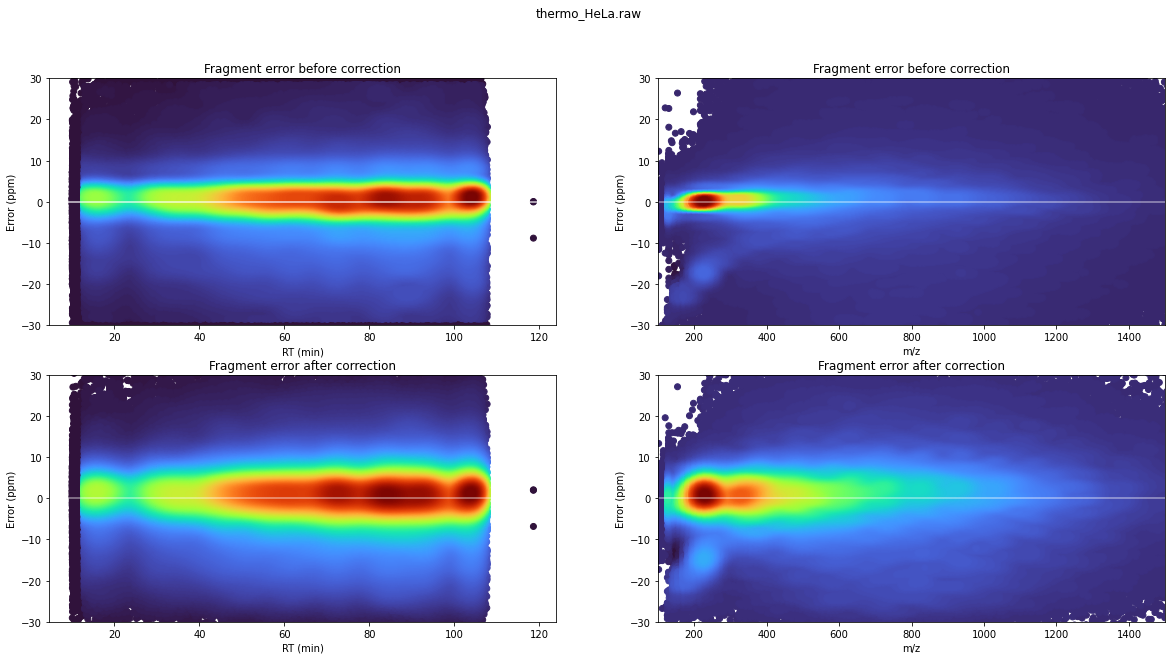

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:26<00:00, 26.32s/it]


In [25]:
%run -i ../test_ci.py $tmp_folder thermo_hela_large_fasta

### Many modifications

2022-03-18 05:07:36> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-18 05:07:37> No settings provided. Creating from default settings.
2022-03-18 05:07:37> Couldn't find compiled exe. Using Python version for testing.
2022-03-18 05:07:37> Logging to C:\Users\admin\alphapept\logs\log_20220318050737.txt.
2022-03-18 05:07:37> Platform information:
2022-03-18 05:07:37> system     - Windows
2022-03-18 05:07:37> release    - 10
2022-03-18 05:07:37> version    - 10.0.19044
2022-03-18 05:07:37> machine    - AMD64
2022-03-18 05:07:37> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-18 05:07:37> cpu count  - 24
2022-03-18 05:07:37> ram memory - 117.5/127.7 Gb (available/total)
2022-03-18 05:07:37> 
2022-03-18 05:07:37> Python information:
2022-03-18 05:07:37> SQLAlchemy                    - 1.4.23
2022-03-18 05:07:37> alphapept                     - 0.4.1
2022-03-18 05:07:37> biopython                     - 1.78
2022-03-18 05:07:37> bumpversion        





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:07:38> Processing 1 files for step raw_conversion
2022-03-18 05:07:38> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2022-03-18 05:09:30> File conversion complete. Extracted 120,226 precursors.
2022-03-18 05:09:32> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-18 05:09:32> ==== feature_finding ====







  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:09:32> Processing 1 files for step find_features
2022-03-18 05:09:32> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2022-03-18 05:09:32> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2022-03-18 05:09:32> Hill extraction with centroid_tol 8 and max_gap 2
2022-03-18 05:09:36> Number of hills 1,105,353, len = 17.35
2022-03-18 05:09:36> Repeating hill extraction with centroid_tol 5.87
2022-03-18 05:09:40> Number of hills 1,227,331, len = 19.44
2022-03-18 05:09:41> After duplicate removal of hills 1,025,845
2022-03-18 05:09:51> After split hill_ptrs 1,207,373
2022-03-18 05:09:52> After filter hill_ptrs 1,188,406


  0%|                                                                                            | 0/1 [02:14<?, ?it/s]


2022-03-18 05:12:02> Extracting hill stats complete


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:03:31<00:00, 3811.39s/it]
  0%|                                                                                            | 0/1 [05:10<?, ?it/s]


2022-03-18 05:12:12> Found 184,383 pre isotope patterns.
2022-03-18 05:12:52> Extracted 198,779 isotope patterns.
2022-03-18 05:12:55> Report complete.
2022-03-18 05:12:55> Matching features to query data.
2022-03-18 05:12:56> Saving feature table.
2022-03-18 05:12:56> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-18 05:12:56> Saving features.
2022-03-18 05:12:57> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-18 05:12:57> ==== search_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:12:57> Starting first search.
2022-03-18 05:12:57> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2022-03-18 05:12:57> Setting Process limit to 30
2022-03-18 05:12:57> AlphaPool was set to 24 processes. Setting max to 24.


  0%|                                                                                            | 0/1 [07:26<?, ?it/s]

2022-03-18 05:16:58> Block 1 of 21 complete - 4.76 % - created peptides 1,430,810 



  5%|██▉                                                          | 0.047619047619047616/1 [04:01<1:20:28, 5069.85s/it]

2022-03-18 05:18:30> Block 2 of 21 complete - 9.52 % - created peptides 2,029,798 


 10%|██████                                                          | 0.09523809523809523/1 [05:36<49:11, 3262.49s/it]

2022-03-18 05:18:33> Block 3 of 21 complete - 14.29 % - created peptides 2,063,688 


 14%|█████████▏                                                      | 0.14285714285714285/1 [05:40<25:53, 1812.68s/it]

2022-03-18 05:18:40> Block 4 of 21 complete - 19.05 % - created peptides 2,108,144 


 19%|████████████▏                                                   | 0.19047619047619047/1 [05:49<15:47, 1169.84s/it]

2022-03-18 05:18:46> Block 5 of 21 complete - 23.81 % - created peptides 2,117,874 


 24%|███████████████▍                                                 | 0.23809523809523808/1 [05:55<10:02, 790.82s/it]

2022-03-18 05:18:52> Block 6 of 21 complete - 28.57 % - created peptides 2,186,052 


 29%|██████████████████▊                                               | 0.2857142857142857/1 [06:01<06:43, 565.50s/it]

2022-03-18 05:18:58> Block 7 of 21 complete - 33.33 % - created peptides 2,270,192 


 33%|██████████████████████                                            | 0.3333333333333333/1 [06:09<04:53, 440.39s/it]

2022-03-18 05:19:07> Block 8 of 21 complete - 38.10 % - created peptides 2,352,456 


 38%|████████████████████████▊                                        | 0.38095238095238093/1 [06:19<03:44, 362.97s/it]

2022-03-18 05:19:16> Block 9 of 21 complete - 42.86 % - created peptides 2,346,492 


 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [06:24<02:41, 282.84s/it]

2022-03-18 05:19:21> Block 10 of 21 complete - 47.62 % - created peptides 2,321,598 


 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [06:31<02:05, 239.46s/it]

2022-03-18 05:19:28> Block 11 of 21 complete - 52.38 % - created peptides 2,317,248 


 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [06:36<01:33, 197.34s/it]

2022-03-18 05:19:33> Block 12 of 21 complete - 57.14 % - created peptides 2,354,928 


 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [06:39<01:08, 160.95s/it]

2022-03-18 05:19:37> Block 13 of 21 complete - 61.90 % - created peptides 2,364,188 


 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [06:44<00:54, 142.26s/it]

2022-03-18 05:19:41> Block 14 of 21 complete - 66.67 % - created peptides 2,366,294 


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [06:49<00:43, 130.81s/it]

2022-03-18 05:19:46> Block 15 of 21 complete - 71.43 % - created peptides 2,390,120 


 71%|███████████████████████████████████████████████▏                  | 0.7142857142857143/1 [06:53<00:33, 116.37s/it]

2022-03-18 05:19:50> Block 16 of 21 complete - 76.19 % - created peptides 2,400,722 


 76%|██████████████████████████████████████████████████▎               | 0.7619047619047619/1 [06:58<00:26, 112.24s/it]

2022-03-18 05:19:55> Block 17 of 21 complete - 80.95 % - created peptides 2,431,708 


 81%|█████████████████████████████████████████████████████▍            | 0.8095238095238095/1 [07:03<00:20, 109.62s/it]

2022-03-18 05:20:00> Block 18 of 21 complete - 85.71 % - created peptides 2,499,774 


 86%|████████████████████████████████████████████████████████▌         | 0.8571428571428571/1 [07:09<00:16, 114.47s/it]

2022-03-18 05:20:06> Block 19 of 21 complete - 90.48 % - created peptides 2,447,522 


 90%|███████████████████████████████████████████████████████████▋      | 0.9047619047619048/1 [07:14<00:10, 113.25s/it]

2022-03-18 05:20:11> Block 20 of 21 complete - 95.24 % - created peptides 2,514,900 


 95%|██████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [07:19<00:05, 112.38s/it]

2022-03-18 05:20:17> Block 21 of 21 complete - 100.00 % - created peptides 2,440,588 


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [07:24<00:00, 110.88s/it]

2022-03-18 05:20:23> Saving as first_search
2022-03-18 05:21:24> Complete. Created peptides 47,755,096
2022-03-18 05:21:26> First search complete.
2022-03-18 05:21:26> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:21:26> Processing 1 files for step calibrate_hdf
2022-03-18 05:21:26> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-18 05:21:27> Scoring using X-Tandem
2022-03-18 05:21:29> 38,418 target (384 decoy) of 121785 PSMs. fdr 0.009995 for a cutoff of 27.43 (set fdr was 0.01)
2022-03-18 05:21:29> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-18 05:21:32> Precursor calibration std 1.00, 0.23
2022-03-18 05:21:32> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2022-03-18 05:21:32> Starting fragment calibration.
2022-03-18 05:21:32> Calibrating fragments with neighbors
2022-03-18 05:21:33> Scoring using X-Tandem
2022-03-18 05:21:35> 38,418 target (384 decoy) of 121785 PSMs. fdr 0.009995 for a cutoff of 27.43 (set fdr was 0.01)
2022-03-18 05:21:36> Minimum hits for fragments before score 7.00.
2022-03-18 05:21:36> Minimum 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:22:42> Starting second search with DB.
2022-03-18 05:22:42> Starting second search.
2022-03-18 05:22:43> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2022-03-18 05:22:43> Setting Process limit to 30
2022-03-18 05:22:43> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-18 05:26:22> Block 1 of 21 complete - 4.76 % - created peptides 1,430,810 




  5%|██▉                                                          | 0.047619047619047616/1 [03:39<1:13:08, 4607.79s/it]

2022-03-18 05:27:41> Block 2 of 21 complete - 9.52 % - created peptides 2,029,798 


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [14:44<00:00, 884.39s/it]
  0%|                                                                                            | 0/1 [06:15<?, ?it/s]


 10%|██████                                                          | 0.09523809523809523/1 [05:00<43:37, 2892.77s/it]

2022-03-18 05:27:47> Block 3 of 21 complete - 14.29 % - created peptides 2,108,144 




 14%|█████████▏                                                      | 0.14285714285714285/1 [05:08<23:34, 1649.96s/it]

2022-03-18 05:27:50> Block 4 of 21 complete - 19.05 % - created peptides 2,063,688 




 19%|████████████▏                                                   | 0.19047619047619047/1 [05:10<13:46, 1021.17s/it]

2022-03-18 05:27:57> Block 5 of 21 complete - 23.81 % - created peptides 2,117,874 




 24%|███████████████▍                                                 | 0.23809523809523808/1 [05:18<09:02, 711.77s/it]

2022-03-18 05:28:03> Block 6 of 21 complete - 28.57 % - created peptides 2,186,052 




 29%|██████████████████▊                                               | 0.2857142857142857/1 [05:24<06:04, 510.37s/it]

2022-03-18 05:28:09> Block 7 of 21 complete - 33.33 % - created peptides 2,270,192 




 33%|██████████████████████                                            | 0.3333333333333333/1 [05:30<04:18, 388.08s/it]

2022-03-18 05:28:13> Block 8 of 21 complete - 38.10 % - created peptides 2,317,248 




 38%|████████████████████████▊                                        | 0.38095238095238093/1 [05:37<03:11, 309.96s/it]

2022-03-18 05:28:20> Block 9 of 21 complete - 42.86 % - created peptides 2,321,598 




 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [05:42<02:21, 247.76s/it]

2022-03-18 05:28:25> Block 10 of 21 complete - 47.62 % - created peptides 2,364,188 




 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [05:45<01:39, 189.57s/it]

2022-03-18 05:28:28> Block 11 of 21 complete - 52.38 % - created peptides 2,352,456 




 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [05:50<01:18, 164.76s/it]

2022-03-18 05:28:33> Block 12 of 21 complete - 57.14 % - created peptides 2,346,492 




 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [05:53<00:56, 131.92s/it]

2022-03-18 05:28:36> Block 13 of 21 complete - 61.90 % - created peptides 2,354,928 




 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [05:57<00:43, 114.46s/it]

2022-03-18 05:28:39> Block 14 of 21 complete - 66.67 % - created peptides 2,366,294 




 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [06:00<00:34, 103.46s/it]

2022-03-18 05:28:43> Block 15 of 21 complete - 71.43 % - created peptides 2,390,120 




 71%|███████████████████████████████████████████████▊                   | 0.7142857142857143/1 [06:04<00:27, 96.22s/it]

2022-03-18 05:28:47> Block 16 of 21 complete - 76.19 % - created peptides 2,447,522 




 76%|███████████████████████████████████████████████████                | 0.7619047619047619/1 [06:08<00:21, 91.69s/it]

2022-03-18 05:28:51> Block 17 of 21 complete - 80.95 % - created peptides 2,431,708 




 81%|██████████████████████████████████████████████████████▏            | 0.8095238095238095/1 [06:12<00:16, 88.65s/it]

2022-03-18 05:28:55> Block 18 of 21 complete - 85.71 % - created peptides 2,400,722 




 86%|█████████████████████████████████████████████████████████▍         | 0.8571428571428571/1 [06:17<00:13, 91.63s/it]

2022-03-18 05:28:59> Block 19 of 21 complete - 90.48 % - created peptides 2,440,588 




 90%|████████████████████████████████████████████████████████████▌      | 0.9047619047619048/1 [06:21<00:08, 90.48s/it]

2022-03-18 05:29:03> Block 20 of 21 complete - 95.24 % - created peptides 2,499,774 




 95%|███████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [06:25<00:04, 89.67s/it]

2022-03-18 05:29:08> Block 21 of 21 complete - 100.00 % - created peptides 2,514,900 




100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:29<00:00, 89.33s/it]

2022-03-18 05:29:13> Saving as second_search
2022-03-18 05:30:07> Complete. Created peptides 47,755,096
2022-03-18 05:30:08> Second search complete.
2022-03-18 05:30:08> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:30:08> Processing 1 files for step score_hdf
2022-03-18 05:30:08> Calling score_hdf
2022-03-18 05:30:09> Found second search psms for scoring.
2022-03-18 05:30:20> 56,724 target (5,672 decoy) of 114857 PSMs. fdr 0.099993 for a cutoff of 23.46 (set fdr was 0.1)
2022-03-18 05:30:21> Training & cross-validation on 25565 targets and 25564 decoys
2022-03-18 05:31:14> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2022-03-18 05:31:14> The train accuracy was 0.7647519020516732
2022-03-18 05:31:14> Testing on 102259 targets and 102260 decoys
2022-03-18 05:31:16> The test accuracy was 0.7184075807137723
2022-03-18 05:31:16> Top features {'hits_y': 0.14392387455624378, 'hits': 0.13483629193568036, 'x_tandem': 0.13464977410113332, 'fragments_matched_n_ratio': 0.09852168975776934, 'temp_idx': 0.09128743691119579, 'fragments_matched_int_ratio': 0.0559720624687748, 'mass_db': 0.030572640954402167, 'mass': 0.03049238954535


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:31:50> Fasta dict with length 20,611, Pept dict with length 44,401
2022-03-18 05:31:50> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-18 05:31:50> A total of 41,360 unique and 2,538 shared peptides.
2022-03-18 05:31:51> A total of 703 ambigious proteins
2022-03-18 05:31:52> A total of 486 unique and 17 shared peptides.
2022-03-18 05:31:52> A total of 17 ambigious proteins
2022-03-18 05:31:52> Global FDR on protein_group
2022-03-18 05:31:52> 5,834 target (58 decoy) of 6853 PSMs. fdr 0.009942 for a cutoff of 0.94 (set fdr was 0.01)
2022-03-18 05:31:52> Global FDR cutoff at 0.9363200839211099.
2022-03-18 05:31:52> FDR on proteins complete. For 0.01 FDR found 49,755 targets and 62 decoys. A total of 5,892 proteins found.
2022-03-18 05:31:52> Saving complete.
2022-03-18 05:31:53> Protein groups complete.
2022-03-18 05:31:53> ==== quantification ====
2022-03-18 05:31:53> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-18 05:31:53> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-18 05:31:53> Complete.
2022-03-18 05:31:53> Starting profile extraction.






  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.88it/s]

2022-03-18 05:31:53> LFQ complete.
2022-03-18 05:31:53> Extracting protein_summary
2022-03-18 05:31:53> Saved protein_summary of length 5,892 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-18 05:31:53> Updating protein_fdr.
2022-03-18 05:31:53> Exporting as csv.
2022-03-18 05:31:55> Saved df of length 49,817 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-18 05:31:55> ==== export ====
2022-03-18 05:32:00> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-18 05:32:00> Analysis complete.


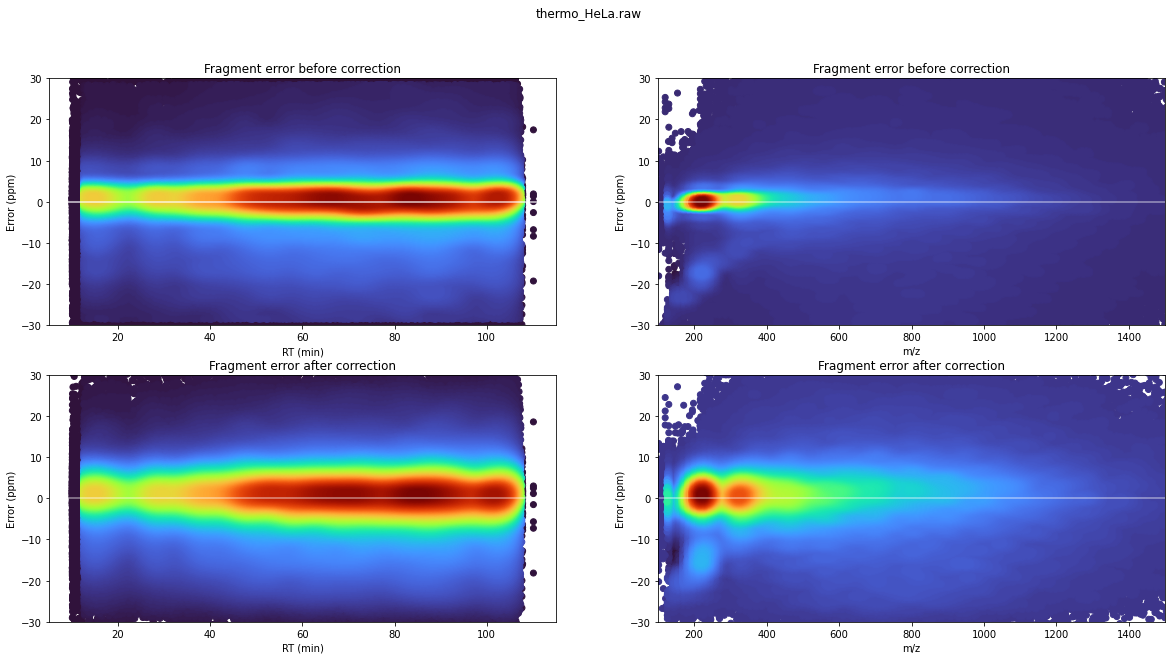

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:28<00:00, 28.41s/it]


In [26]:
%run -i ../test_ci.py $tmp_folder thermo_hela_modifications